In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt
import numpy
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import RFE,VarianceThreshold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error
from decimal import Decimal
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
housing_raw_df=pandas.read_csv('/Users/karanprinja/Downloads/train.csv')

In [3]:
housing_raw_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
housing_raw_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
housing_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Dropping Id column as it only serial numbers

In [6]:
housing_raw_df.drop(columns='Id',axis=1,inplace=True)

### Checking the null value count in columns

In [7]:
null_precent_cols=(housing_raw_df.isna().sum()/len(housing_raw_df.index))*100
null_columns=list(null_precent_cols[null_precent_cols>5].index)
null_columns


['LotFrontage',
 'Alley',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Dropping the columns which have more than 5% Null values

In [8]:
for col in null_columns:
    housing_raw_df.drop(columns=col,axis=1,inplace=True)

In [9]:
housing_raw_df.dtypes.value_counts()

int64      34
object     34
float64     1
dtype: int64

### Collecting the numerical and categorical columns and filling their NA values. Filling NA values for Numerical columns with median and for Categorical columns we make use of Mode

In [10]:
numerical_columns=housing_raw_df.select_dtypes(include=['int64','float64'])

In [11]:
numerical_columns.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0       196.0         706           0        150  ...           0   
1         0.0         978           0        284  ...         298   
2       162.0         486           0        434  ...           0   
3         0.0         216           0        540  ...           0   
4       350.0         655           0        490  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 35 columns]

In [12]:
for columns in numerical_columns.columns:
    median_val=housing_raw_df[columns].median()
    print("Filling for column {} with median value {}".format(columns,median_val))
    housing_raw_df[columns]=housing_raw_df[columns].fillna(value=median_val)

Filling for column MSSubClass with median value 50.0
Filling for column LotArea with median value 9478.5
Filling for column OverallQual with median value 6.0
Filling for column OverallCond with median value 5.0
Filling for column YearBuilt with median value 1973.0
Filling for column YearRemodAdd with median value 1994.0
Filling for column MasVnrArea with median value 0.0
Filling for column BsmtFinSF1 with median value 383.5
Filling for column BsmtFinSF2 with median value 0.0
Filling for column BsmtUnfSF with median value 477.5
Filling for column TotalBsmtSF with median value 991.5
Filling for column 1stFlrSF with median value 1087.0
Filling for column 2ndFlrSF with median value 0.0
Filling for column LowQualFinSF with median value 0.0
Filling for column GrLivArea with median value 1464.0
Filling for column BsmtFullBath with median value 0.0
Filling for column BsmtHalfBath with median value 0.0
Filling for column FullBath with median value 2.0
Filling for column HalfBath with median val

In [13]:
categorical_columns=housing_raw_df.select_dtypes(include=['object'])

In [14]:
categorical_columns.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... BsmtFinType2 Heating HeatingQC  \
0      CollgCr       Norm       Norm  ...          Unf    GasA        Ex   
1      Veenker      Feedr       Norm  ...          Unf    GasA        Ex   
2      CollgCr       Norm       Norm  ...          Unf    GasA        Ex   
3      Crawfor       Norm       Norm  ...          Unf    GasA        Gd   
4      NoRidge       Norm       Norm  ...          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional PavedDrive SaleType  \
0          Y      SBrkr          Gd        Typ          Y       WD   
1          Y      SBrkr          TA        Typ          Y       WD   
2          Y      SBrkr          Gd        Typ          Y       WD   
3          Y      SBrkr          Gd        Typ          Y       WD   
4          Y      SBrkr          Gd        Typ          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 34 columns]

#### Filling Columns with None where NA values makes sense

In [15]:
null_with_meaning = [ "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in null_with_meaning:
    housing_raw_df[col].fillna("none", inplace=True)

In [16]:
remaining_col_without_meaning=set(categorical_columns.columns)-set(null_with_meaning)

In [17]:
for i in remaining_col_without_meaning:
    m_value=housing_raw_df[i].mode()
    print("Taking mode value {} for column {}".format(m_value[0],i))
    housing_raw_df[i]=housing_raw_df[i].fillna(value=m_value[0])

Taking mode value NAmes for column Neighborhood
Taking mode value Inside for column LotConfig
Taking mode value Norm for column Condition1
Taking mode value Y for column CentralAir
Taking mode value TA for column ExterCond
Taking mode value Gtl for column LandSlope
Taking mode value WD for column SaleType
Taking mode value PConc for column Foundation
Taking mode value VinylSd for column Exterior2nd
Taking mode value Pave for column Street
Taking mode value Normal for column SaleCondition
Taking mode value 1Story for column HouseStyle
Taking mode value TA for column KitchenQual
Taking mode value VinylSd for column Exterior1st
Taking mode value Reg for column LotShape
Taking mode value TA for column ExterQual
Taking mode value Typ for column Functional
Taking mode value Lvl for column LandContour
Taking mode value Gable for column RoofStyle
Taking mode value GasA for column Heating
Taking mode value Ex for column HeatingQC
Taking mode value Y for column PavedDrive
Taking mode value CompS

### Checking to see if any column has Null Value

In [18]:

housing_raw_df.columns[housing_raw_df.isnull().any()] 

null_2 = housing_raw_df.isnull().sum()/len(housing_raw_df)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

Series([], dtype: float64)

# Exploratory Data Analysis

#### Categorical Graphs

In [19]:
def categorial_columns_graph(columns):
    plt.figure(figsize=(20, 8))
    seaborn.barplot(x=columns, y="SalePrice", data= housing_raw_df)
    plt.title("Sales Price with respect to {}".format(columns))
    plt.xticks(rotation=90)

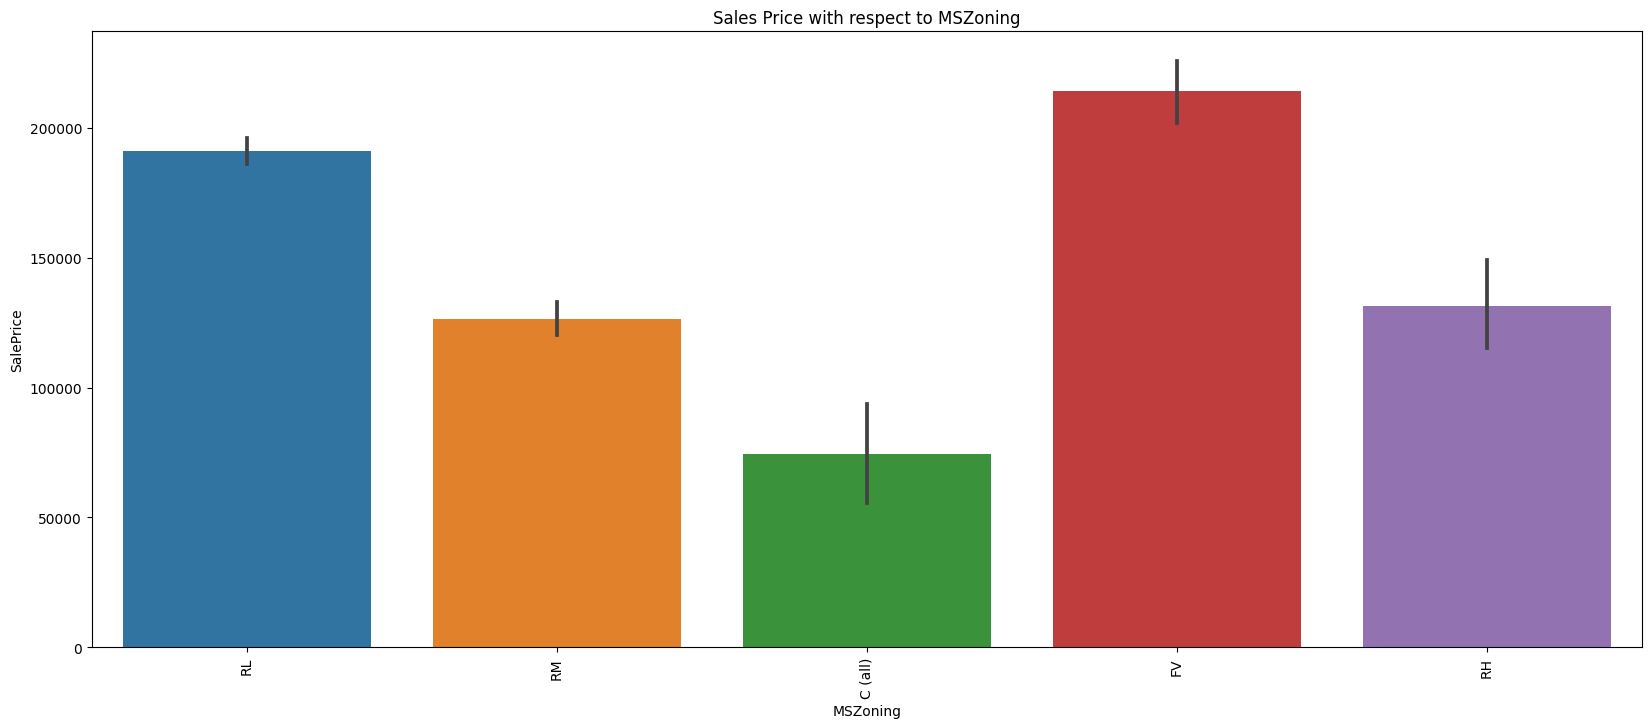

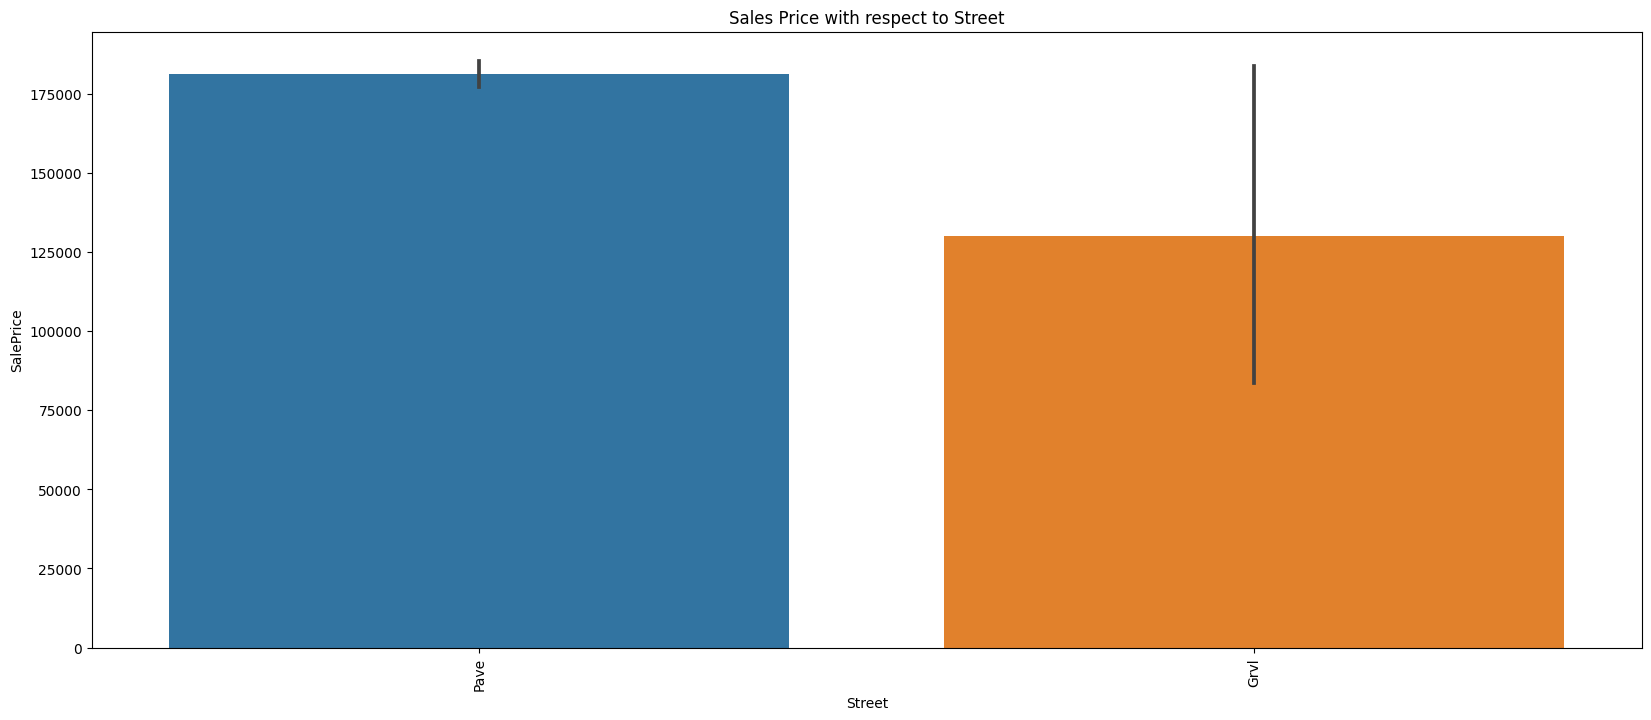

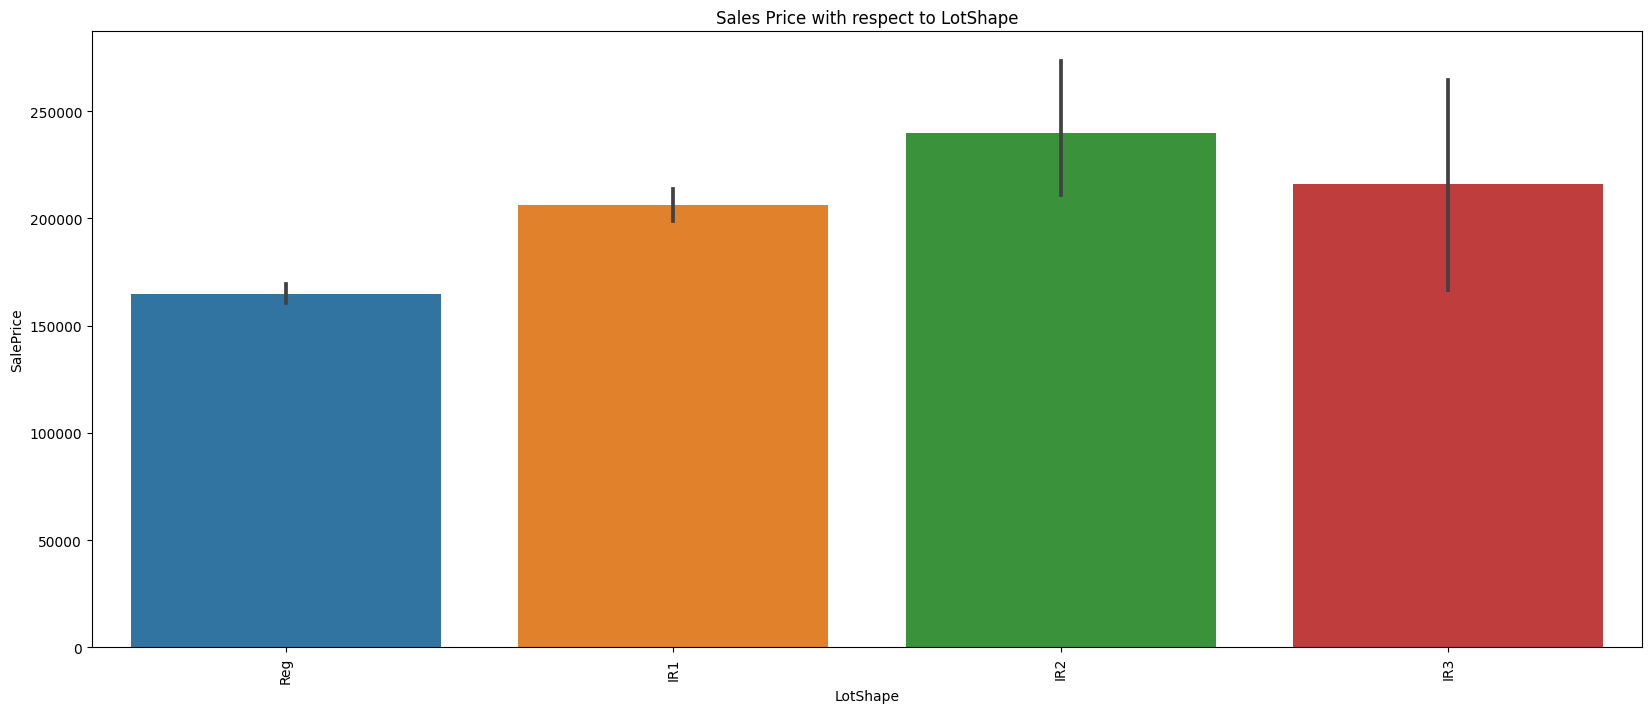

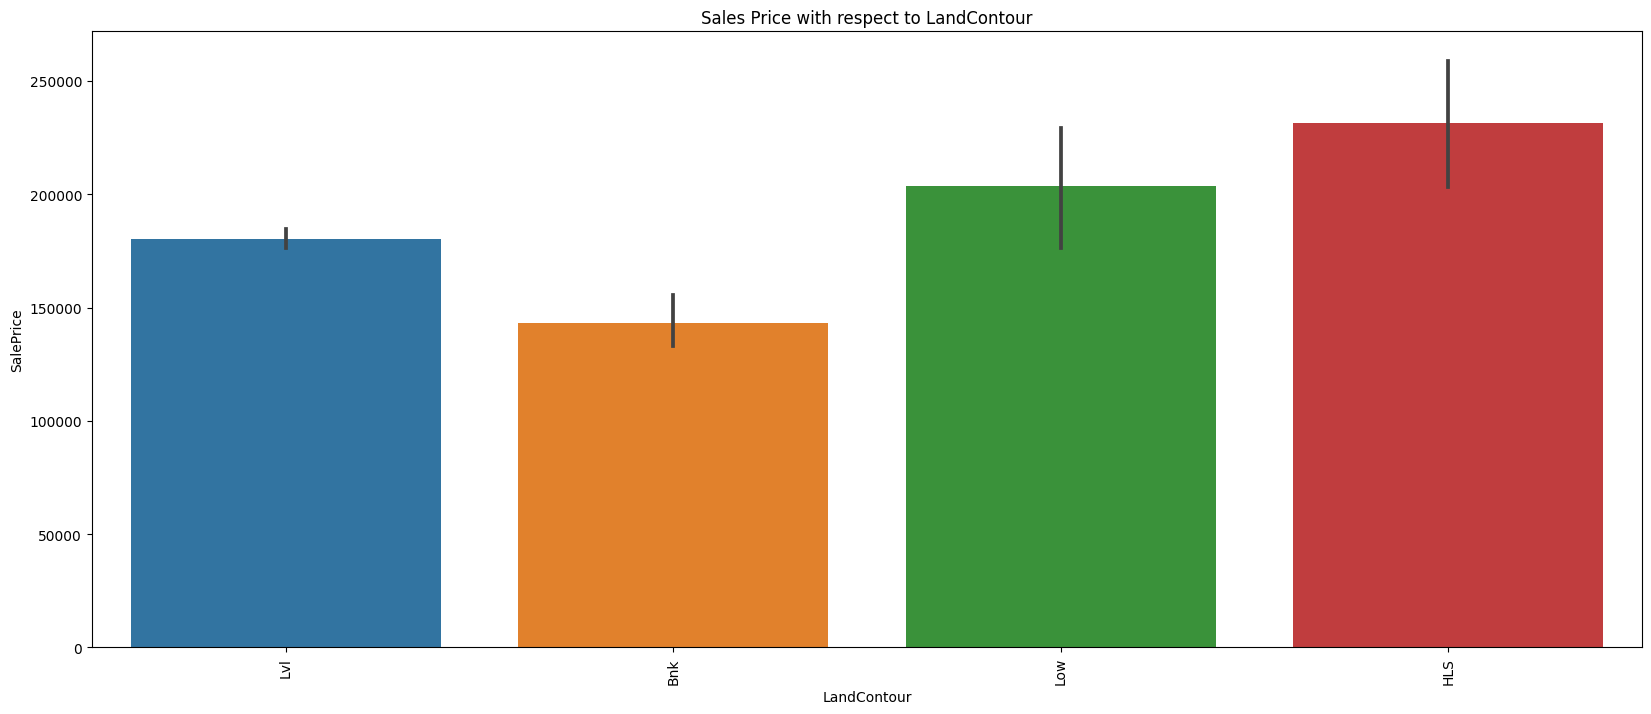

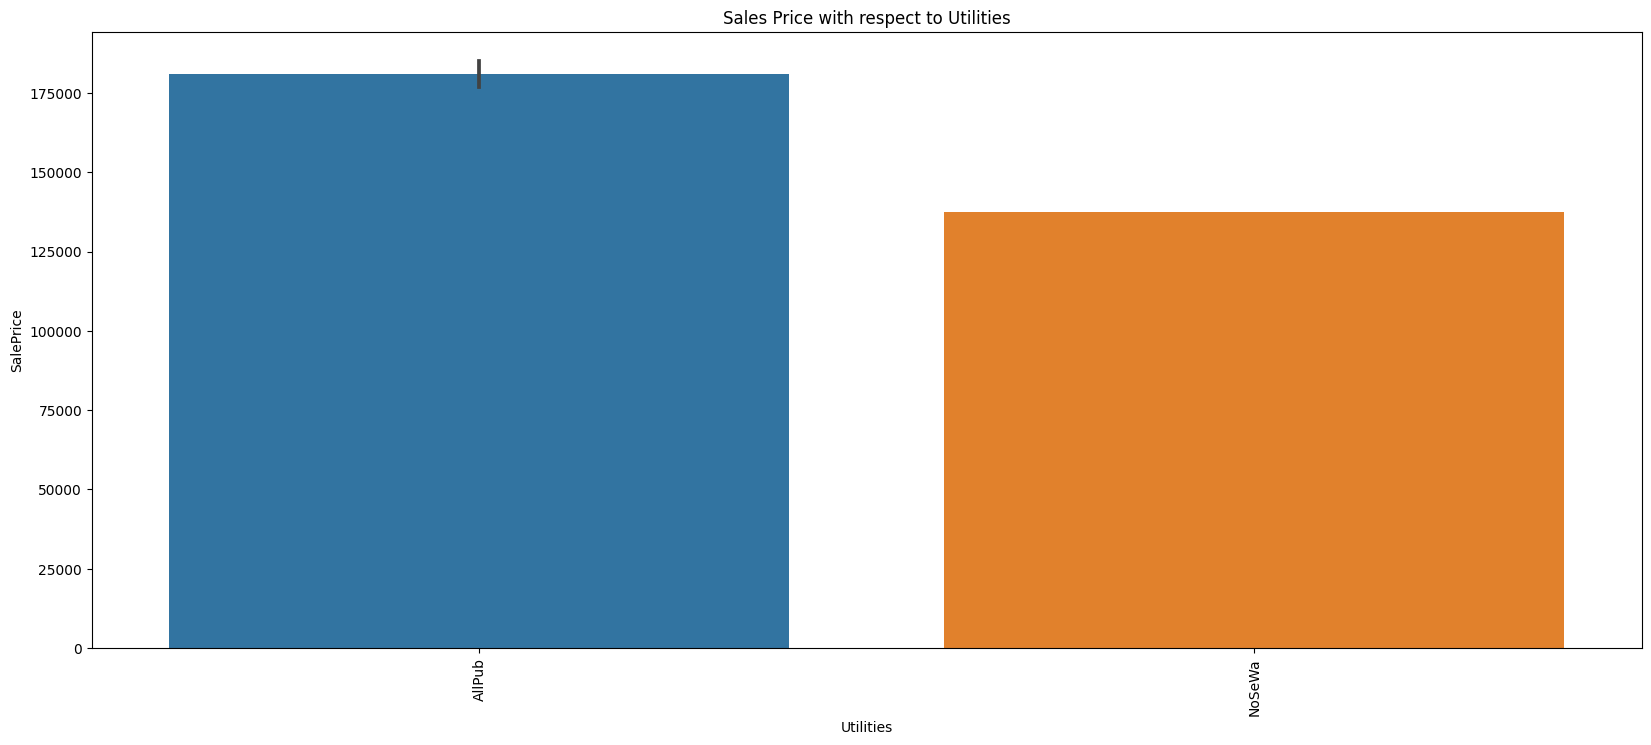

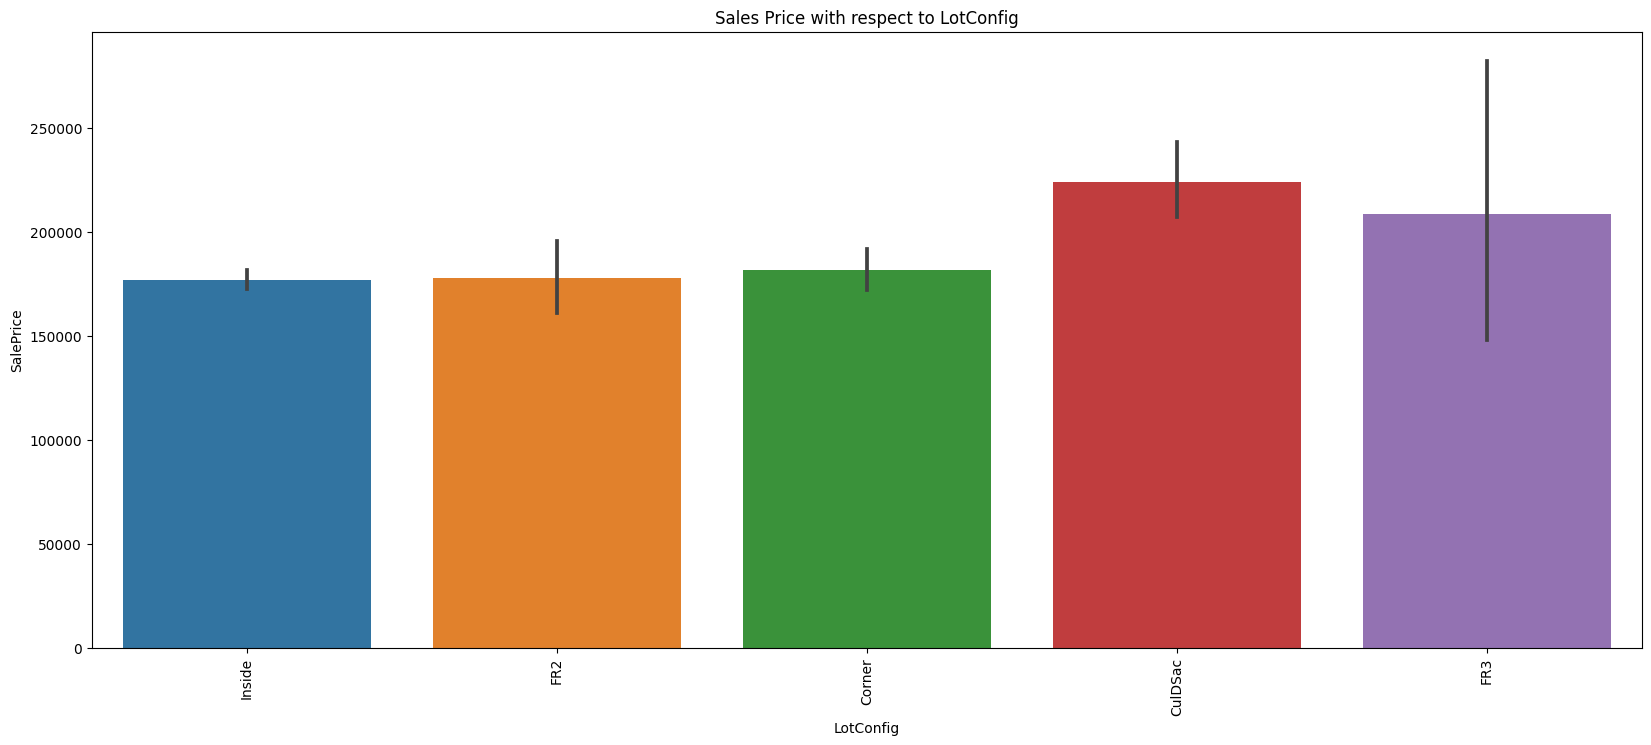

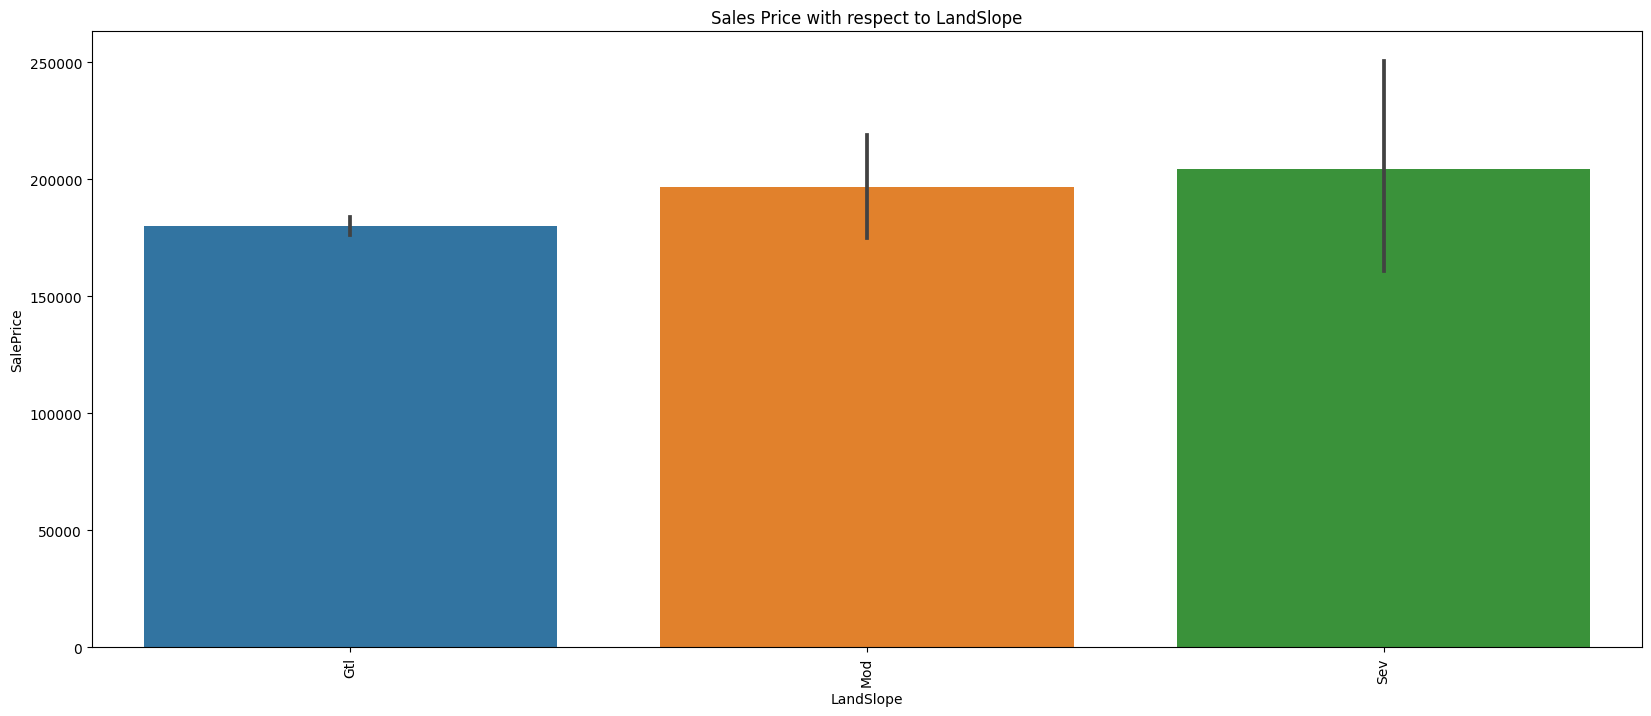

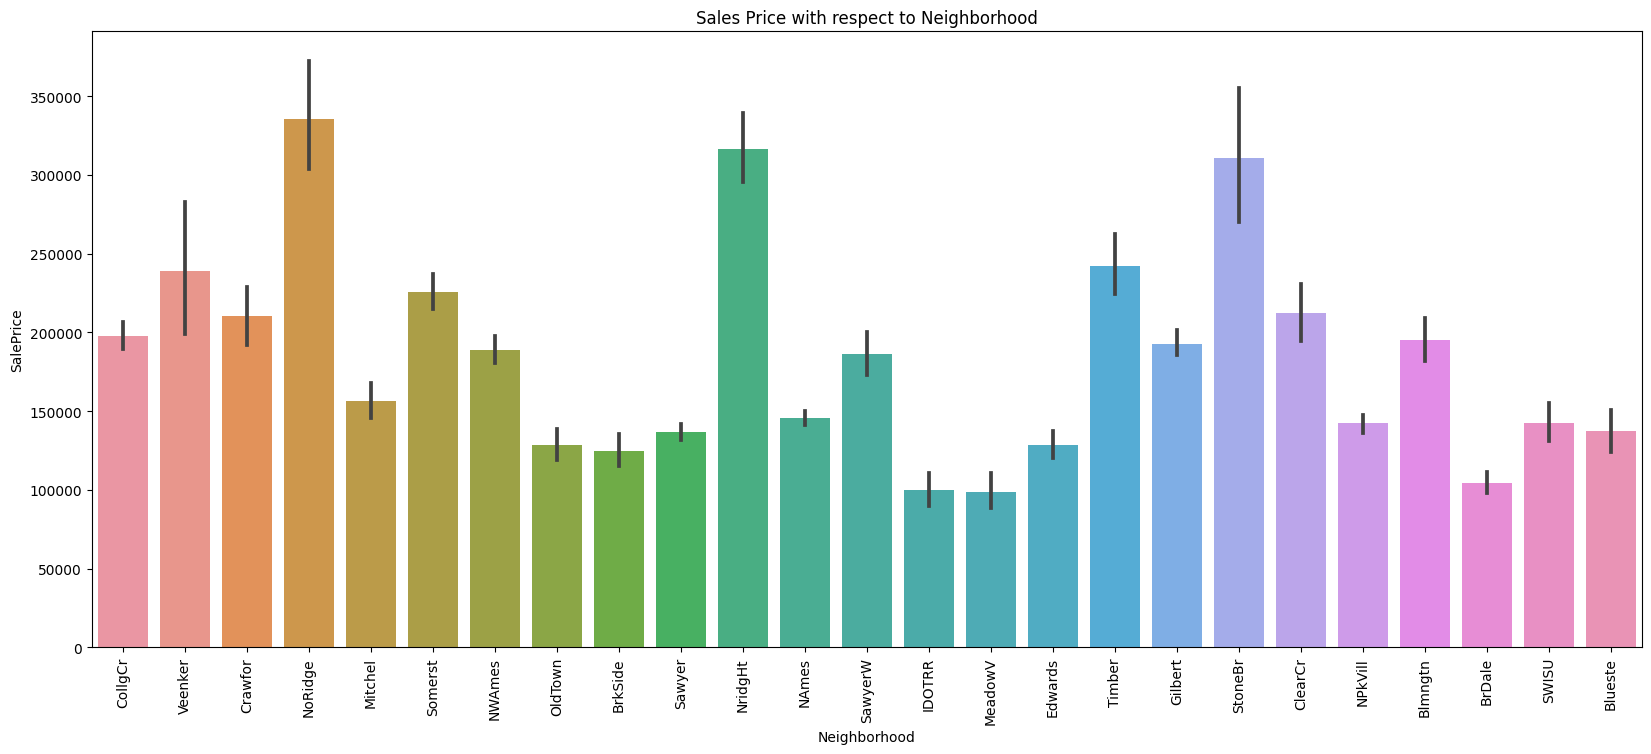

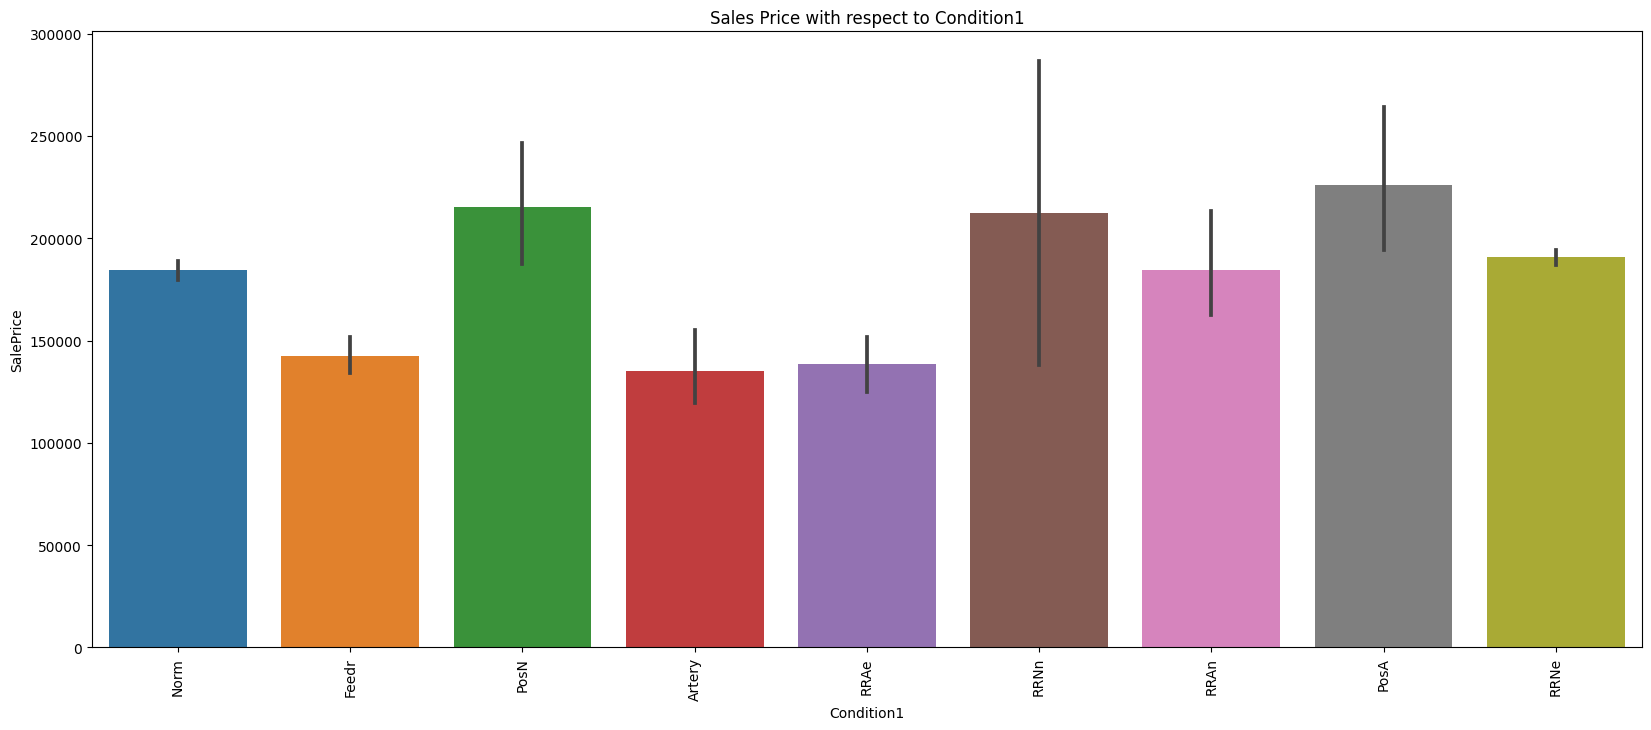

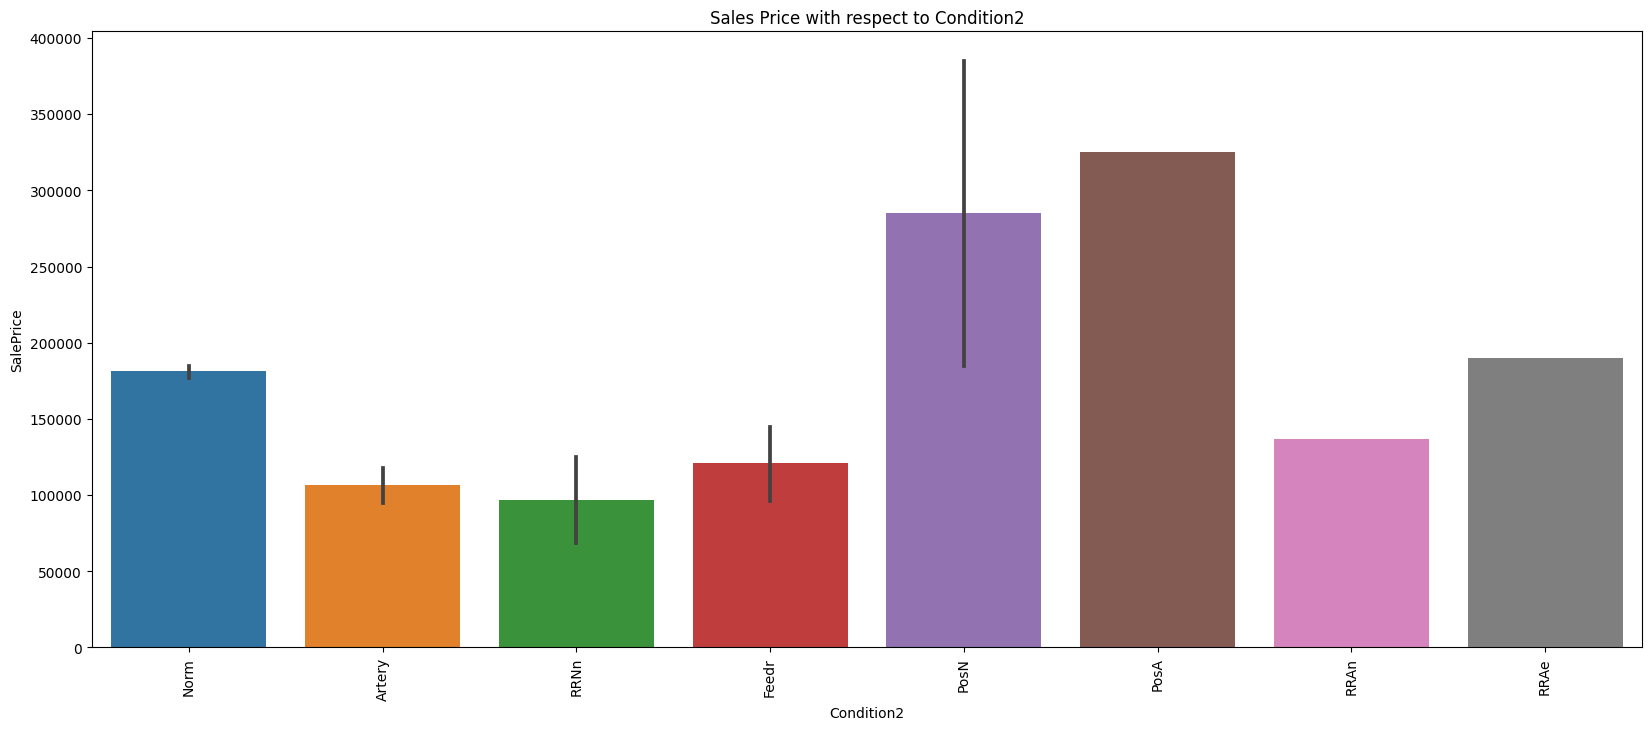

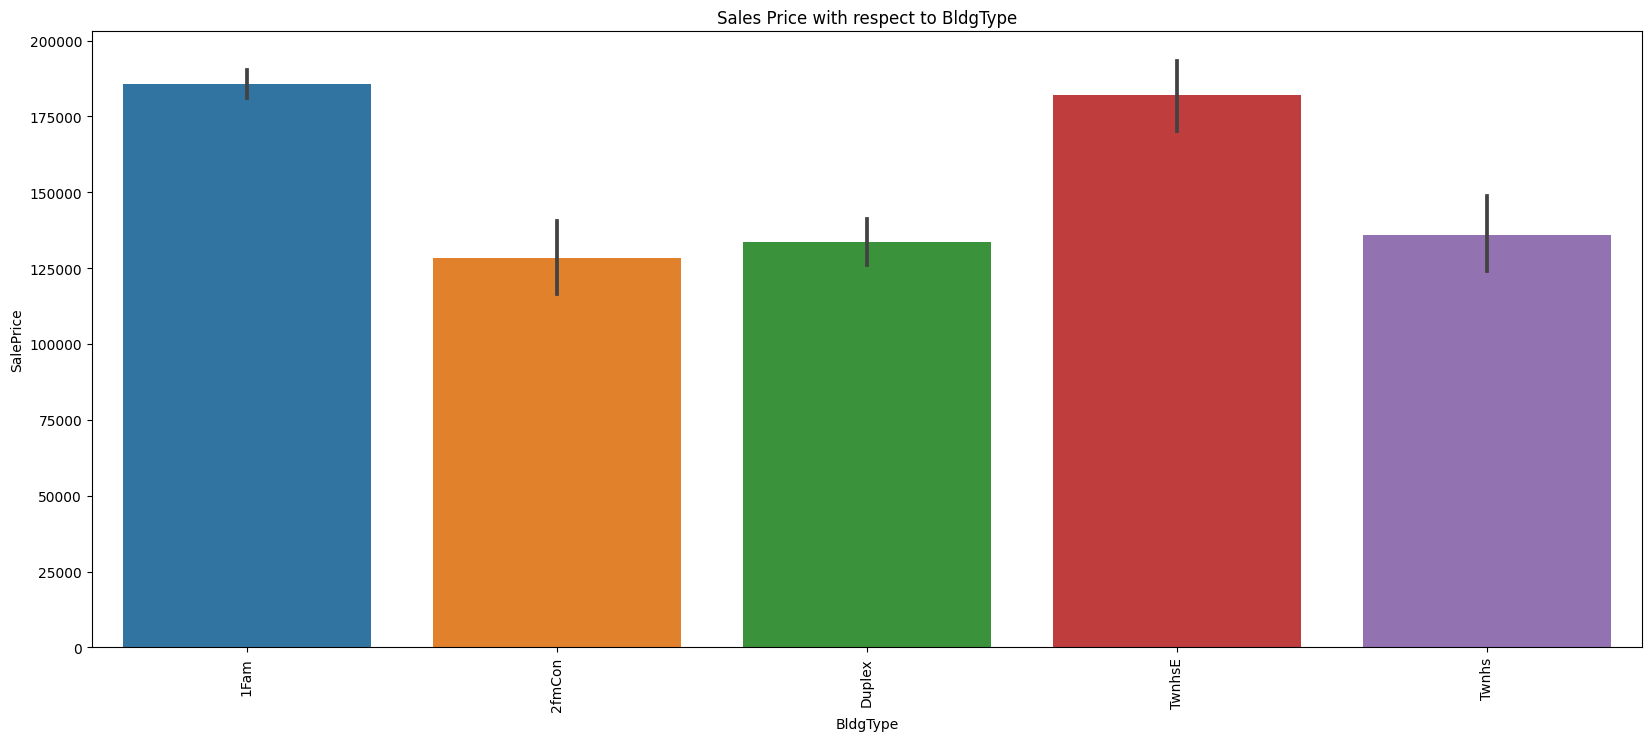

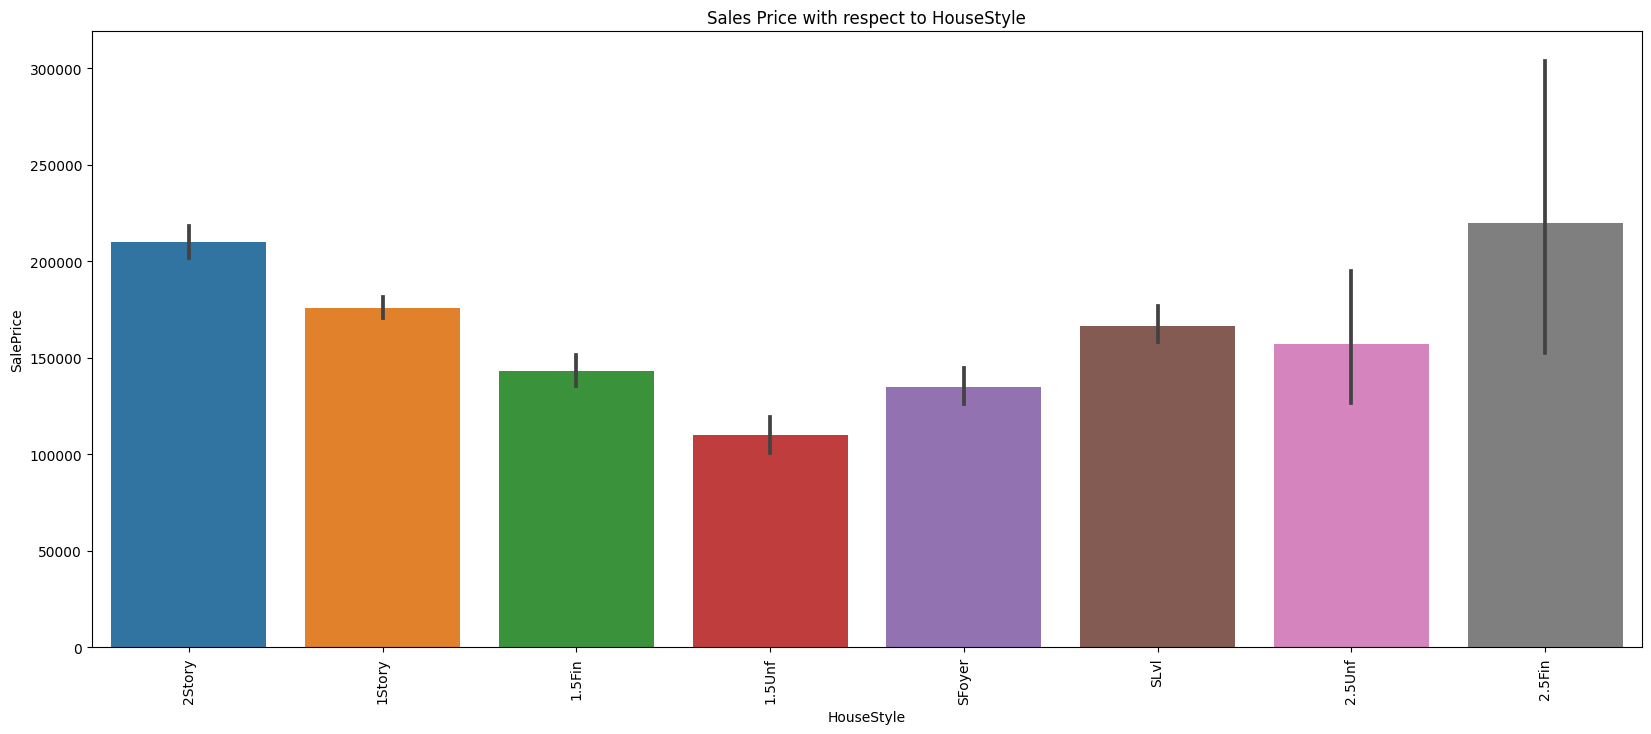

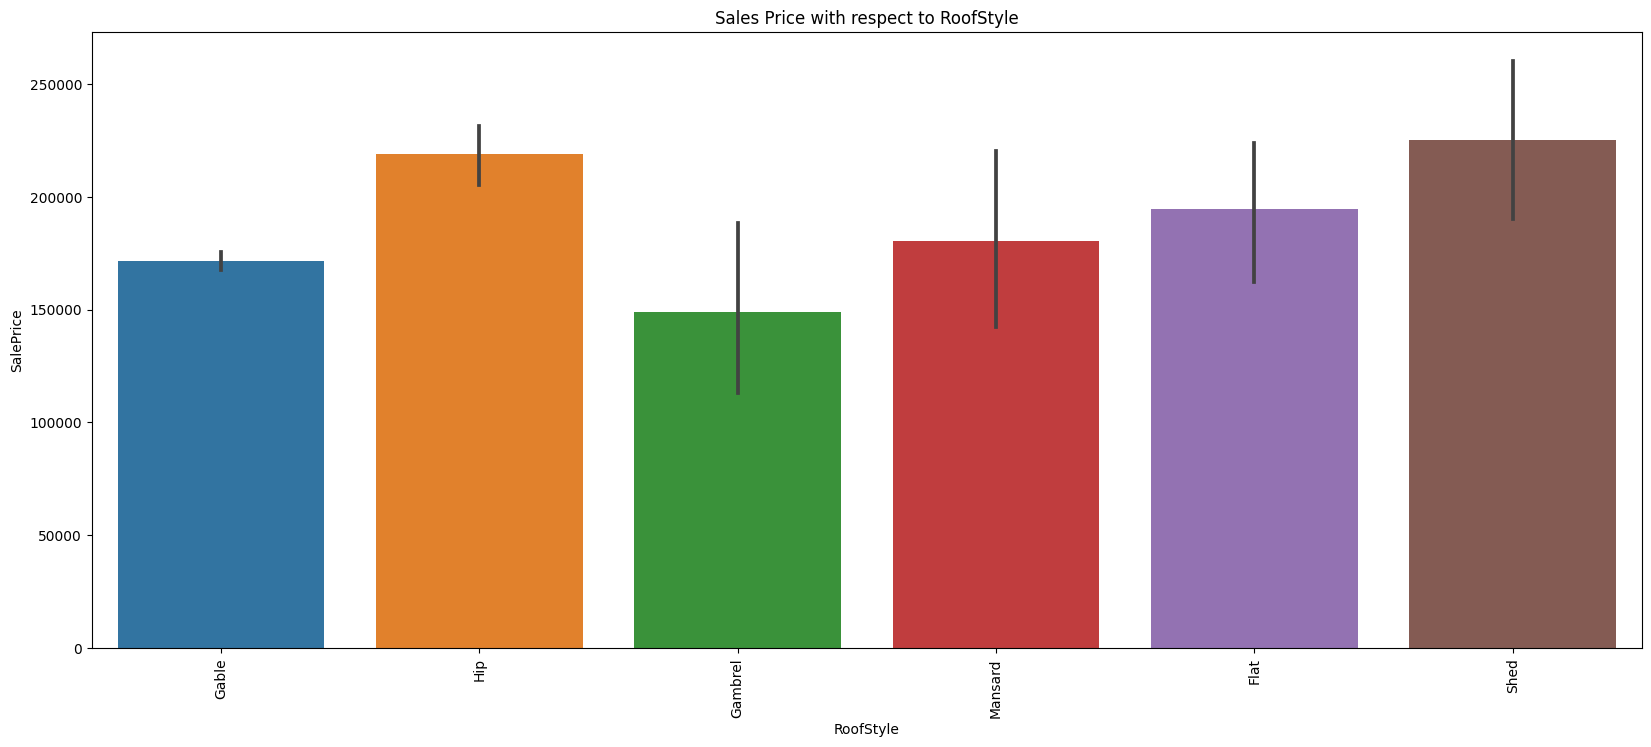

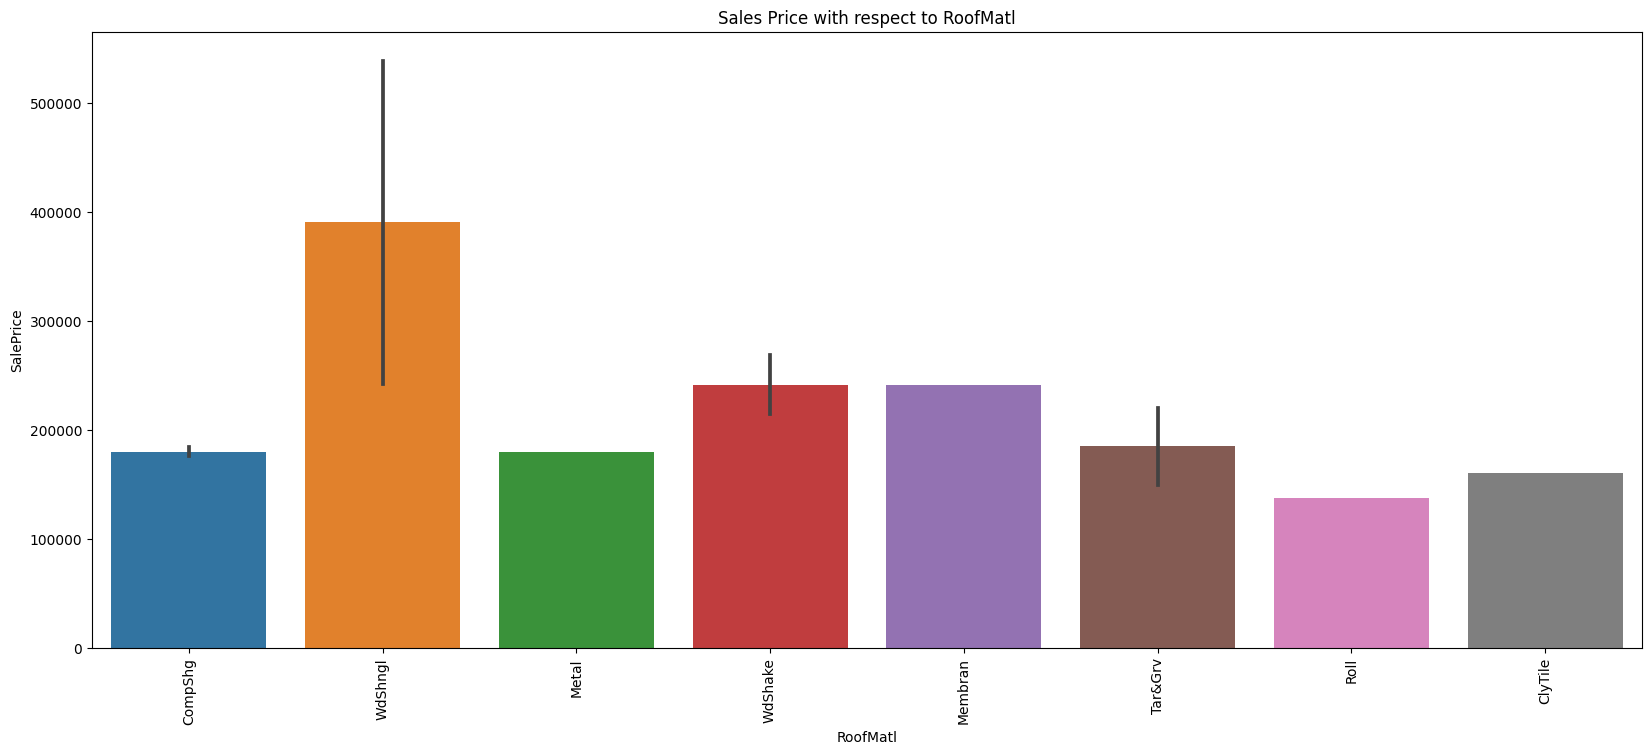

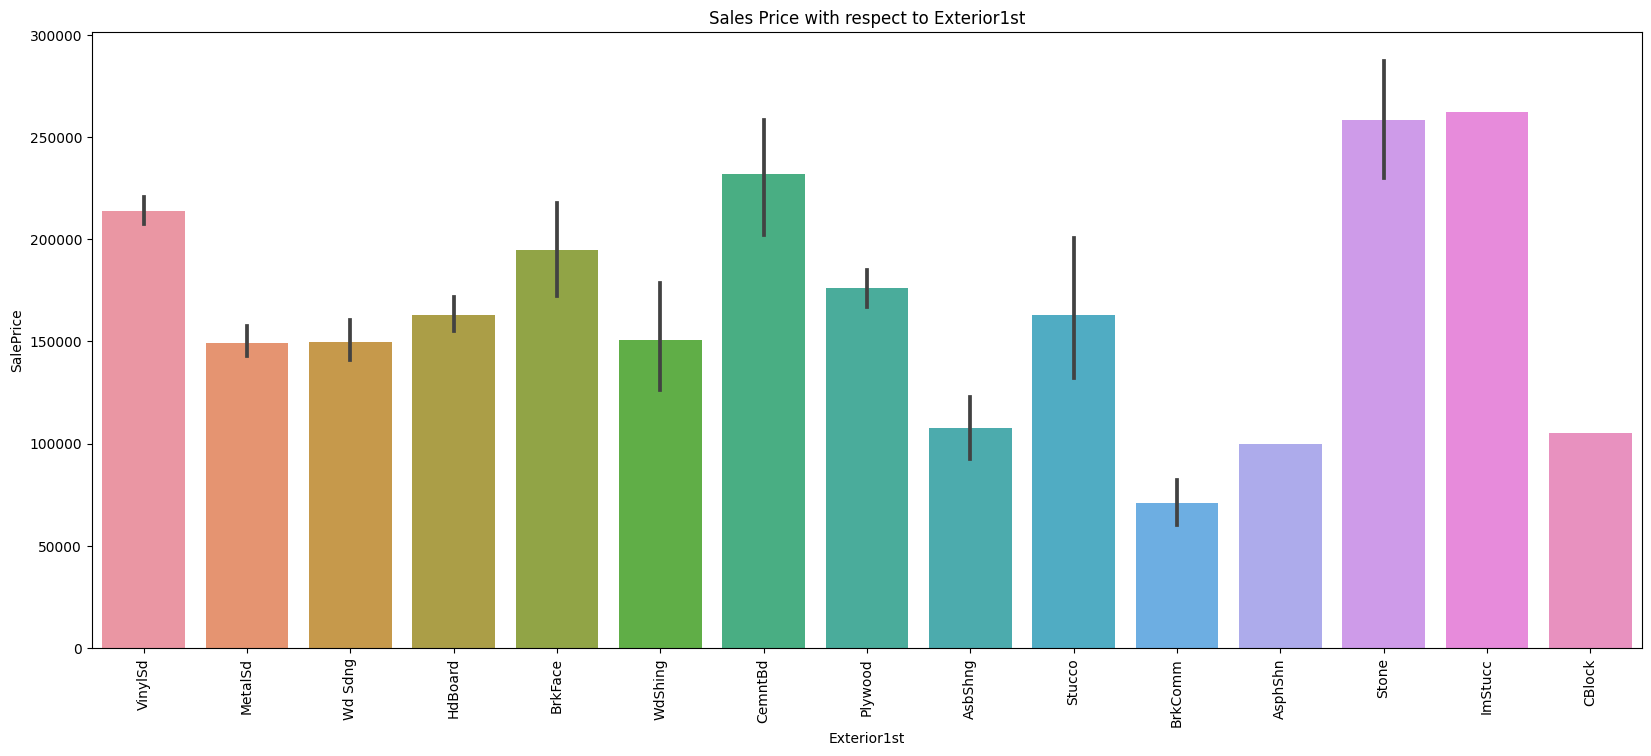

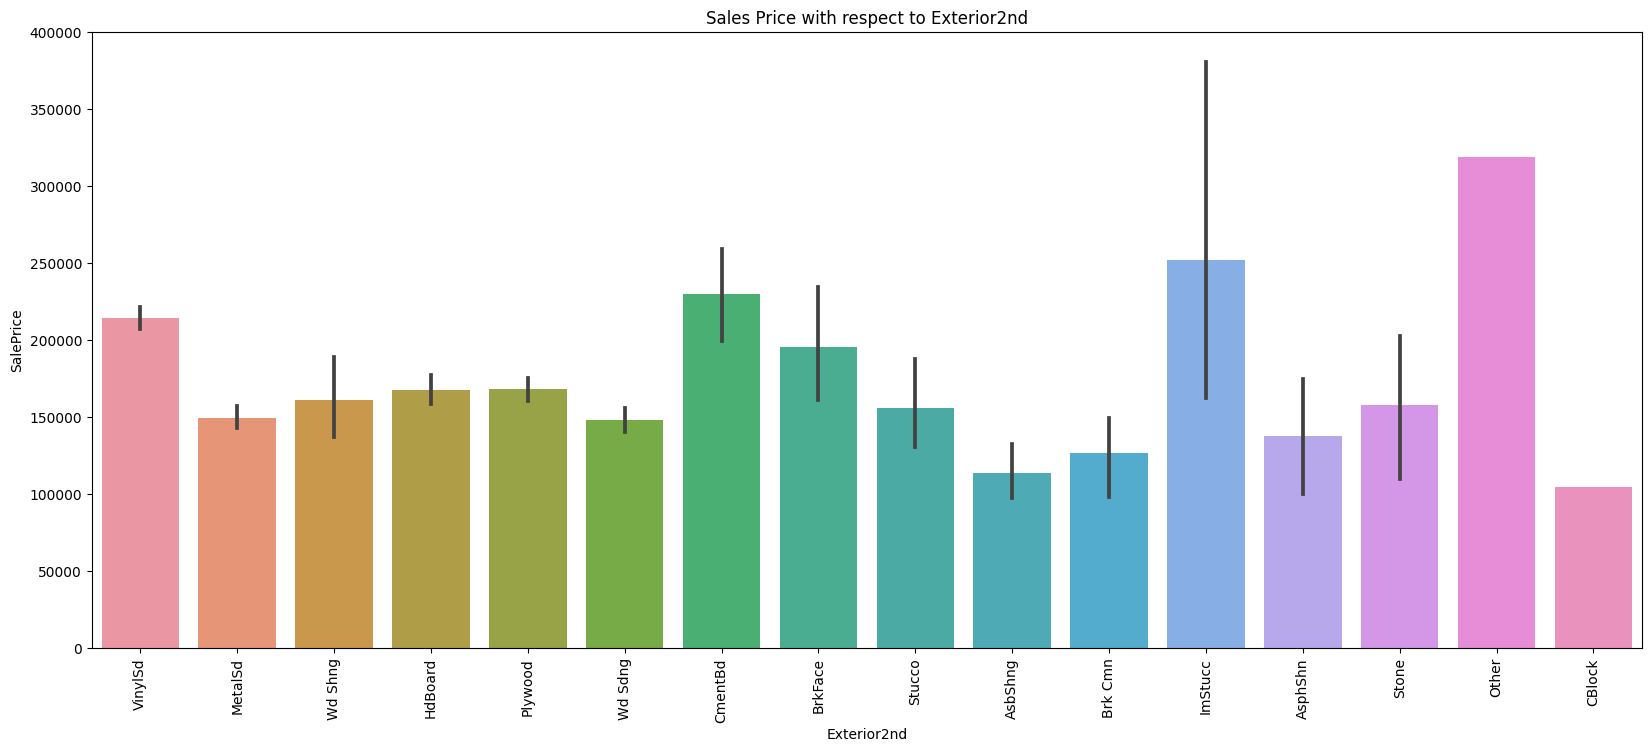

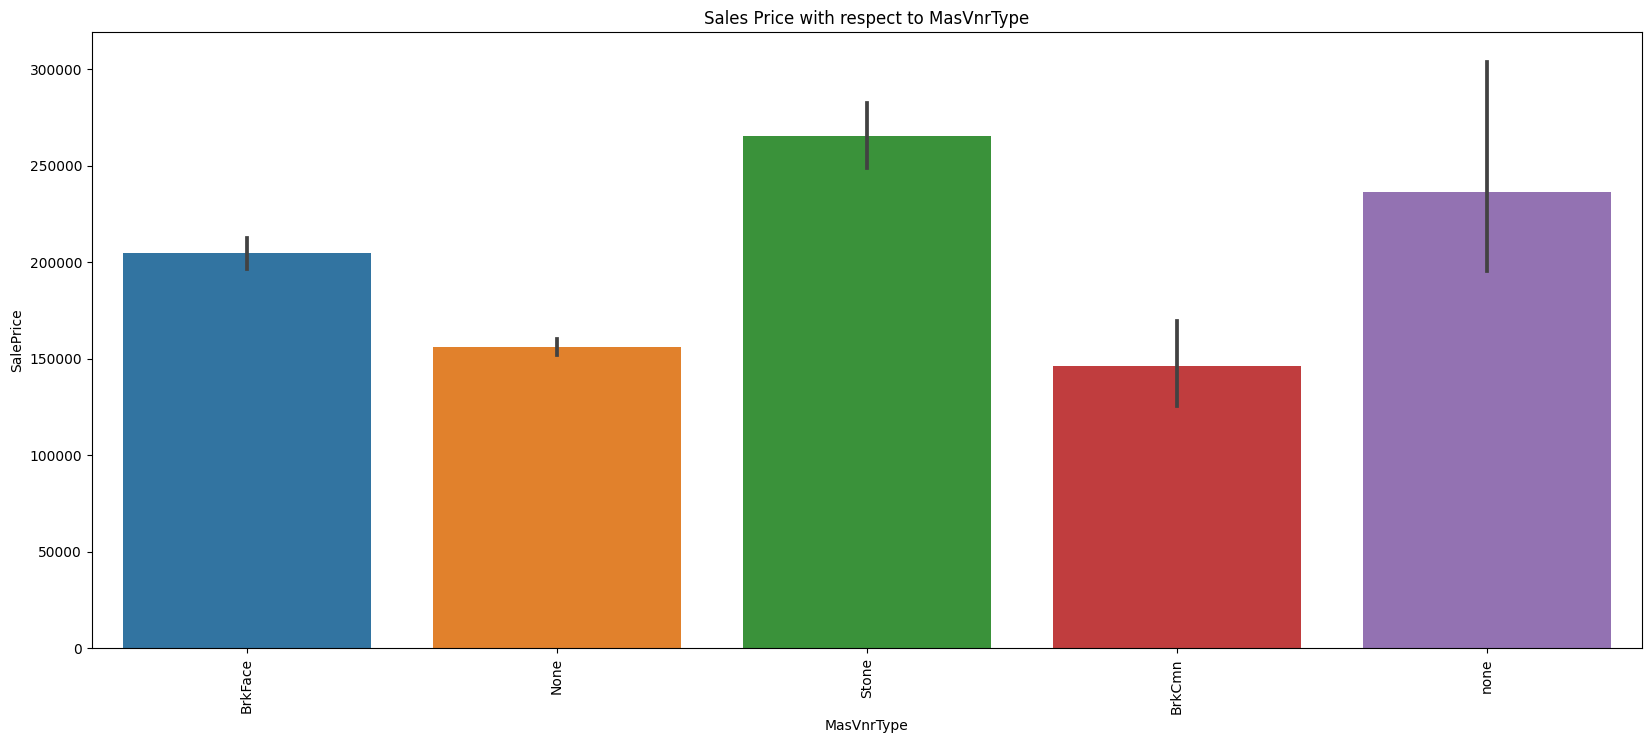

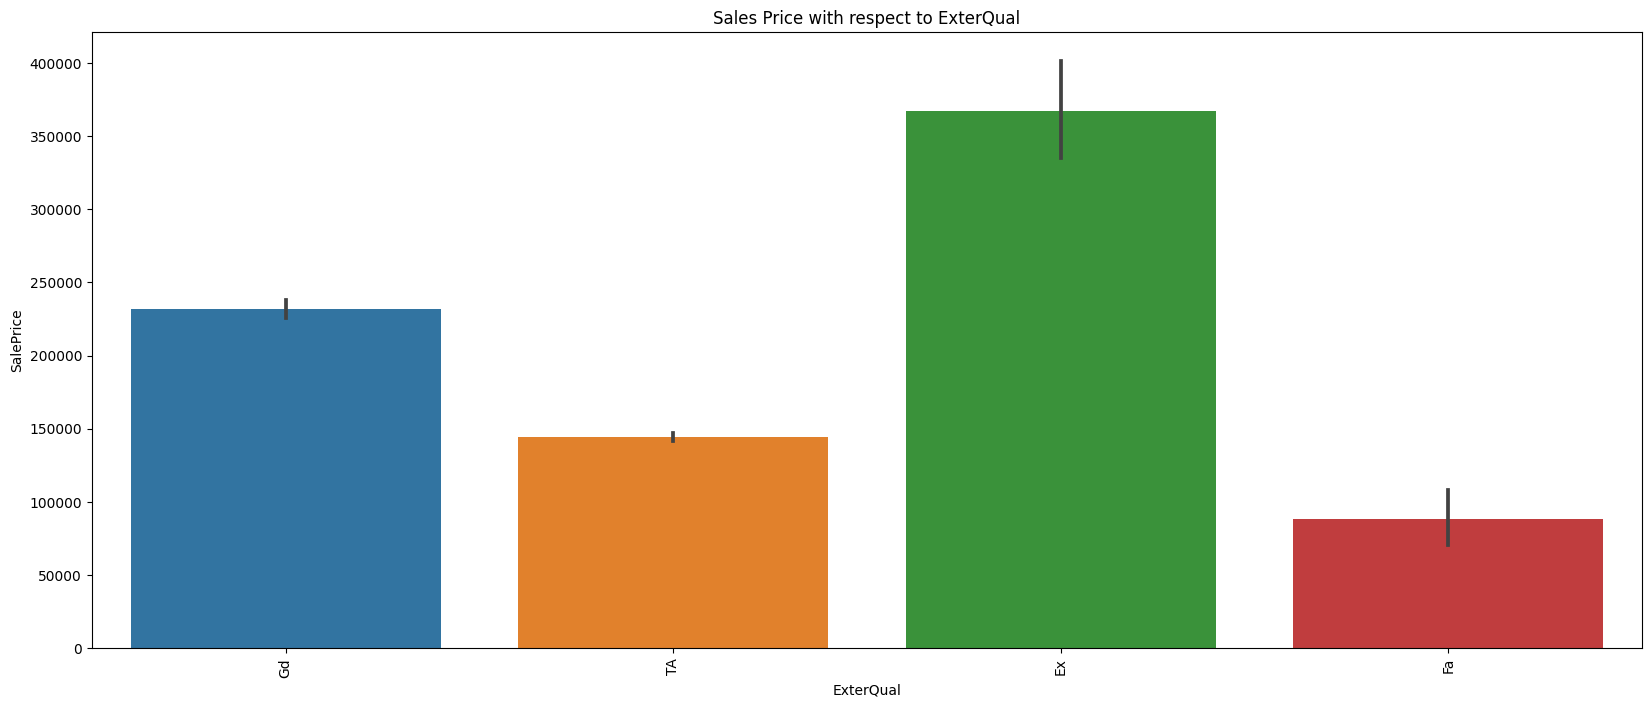

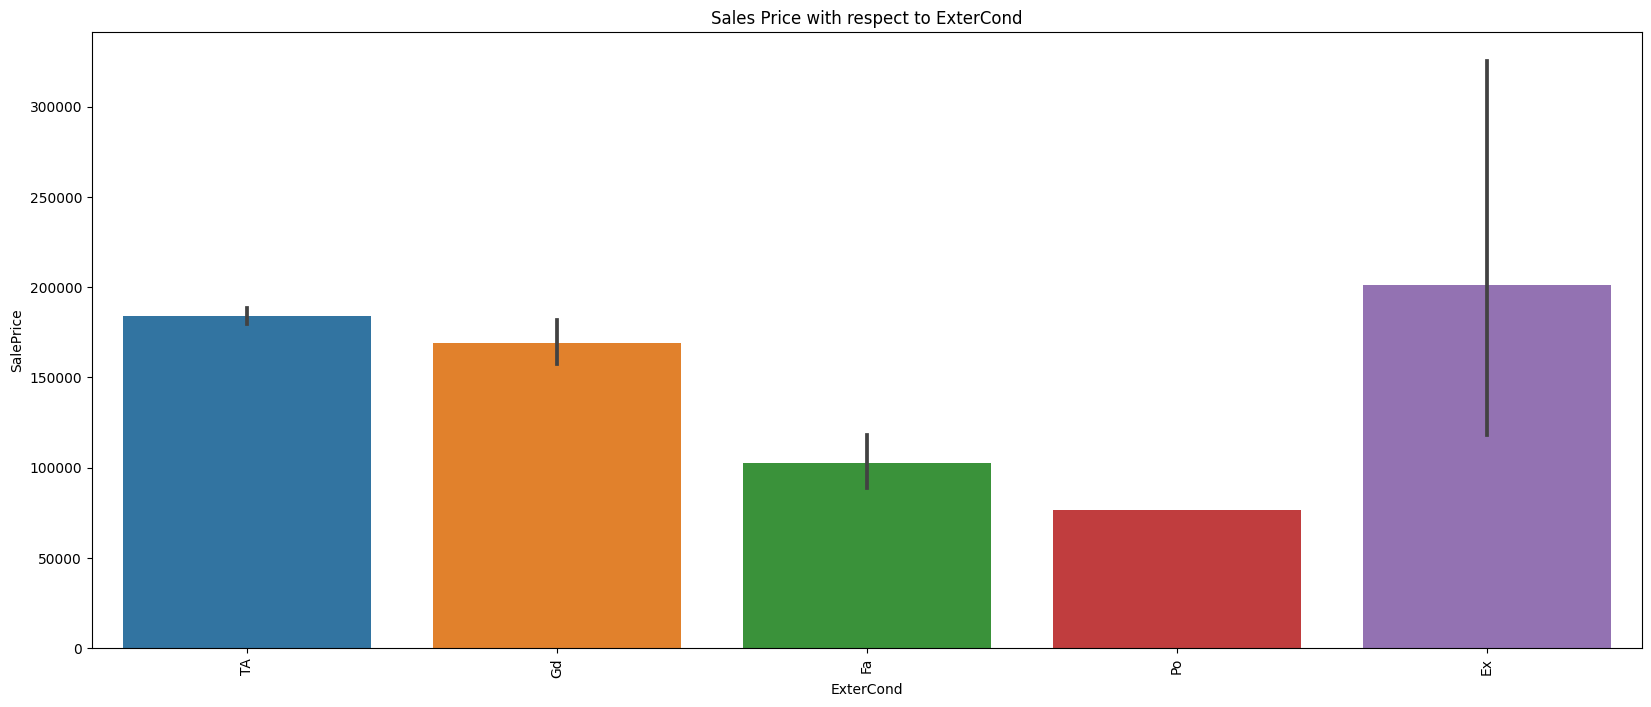

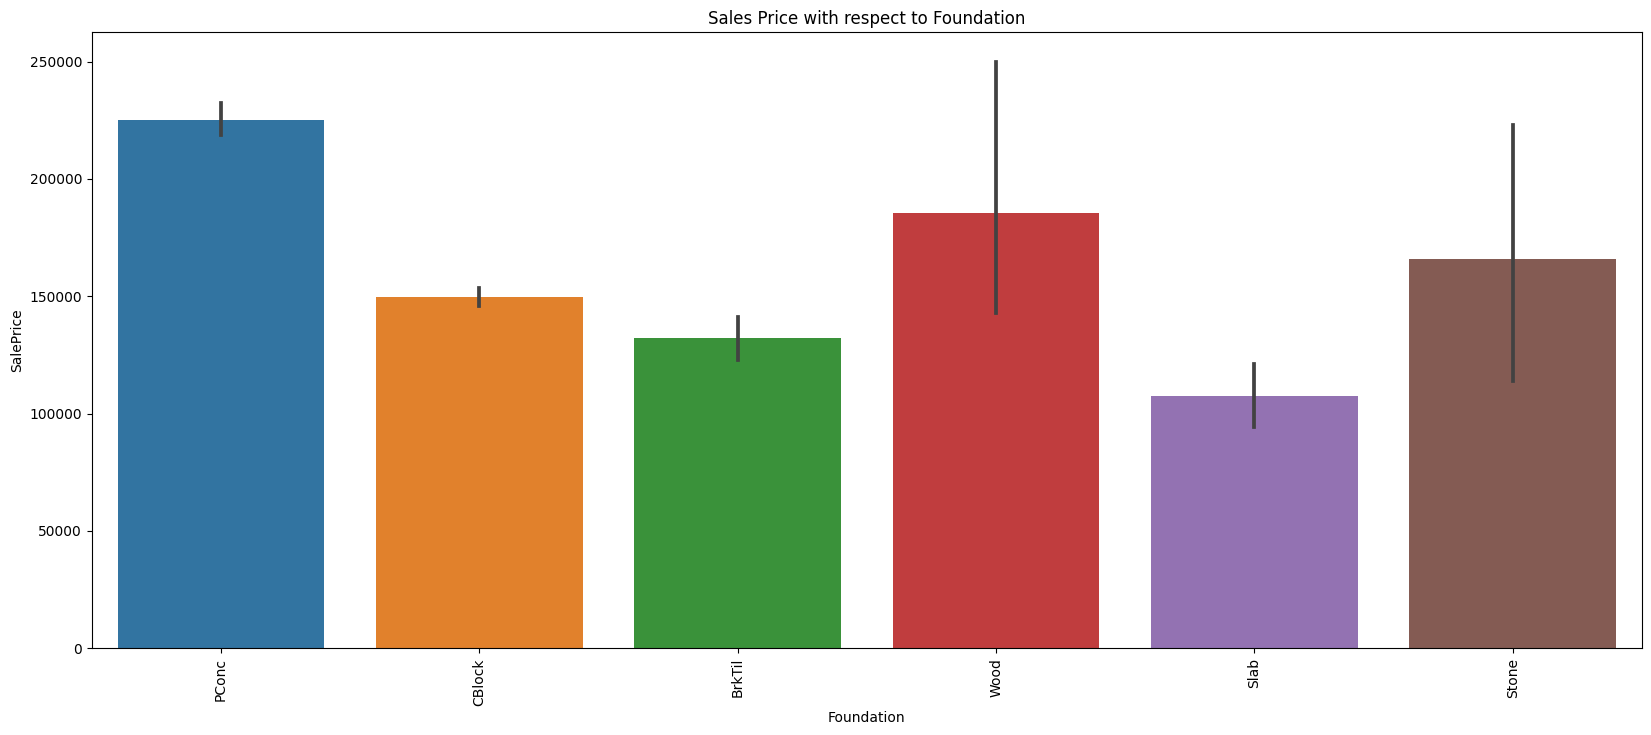

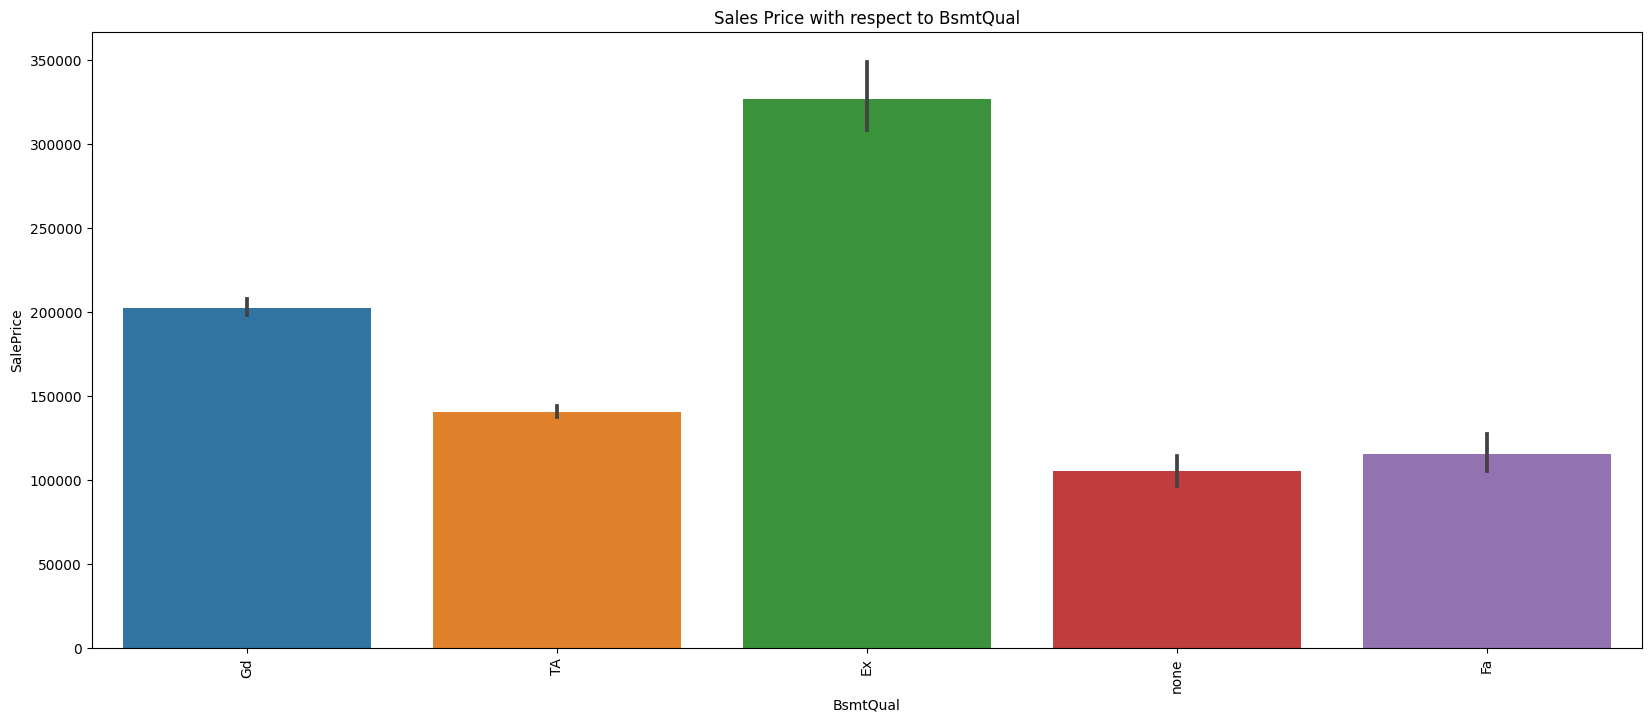

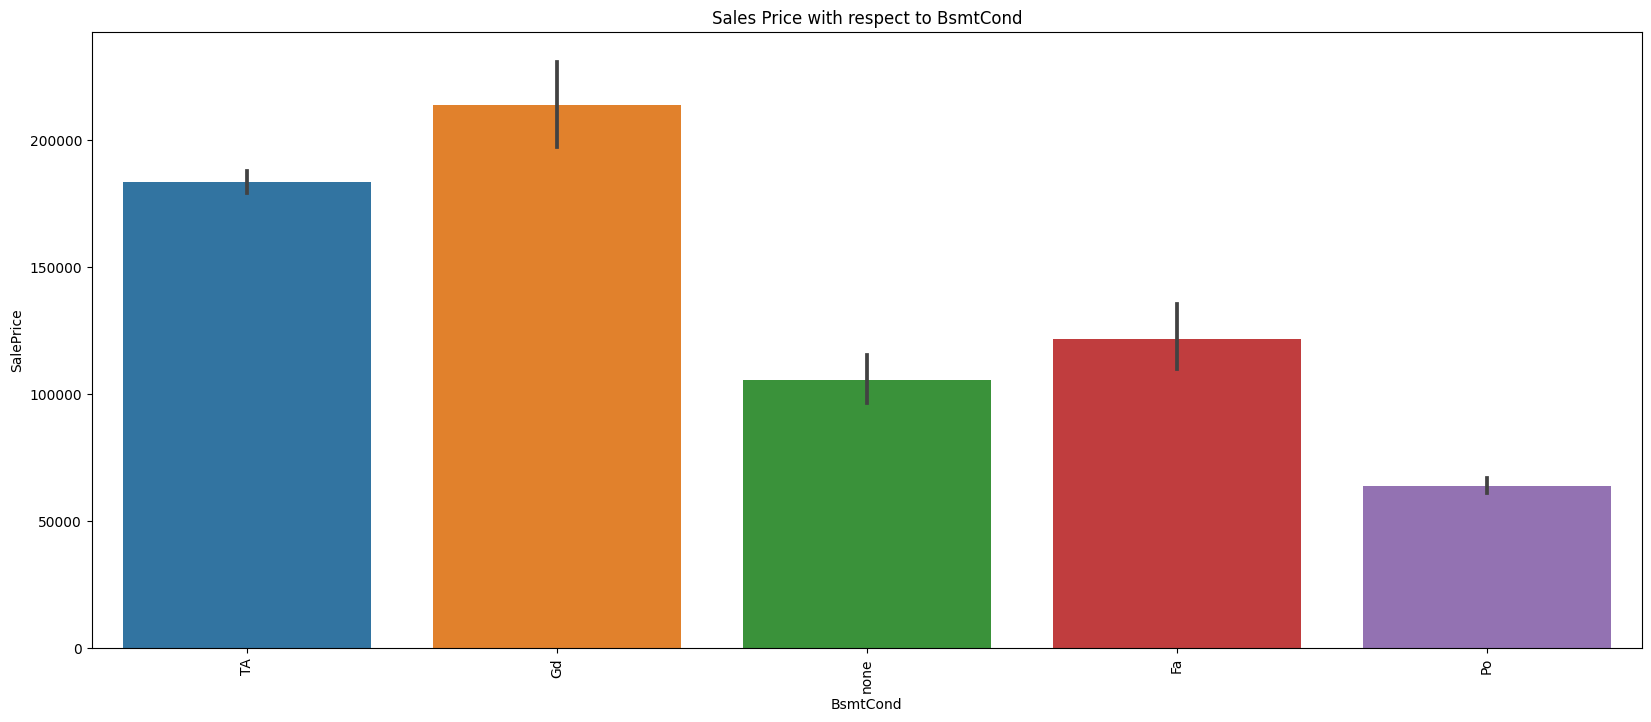

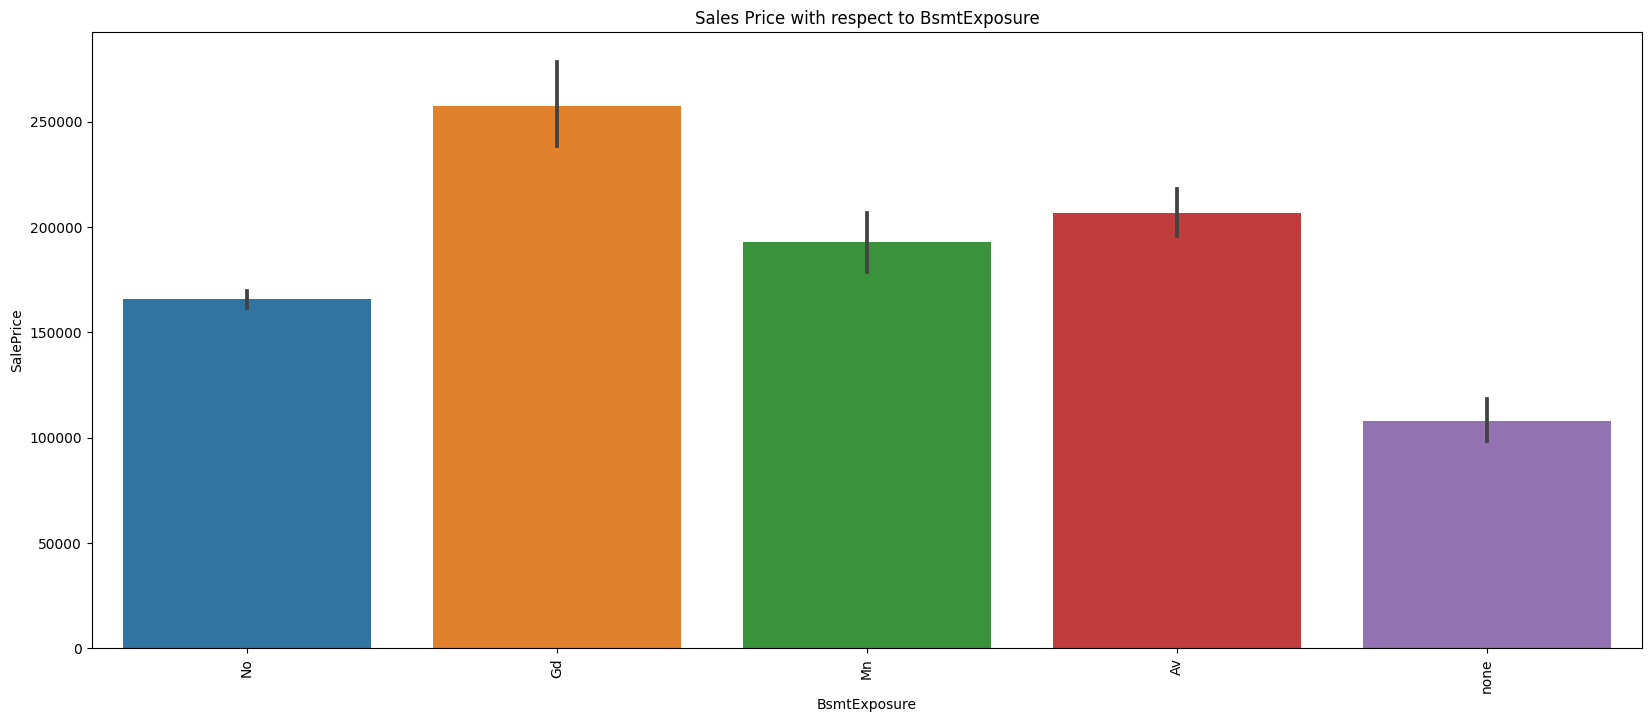

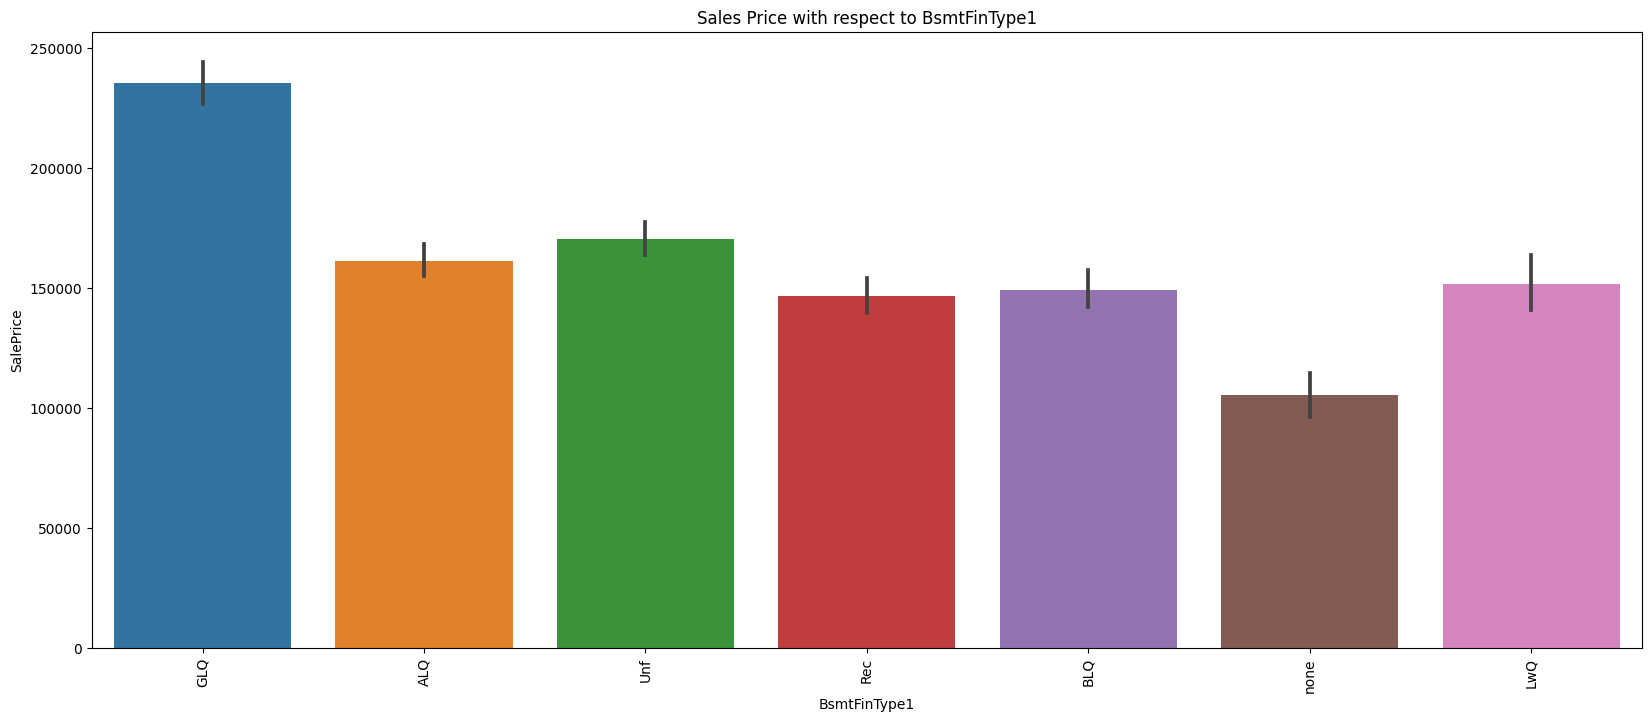

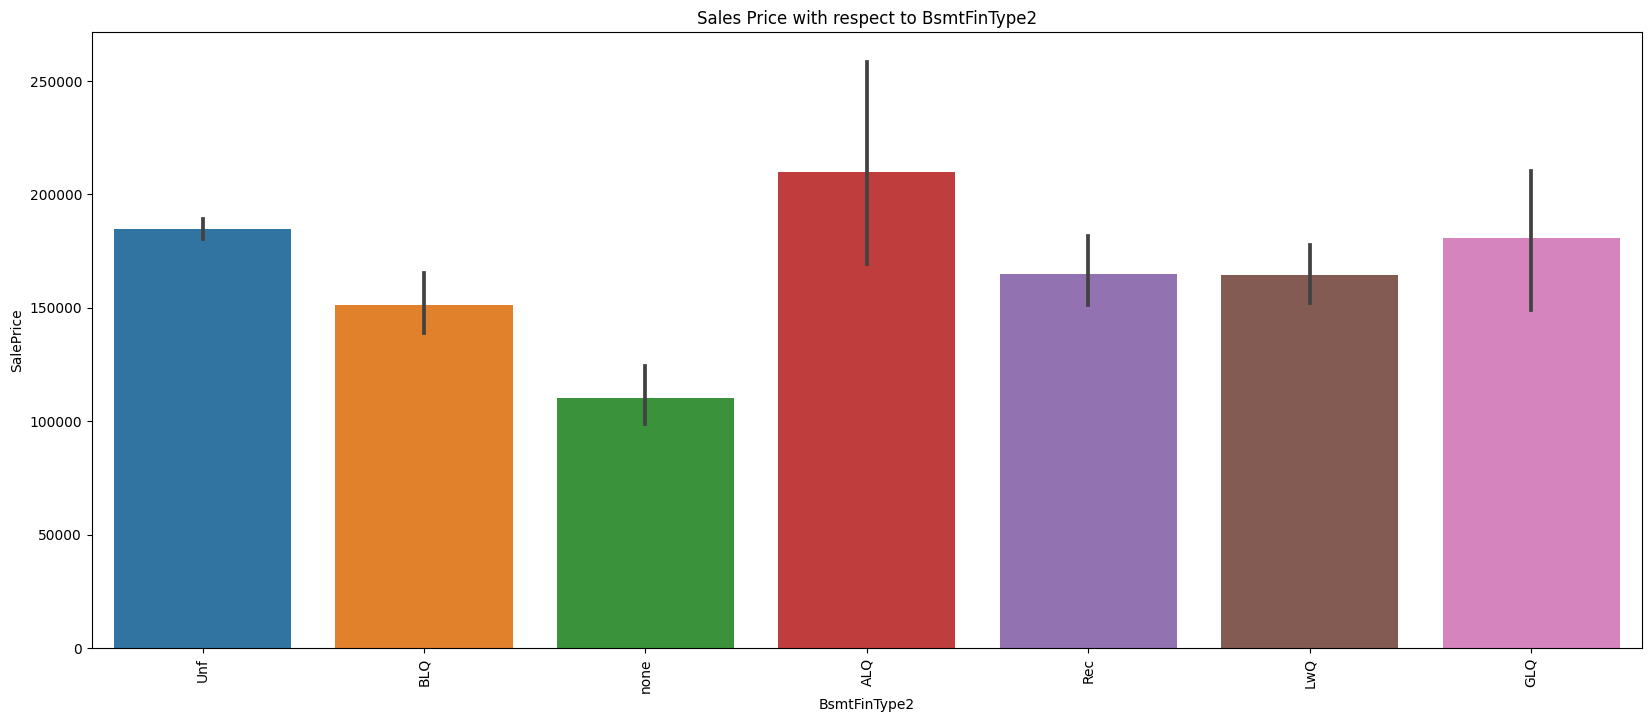

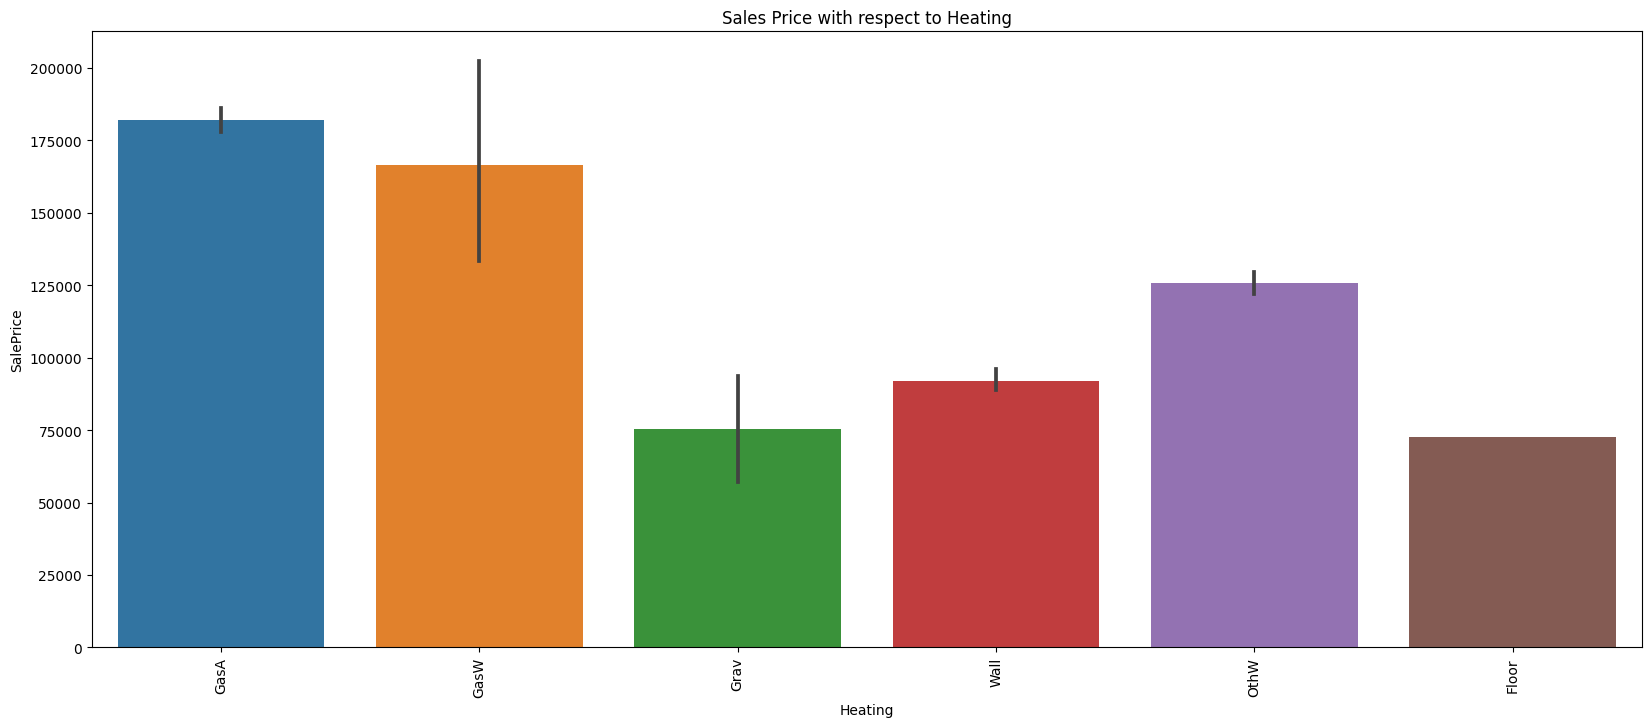

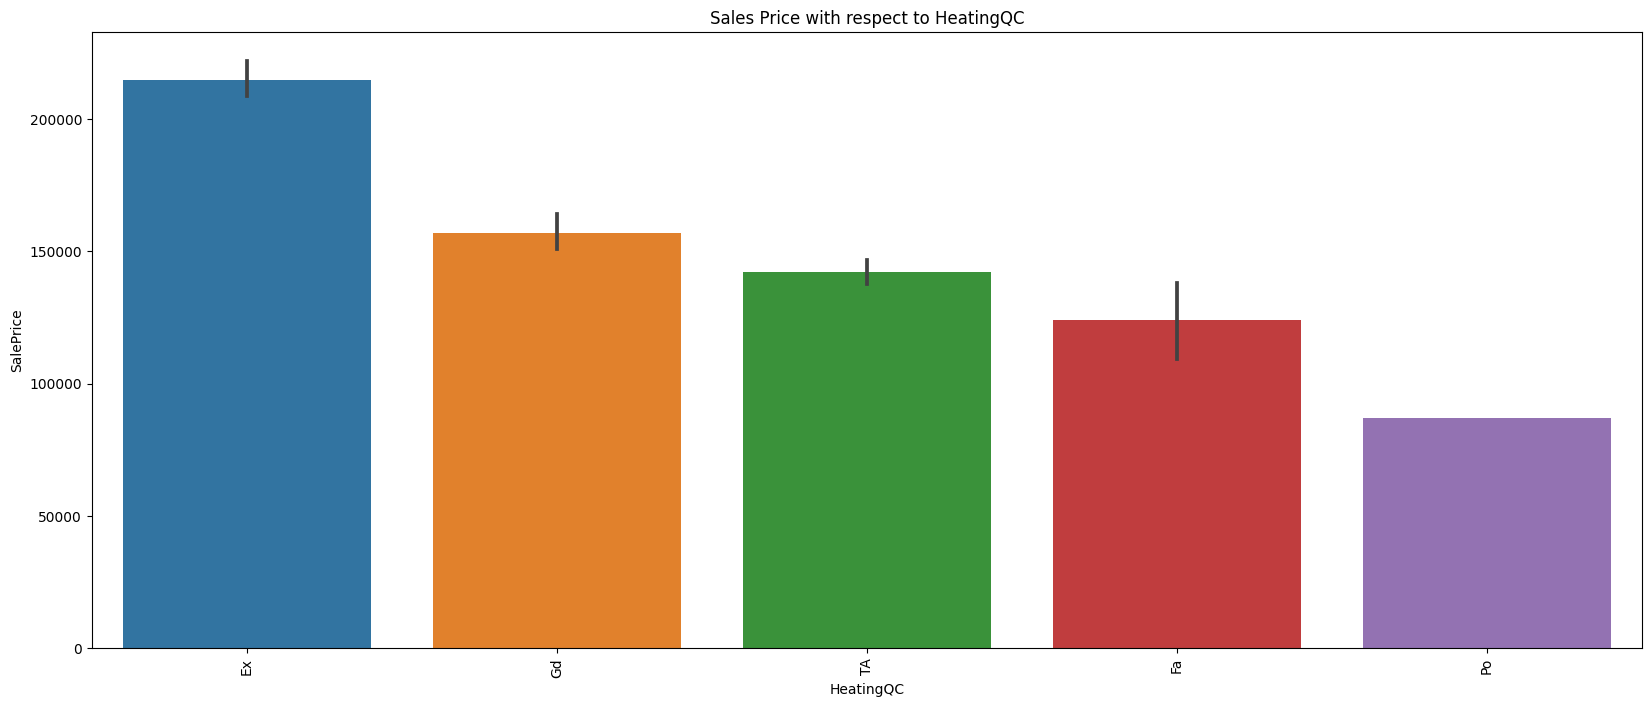

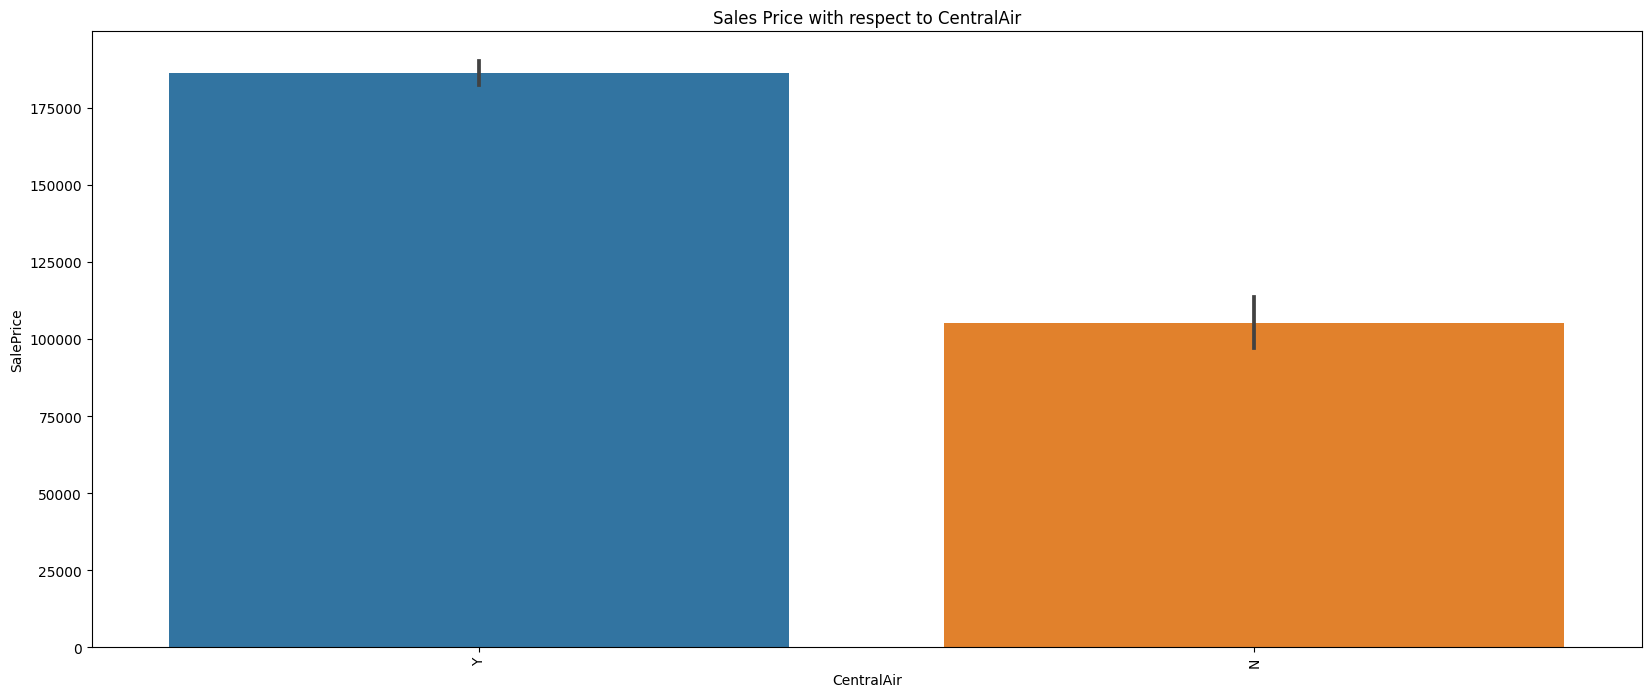

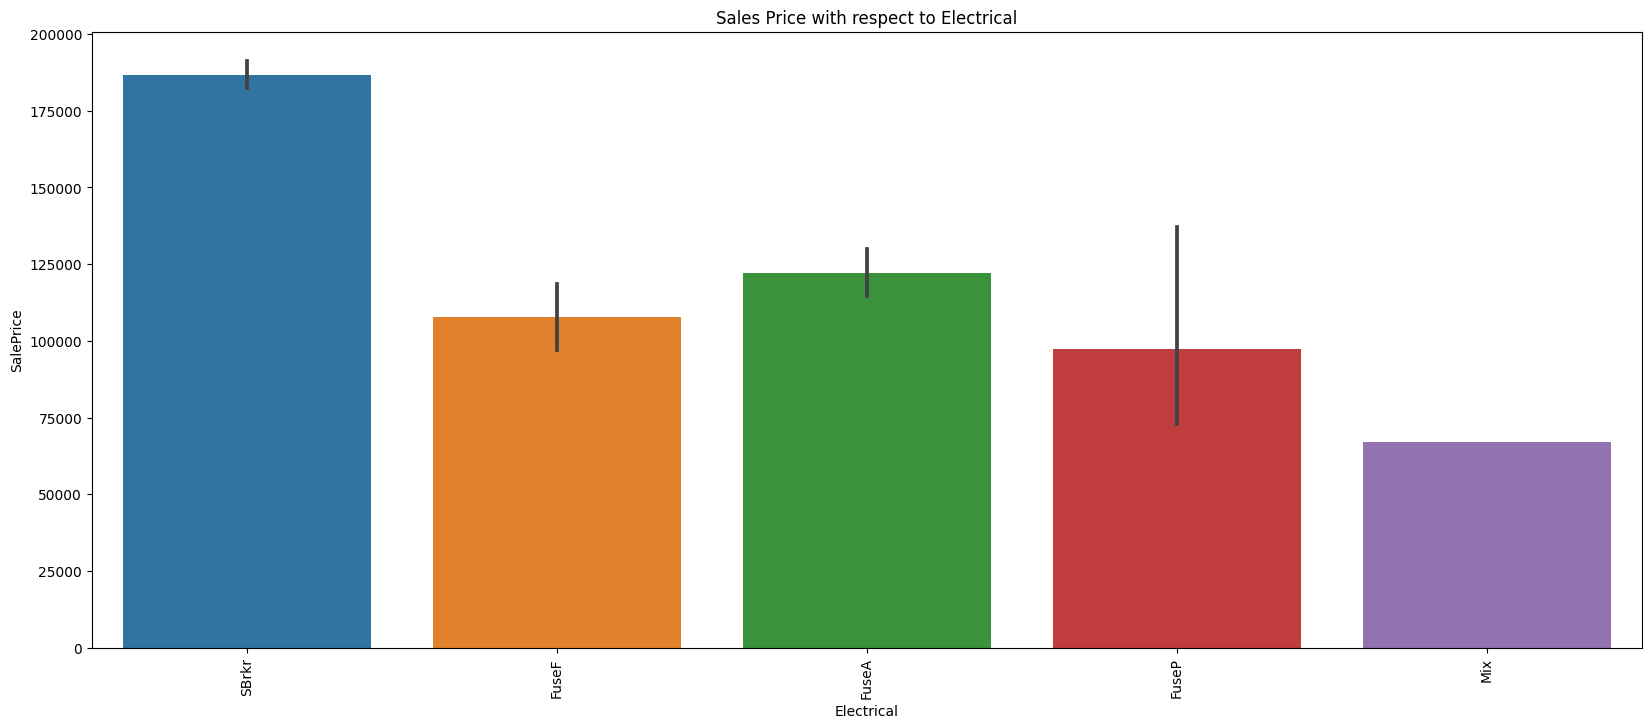

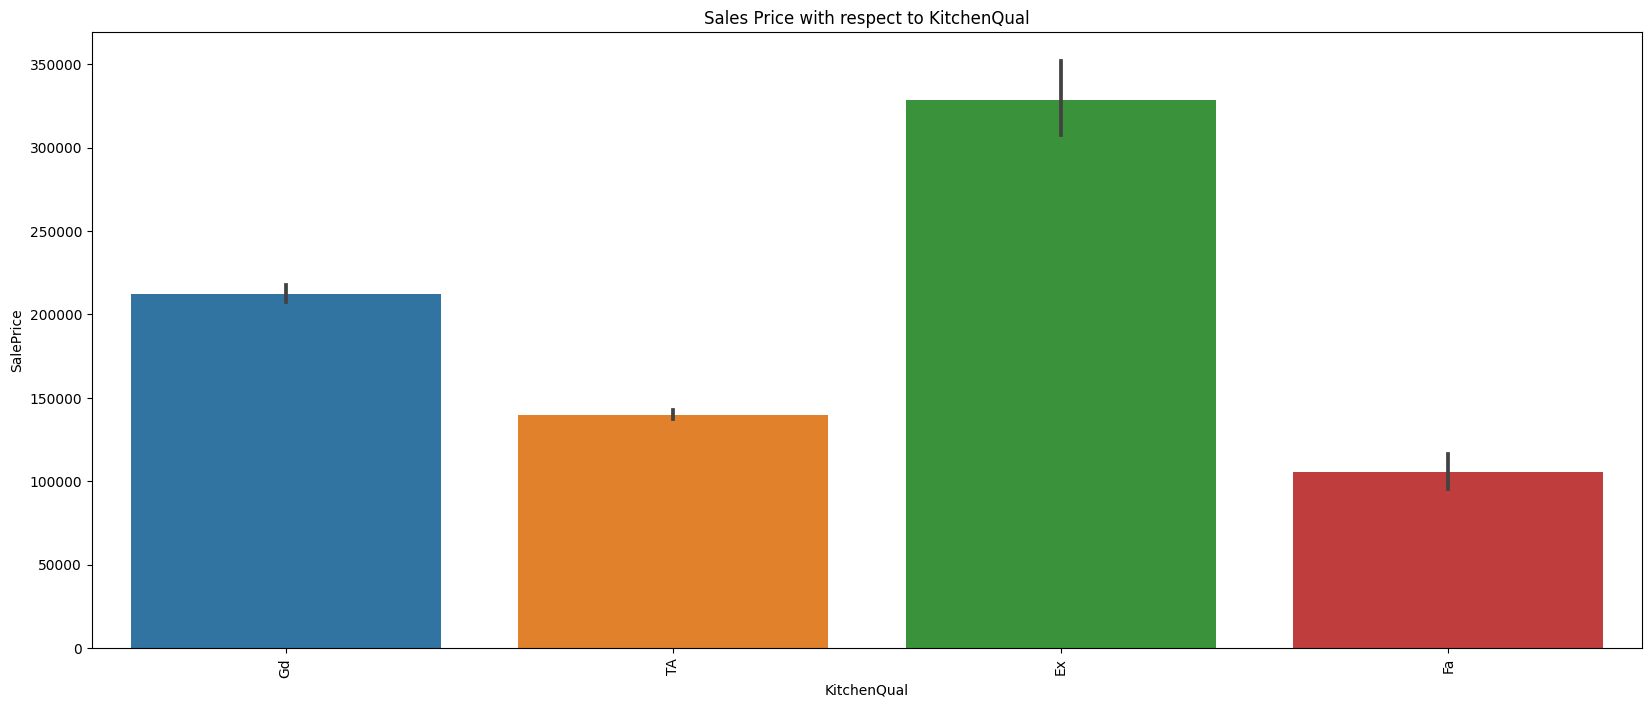

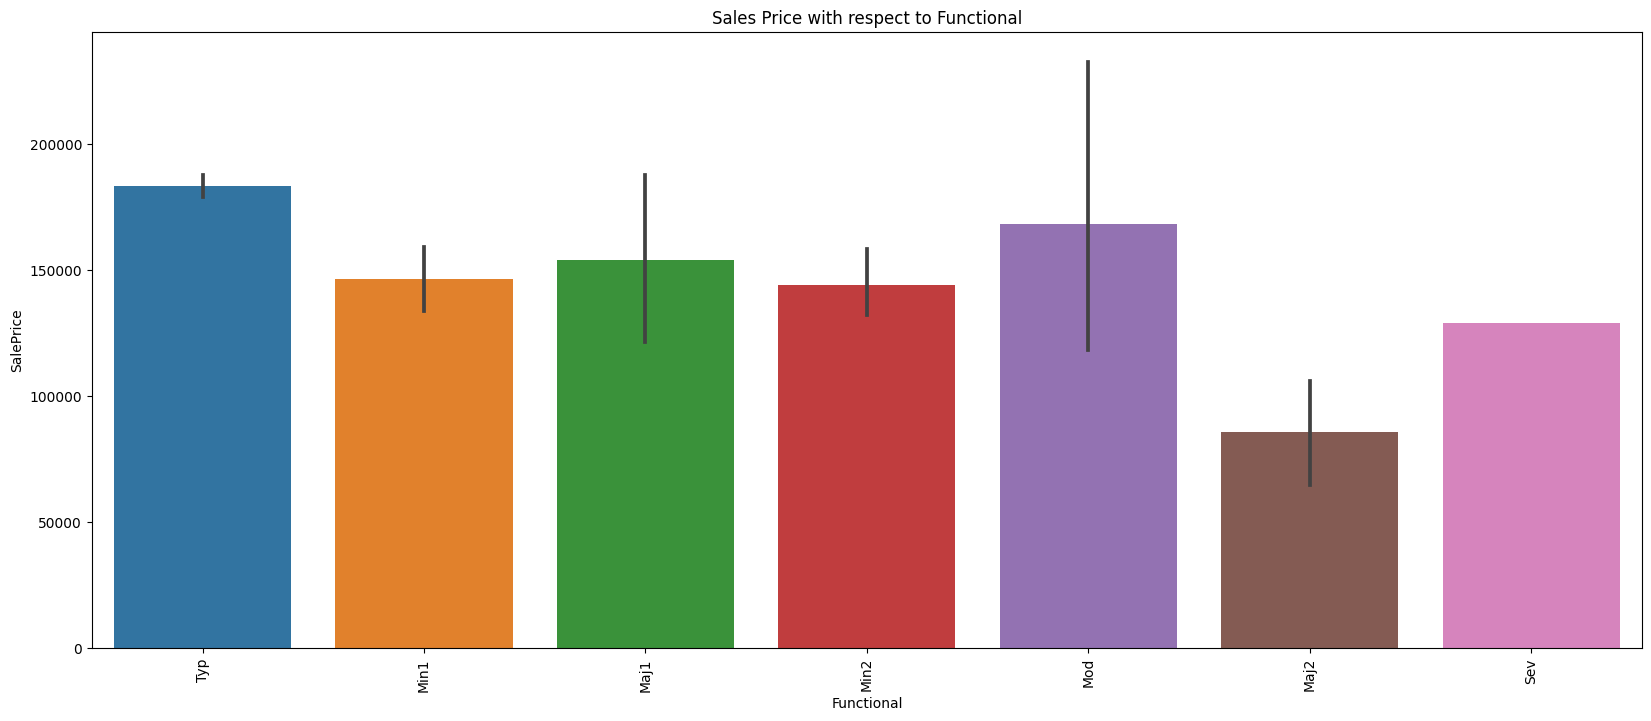

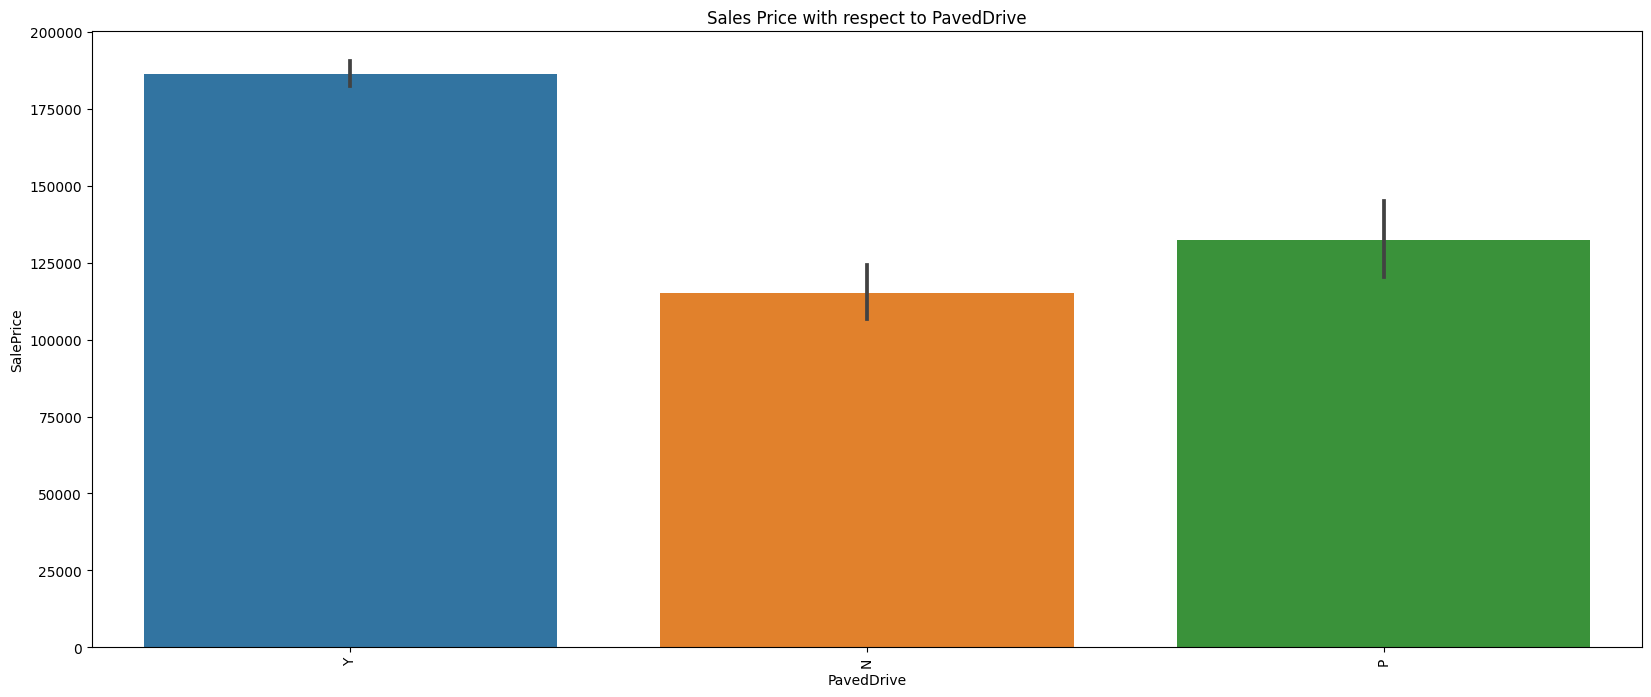

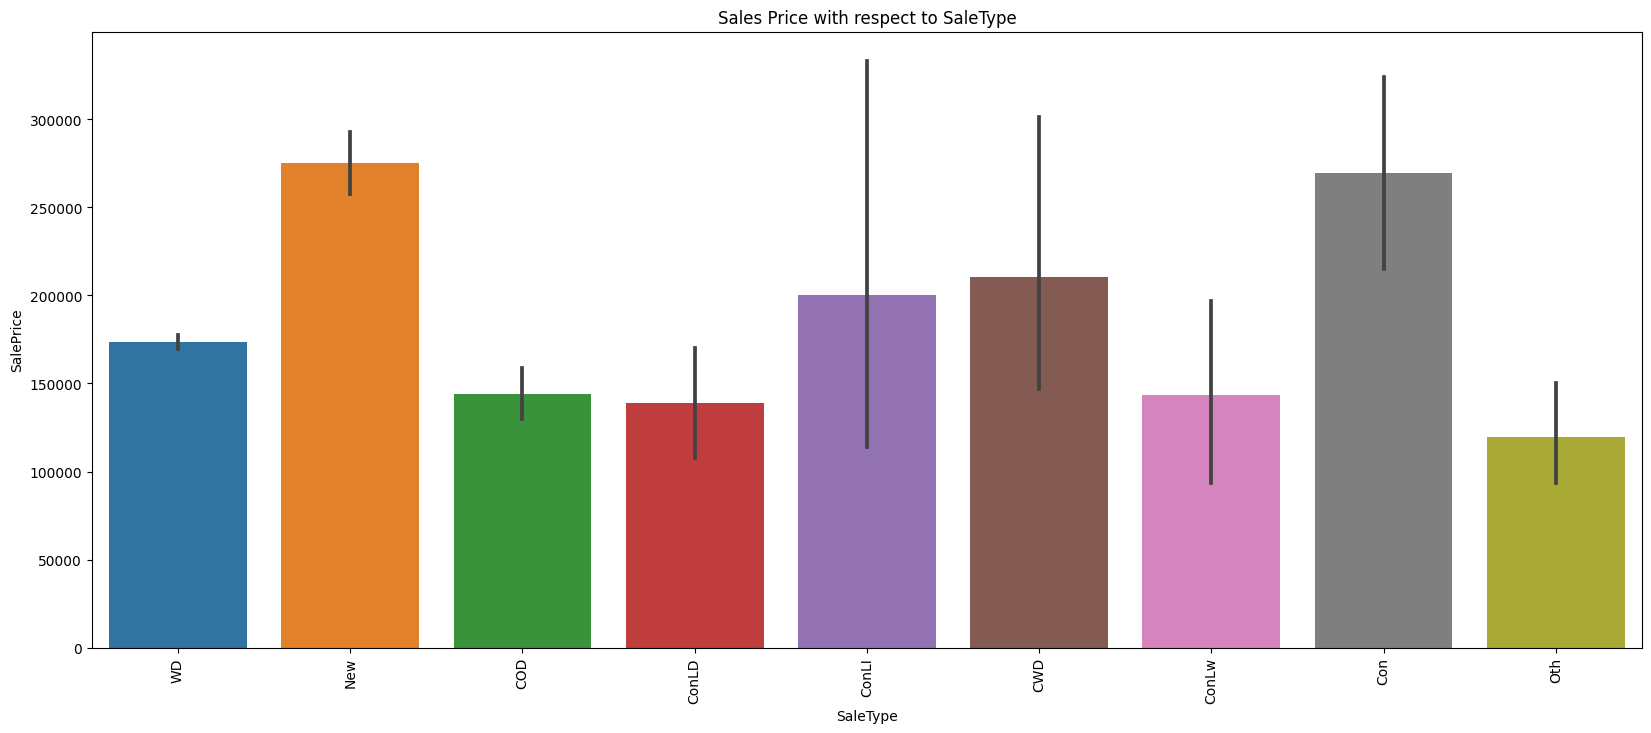

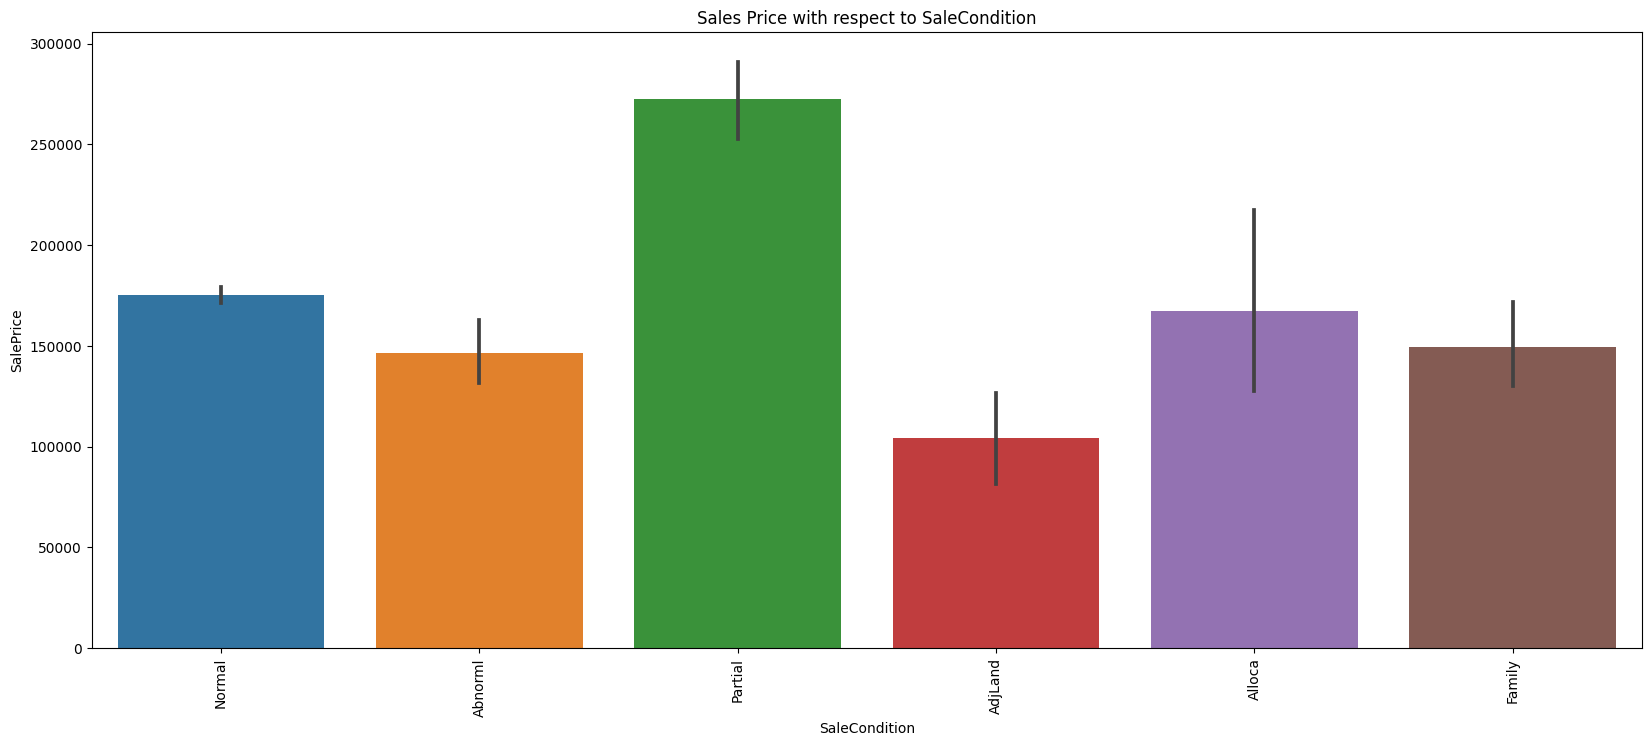

In [20]:
for x in categorical_columns.columns:
    categorial_columns_graph(x)

##### Conclusion
##### - Sale Price tends to increase for Paved Street and housing with Pavements
##### - Sale is more for Centrally AC houses and housese made of Stones
##### - New Houses tend to demand more Price as compared to Old Houses



In [21]:
def numerical_columns_graph(columns):
    plt.figure(figsize=(20, 8))
    seaborn.scatterplot(x=columns, y="SalePrice", data= housing_raw_df)
    plt.title("Sales Price with respect to {}".format(columns))
    plt.xticks(rotation=90)

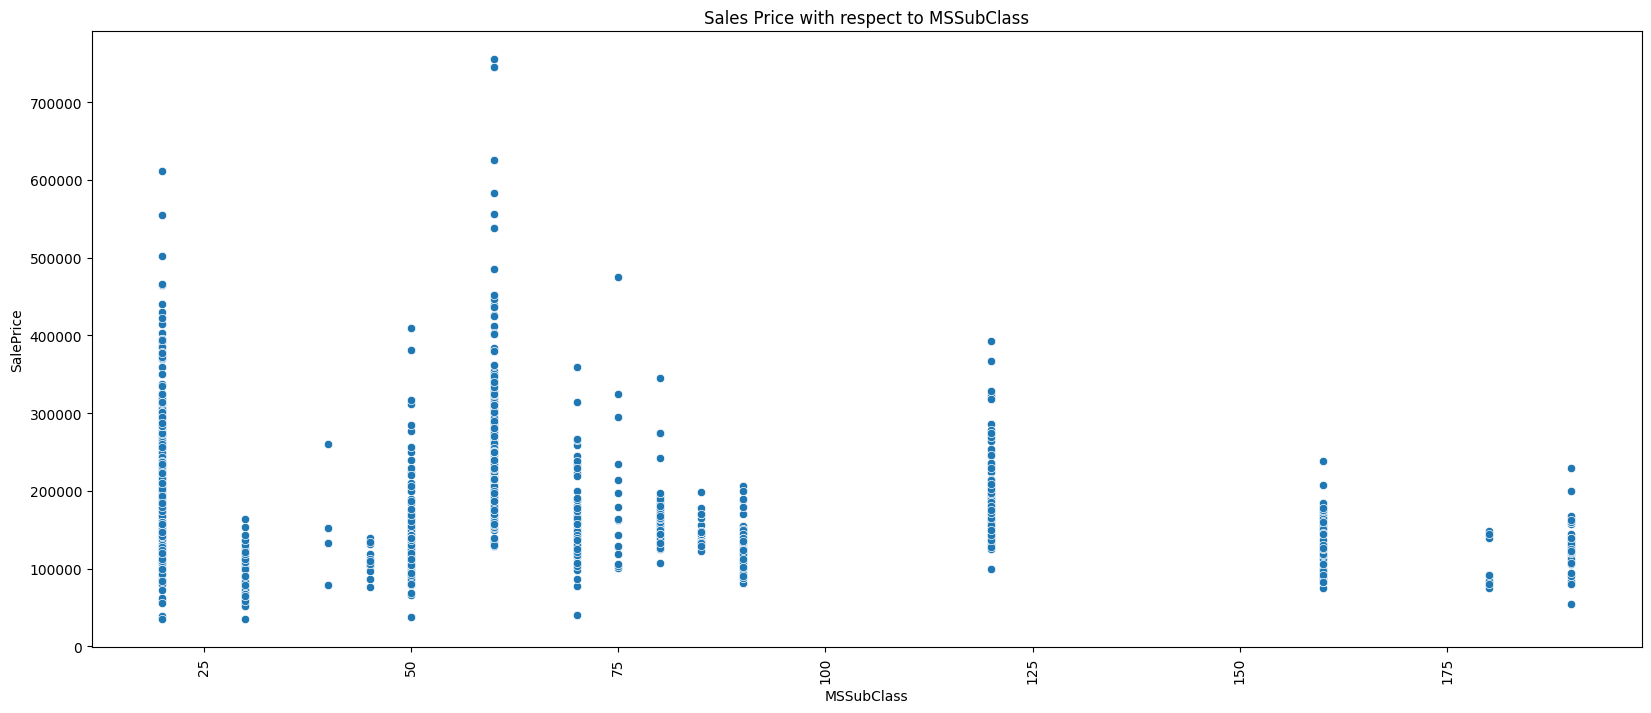

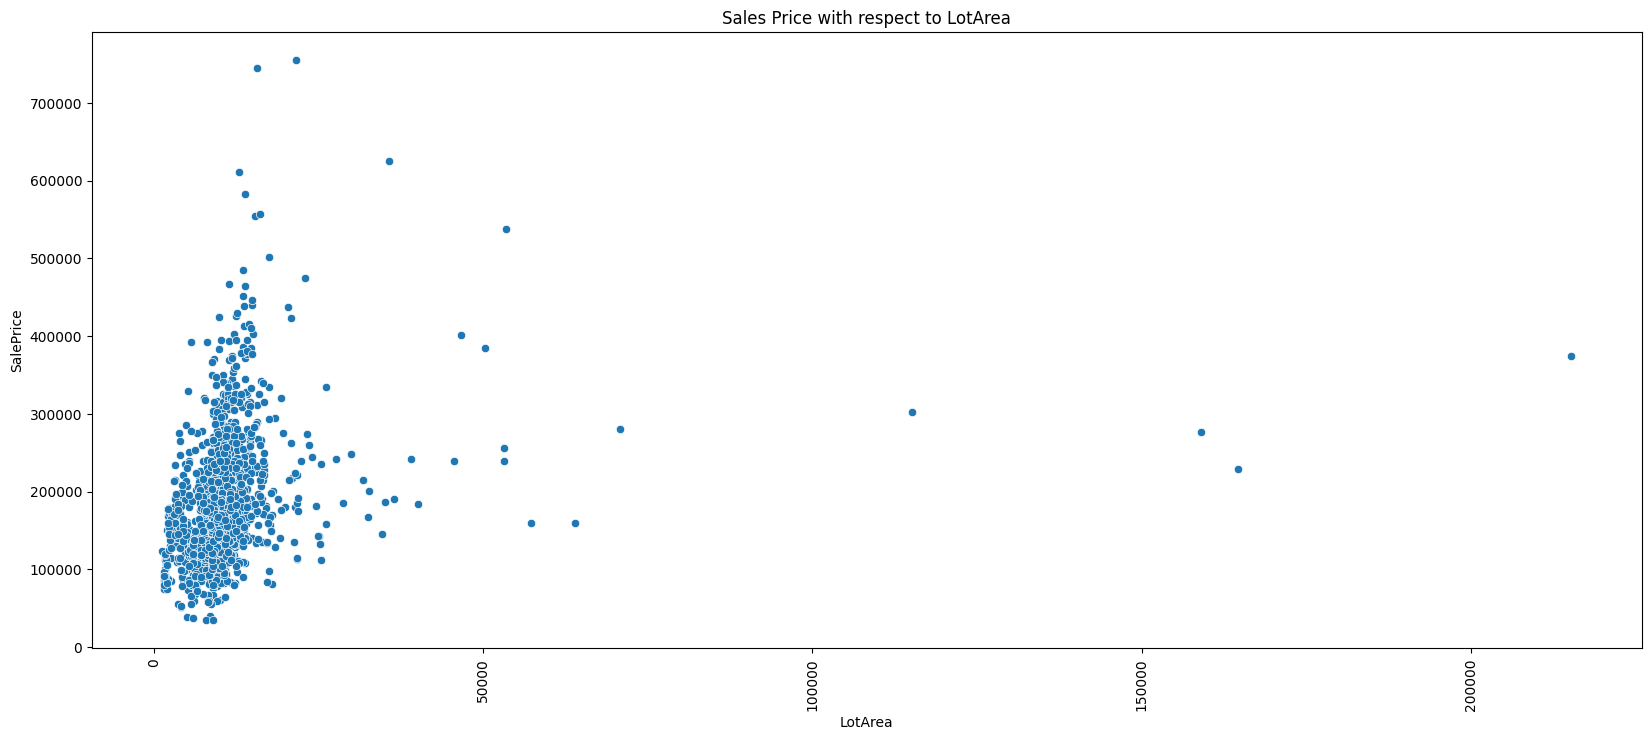

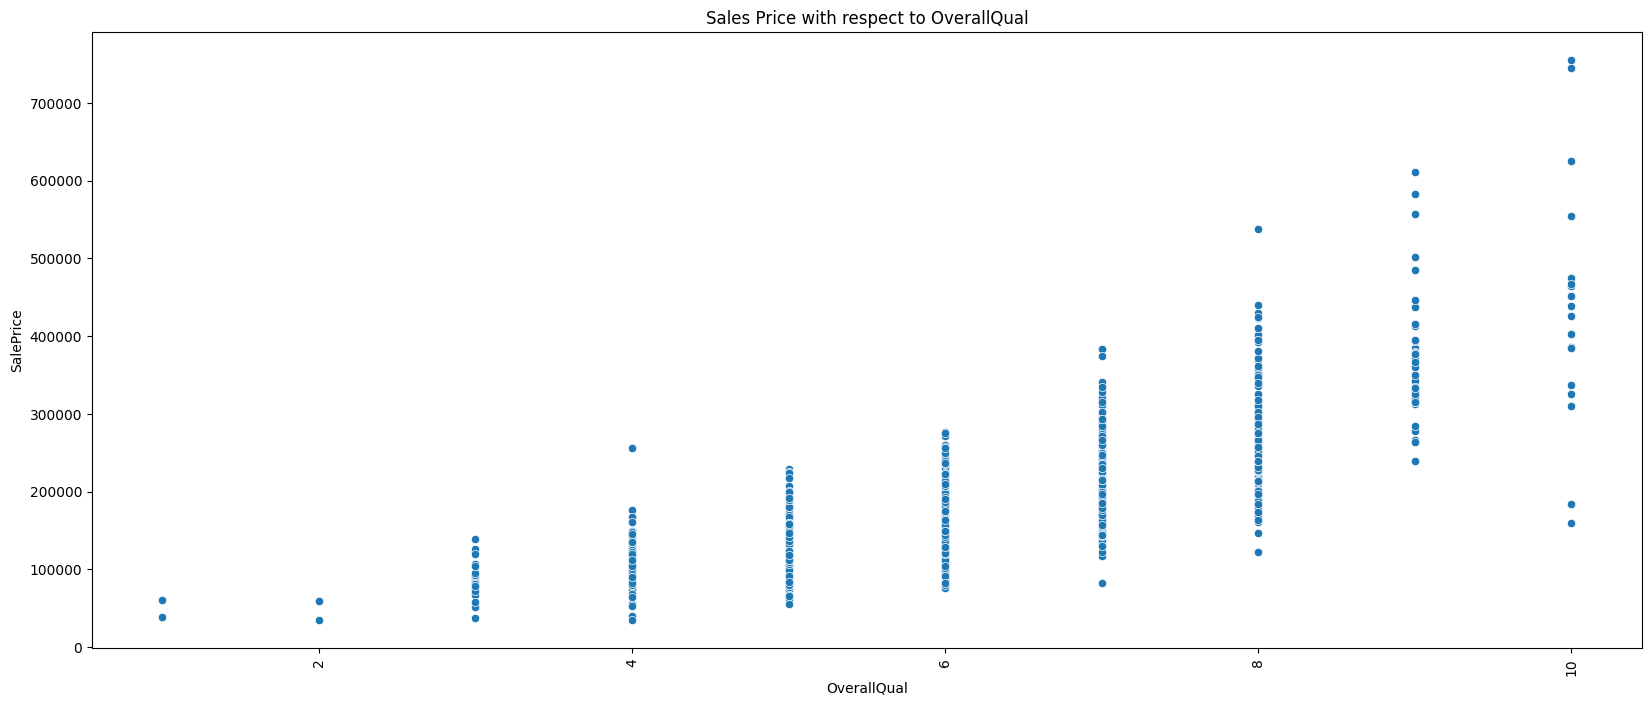

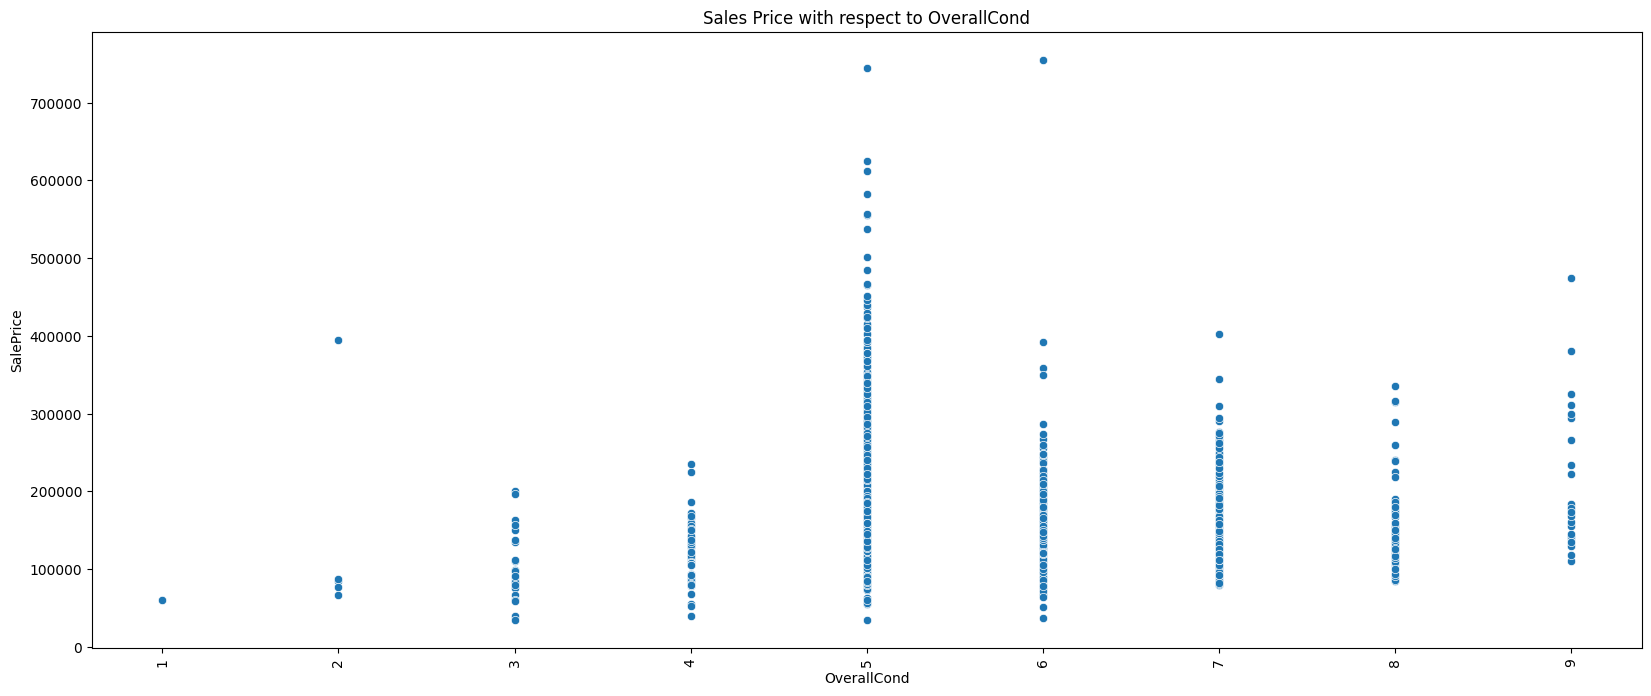

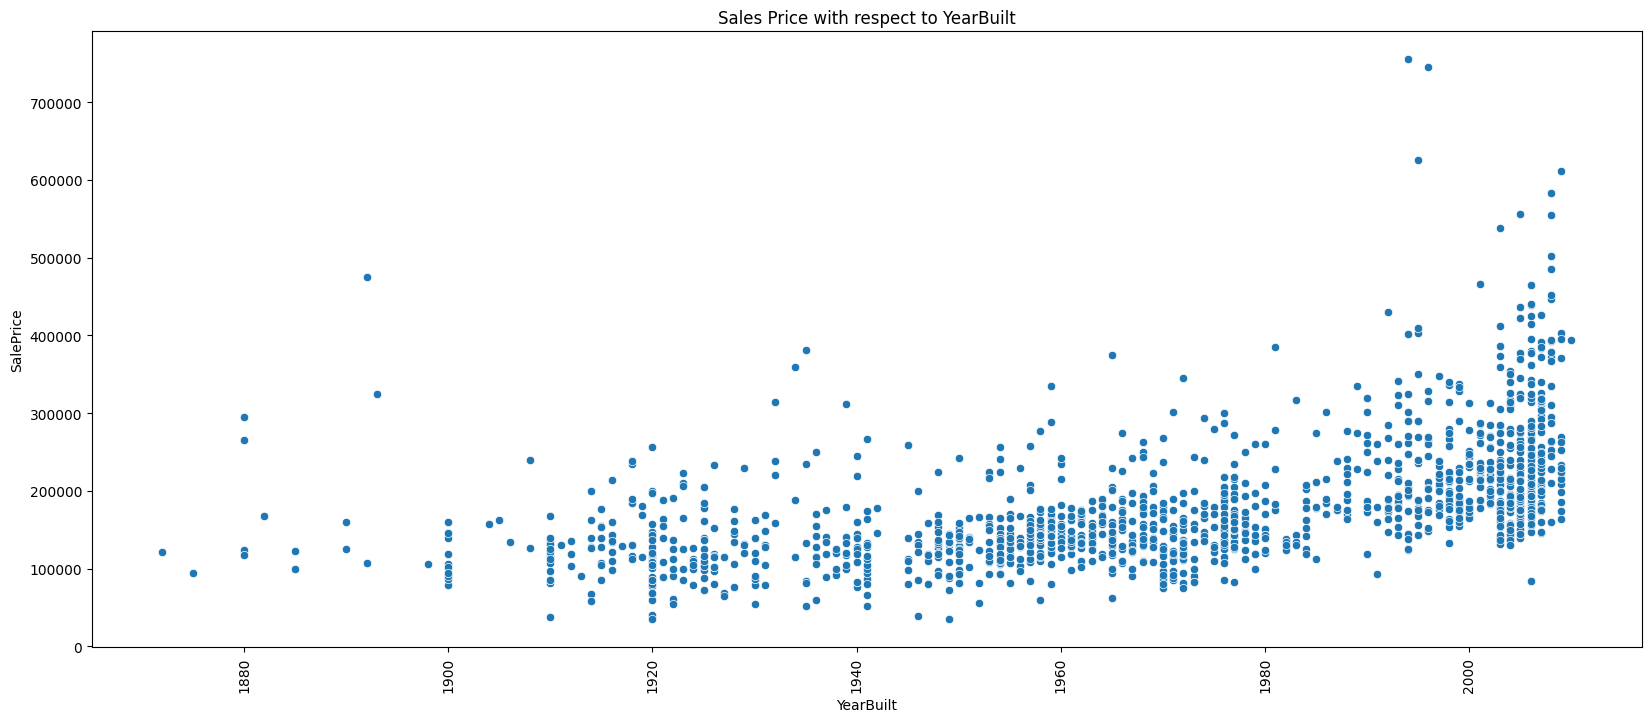

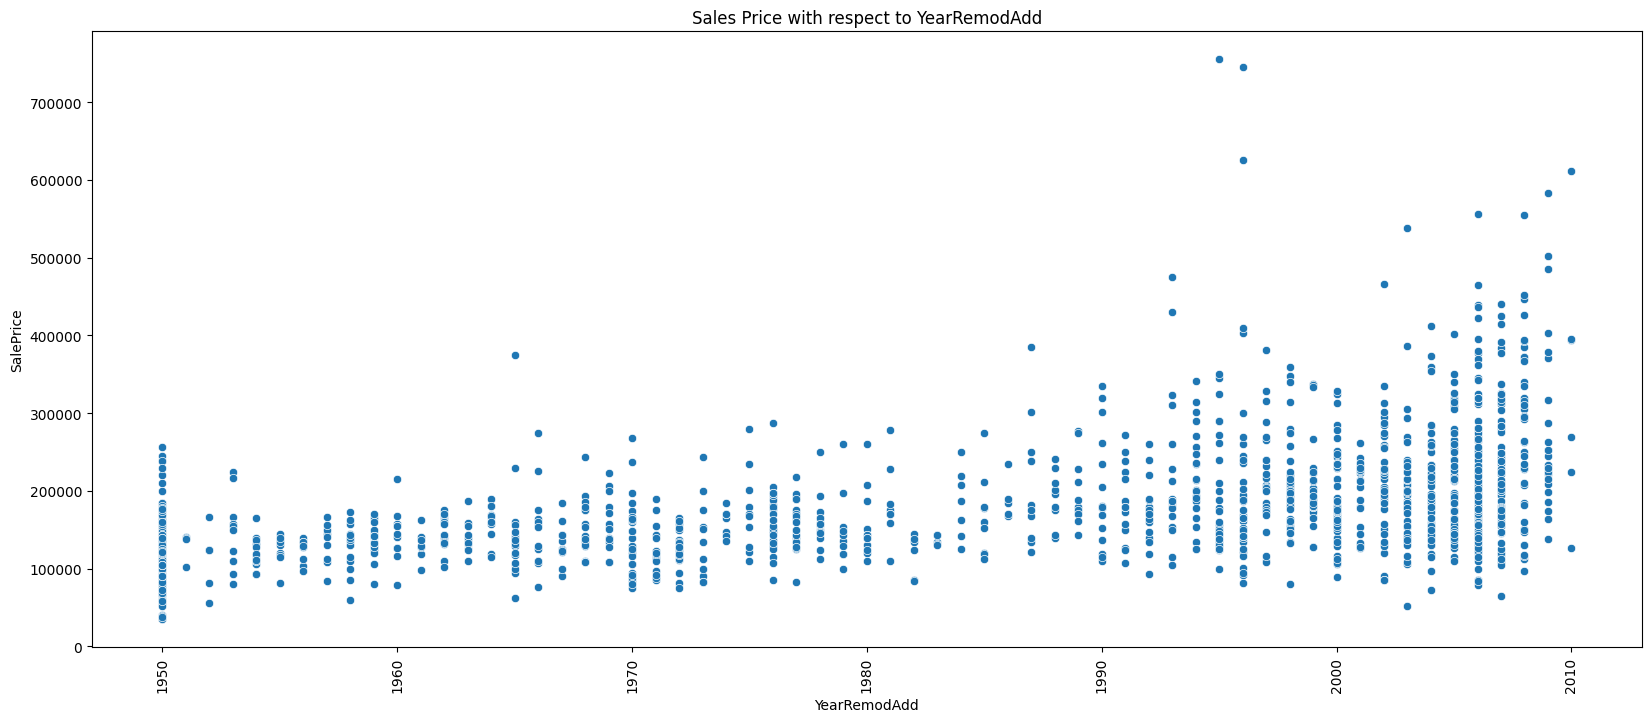

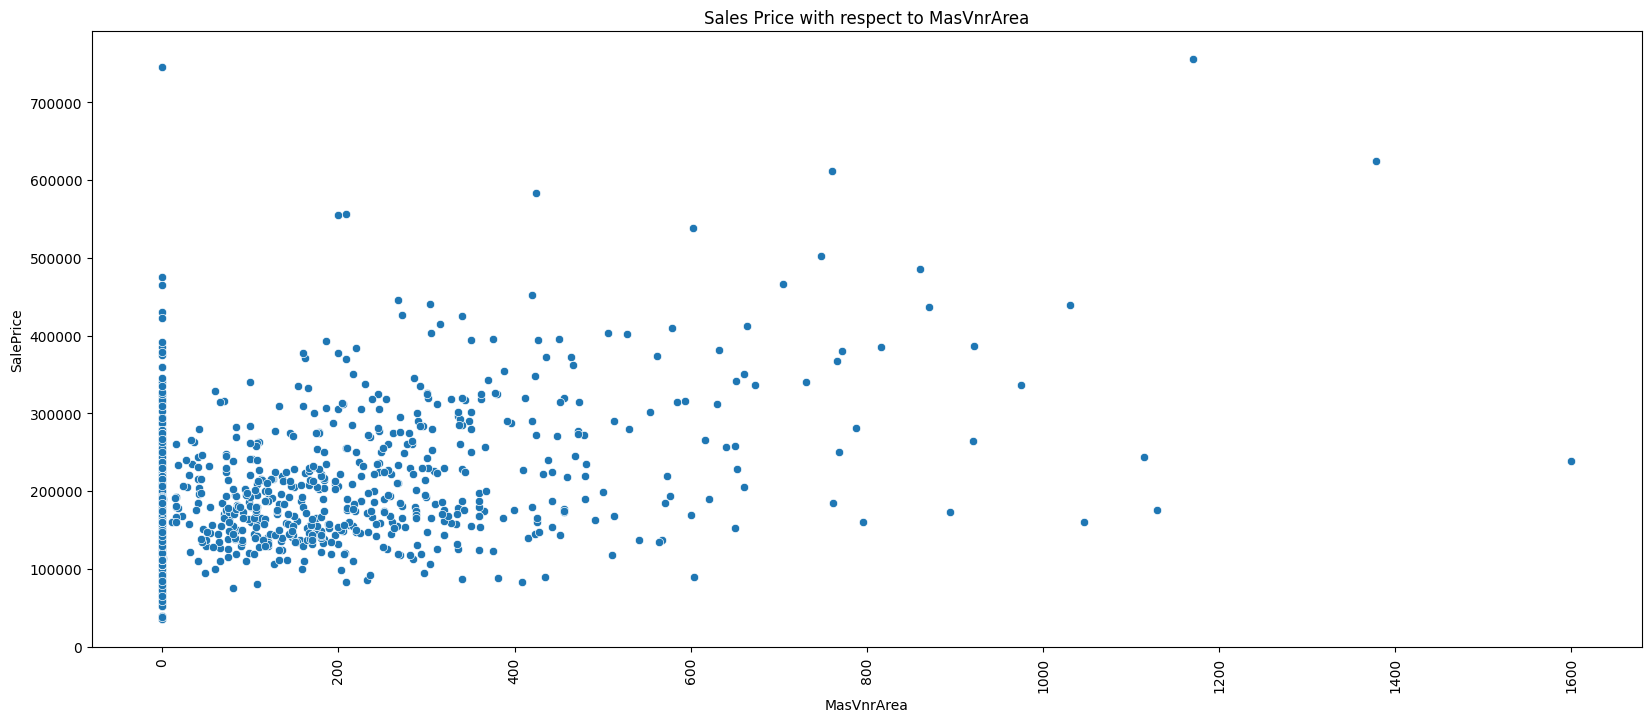

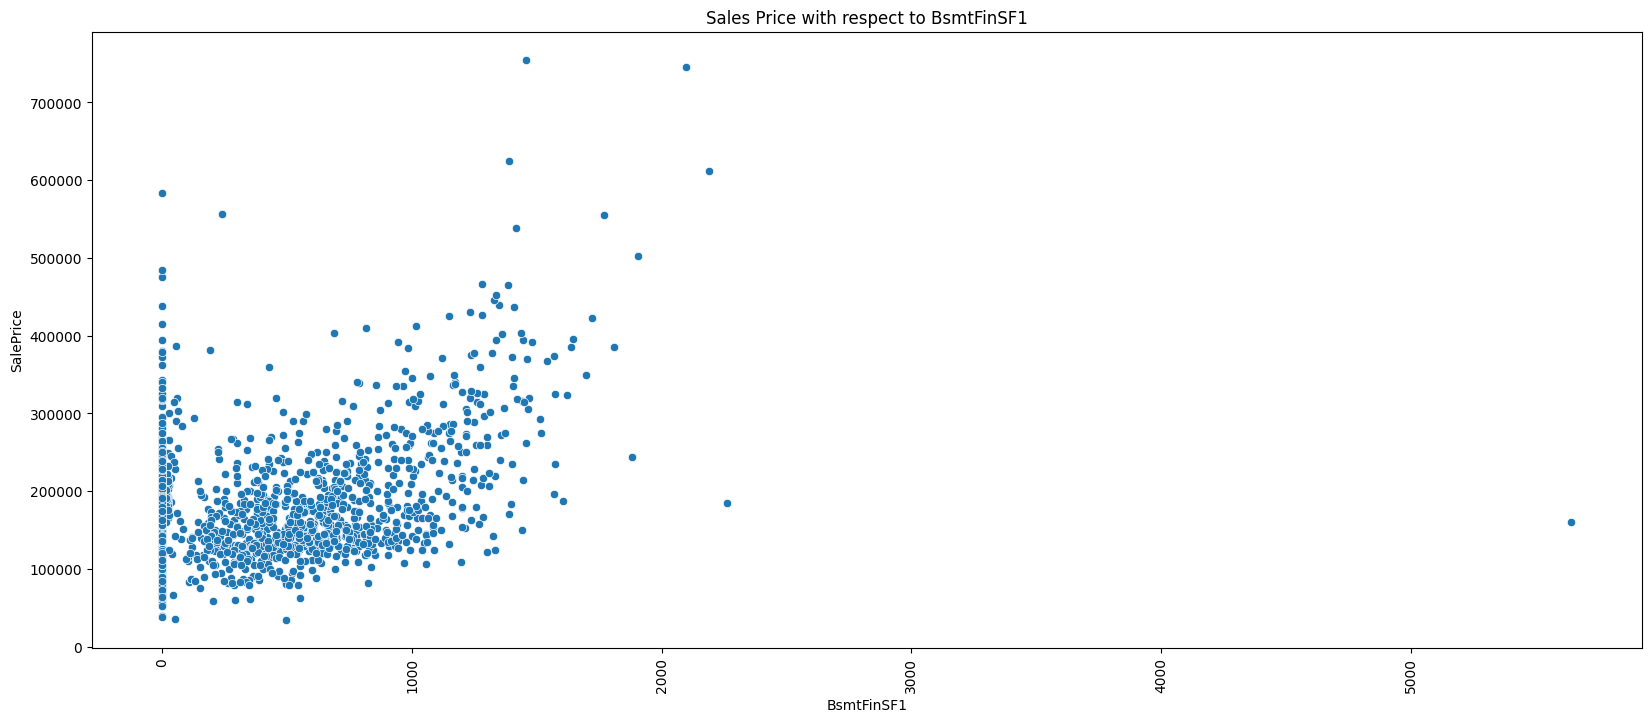

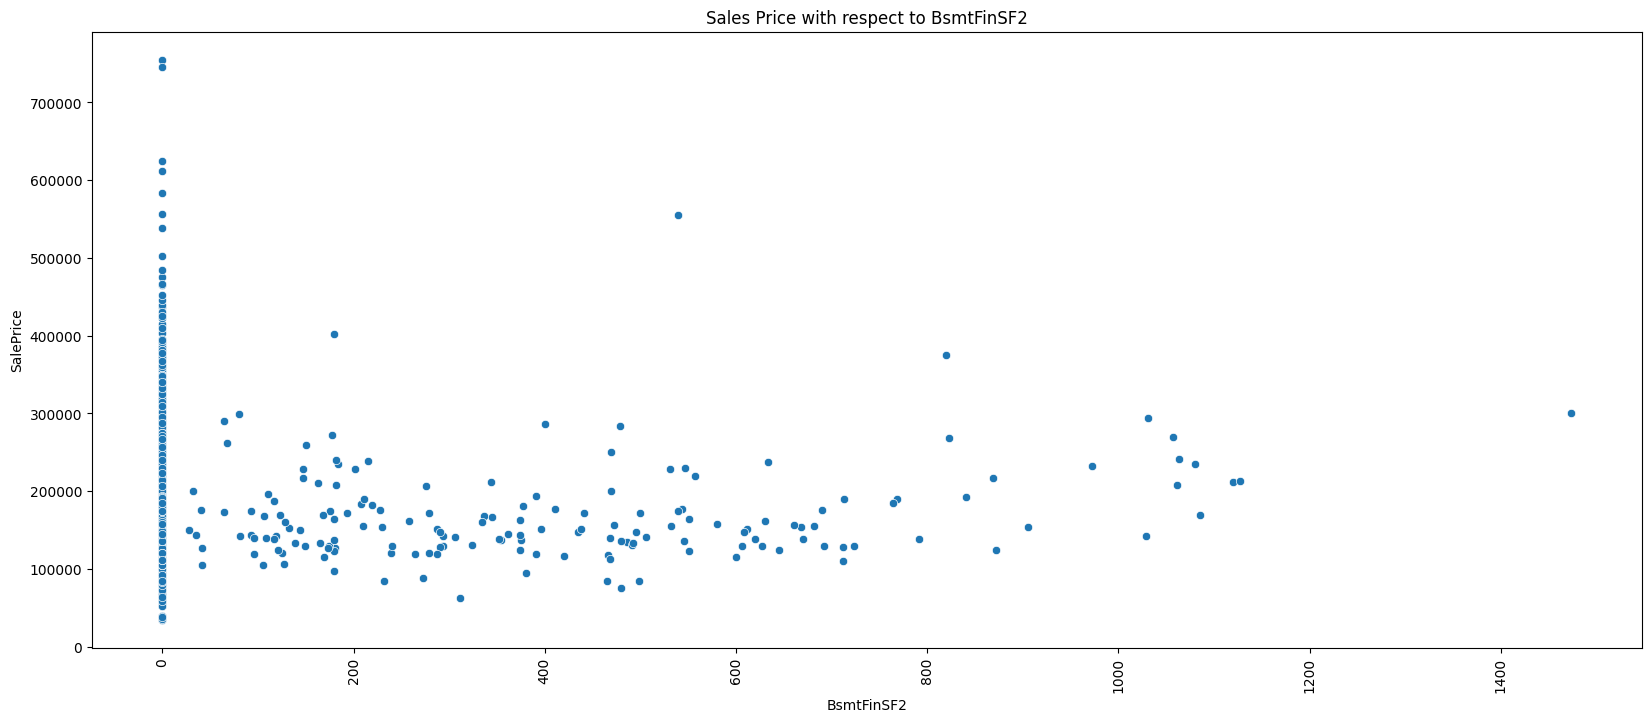

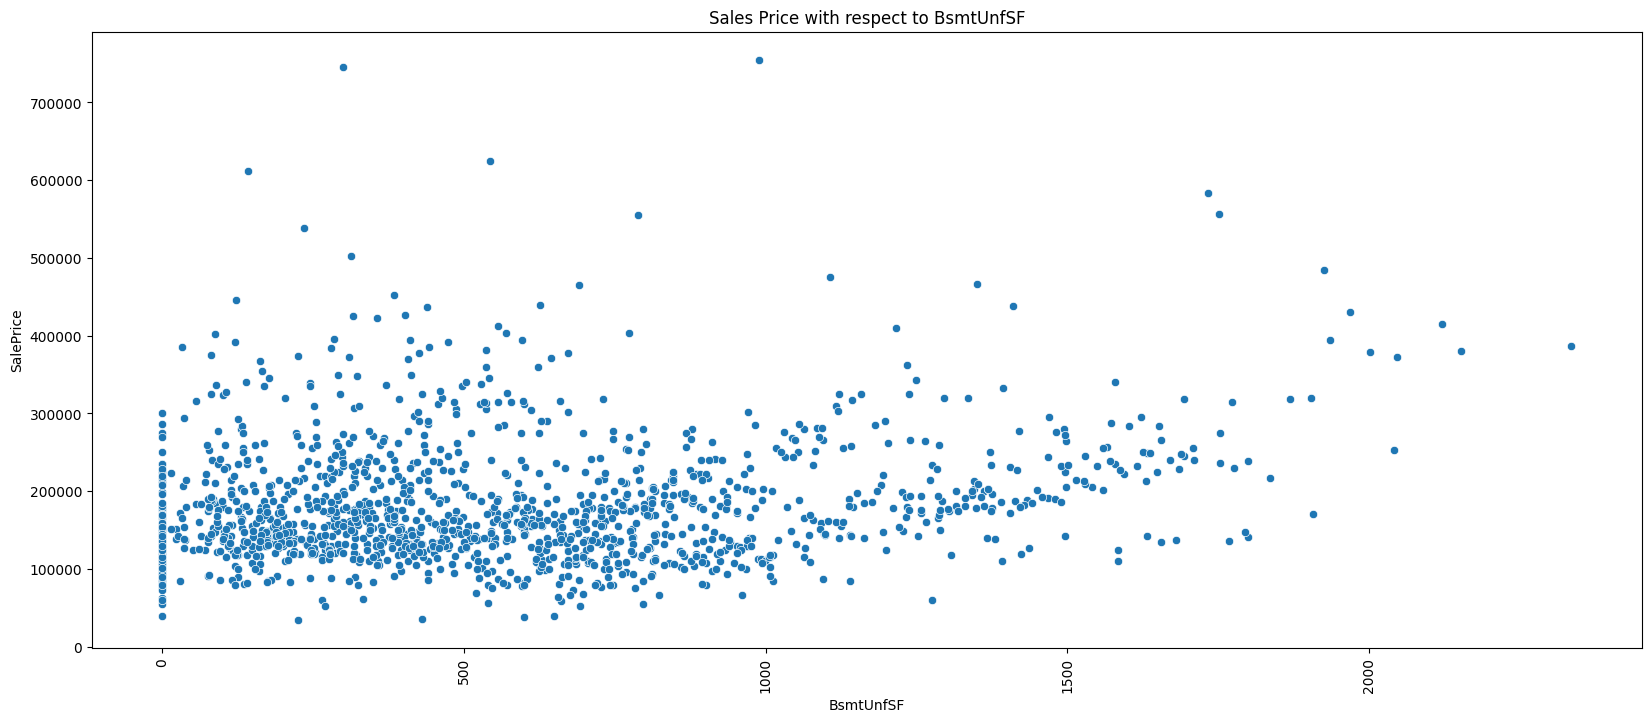

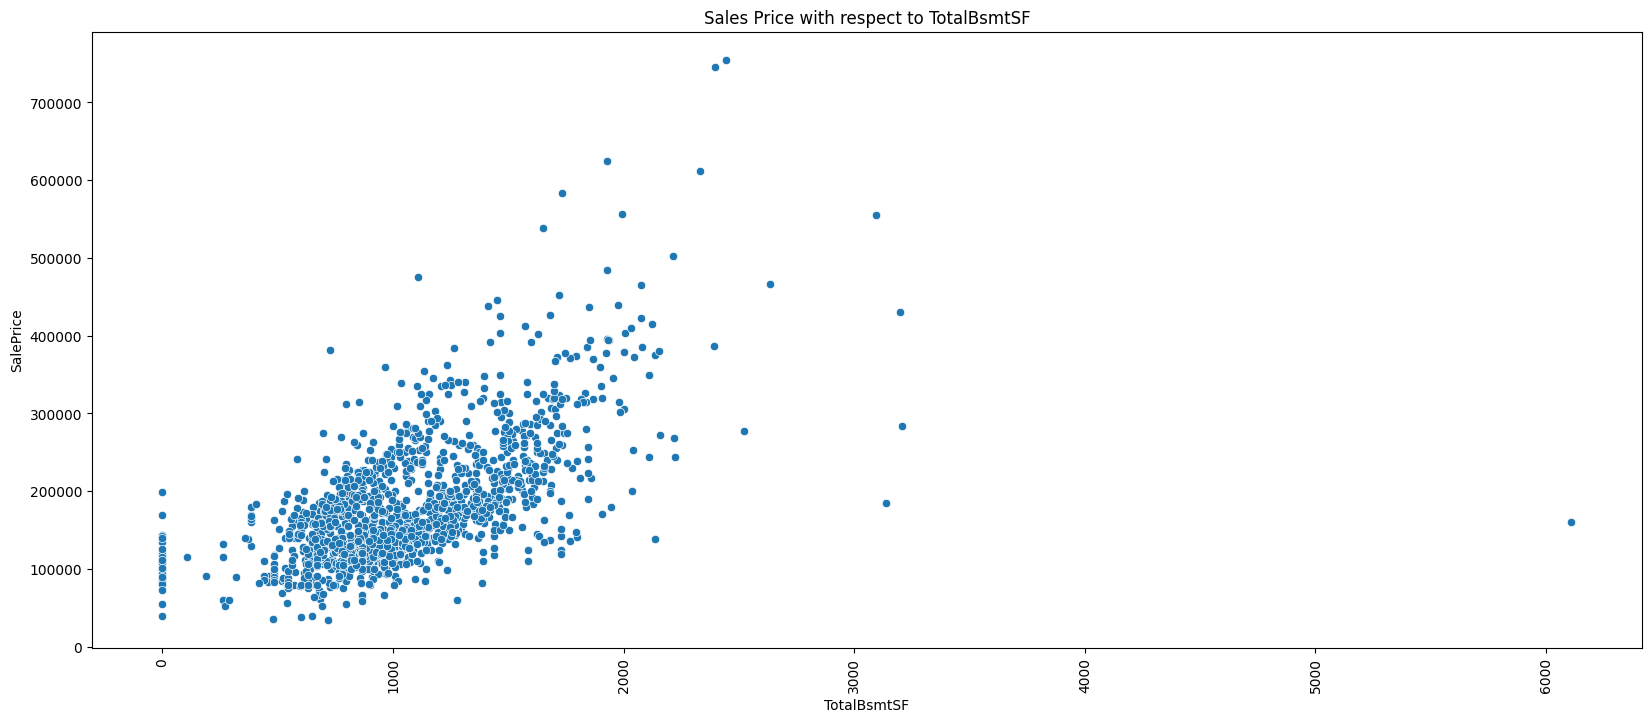

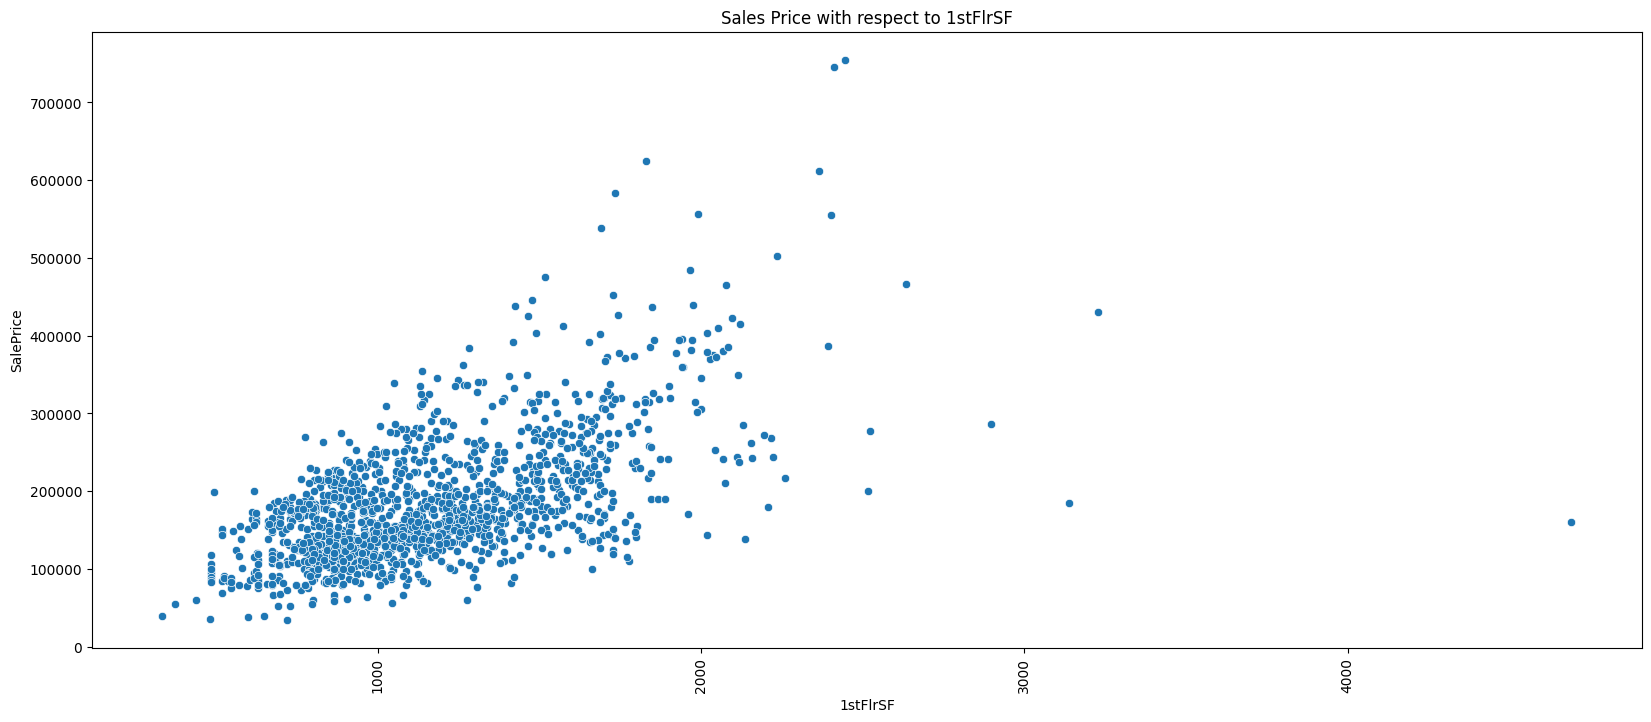

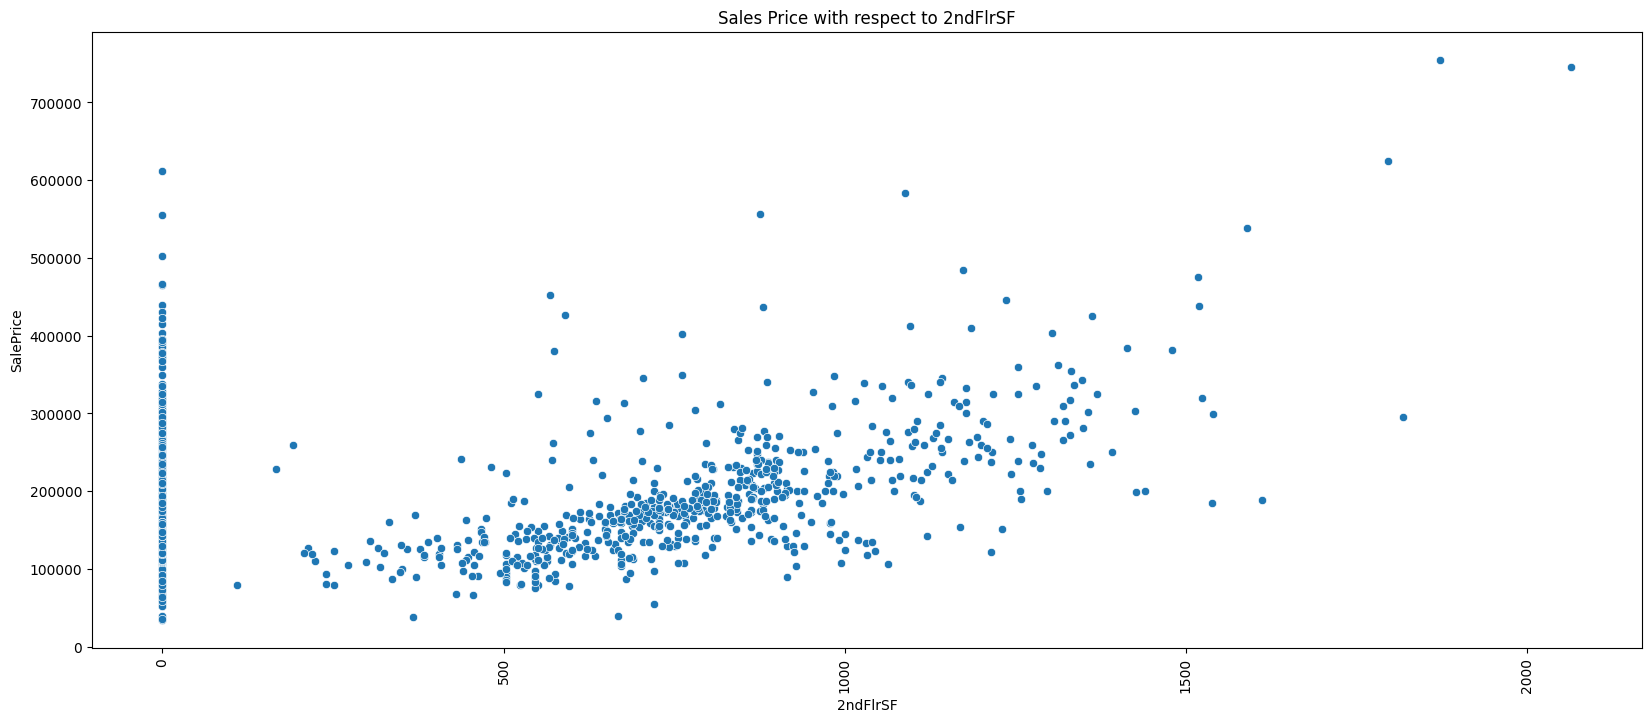

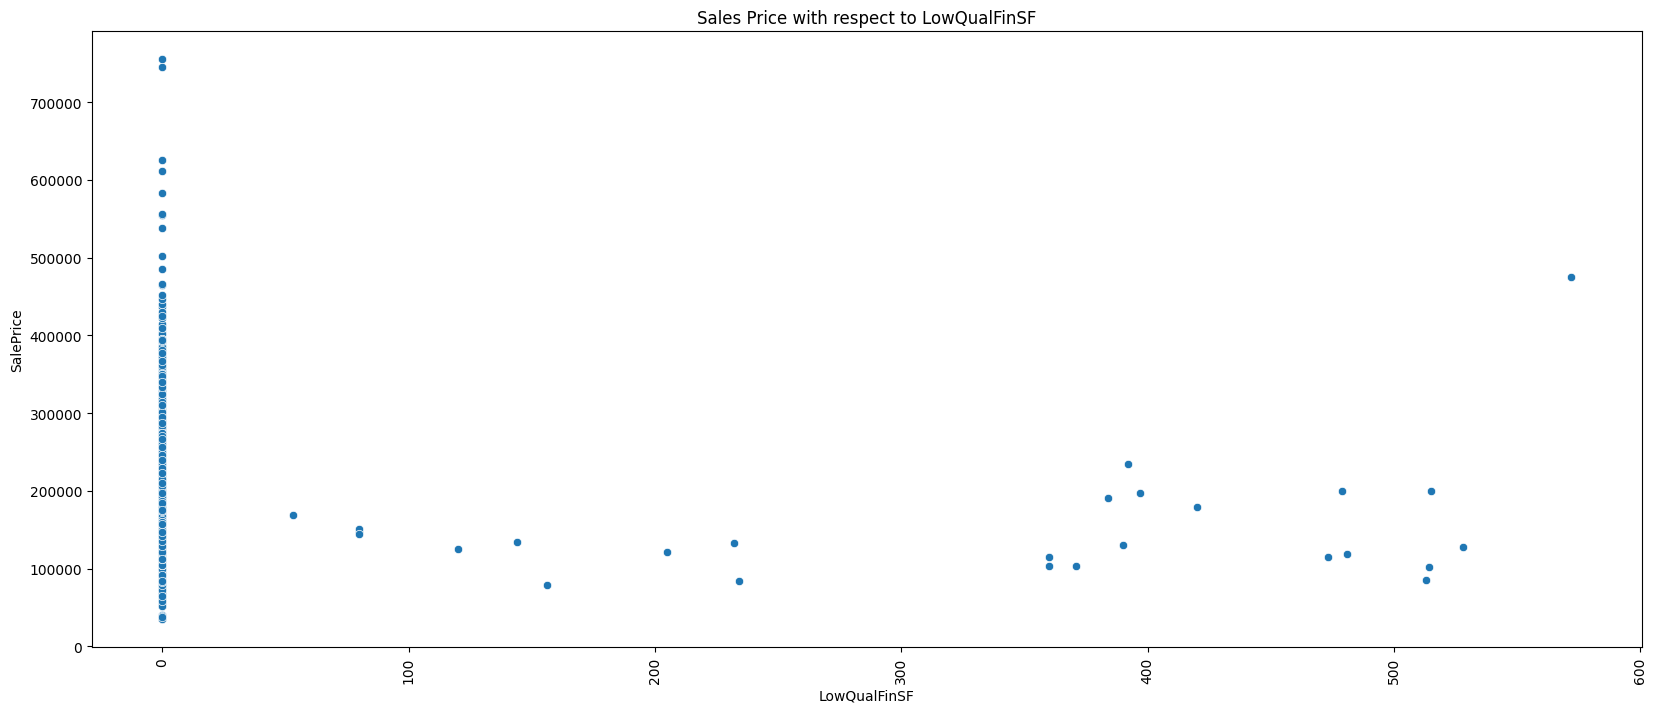

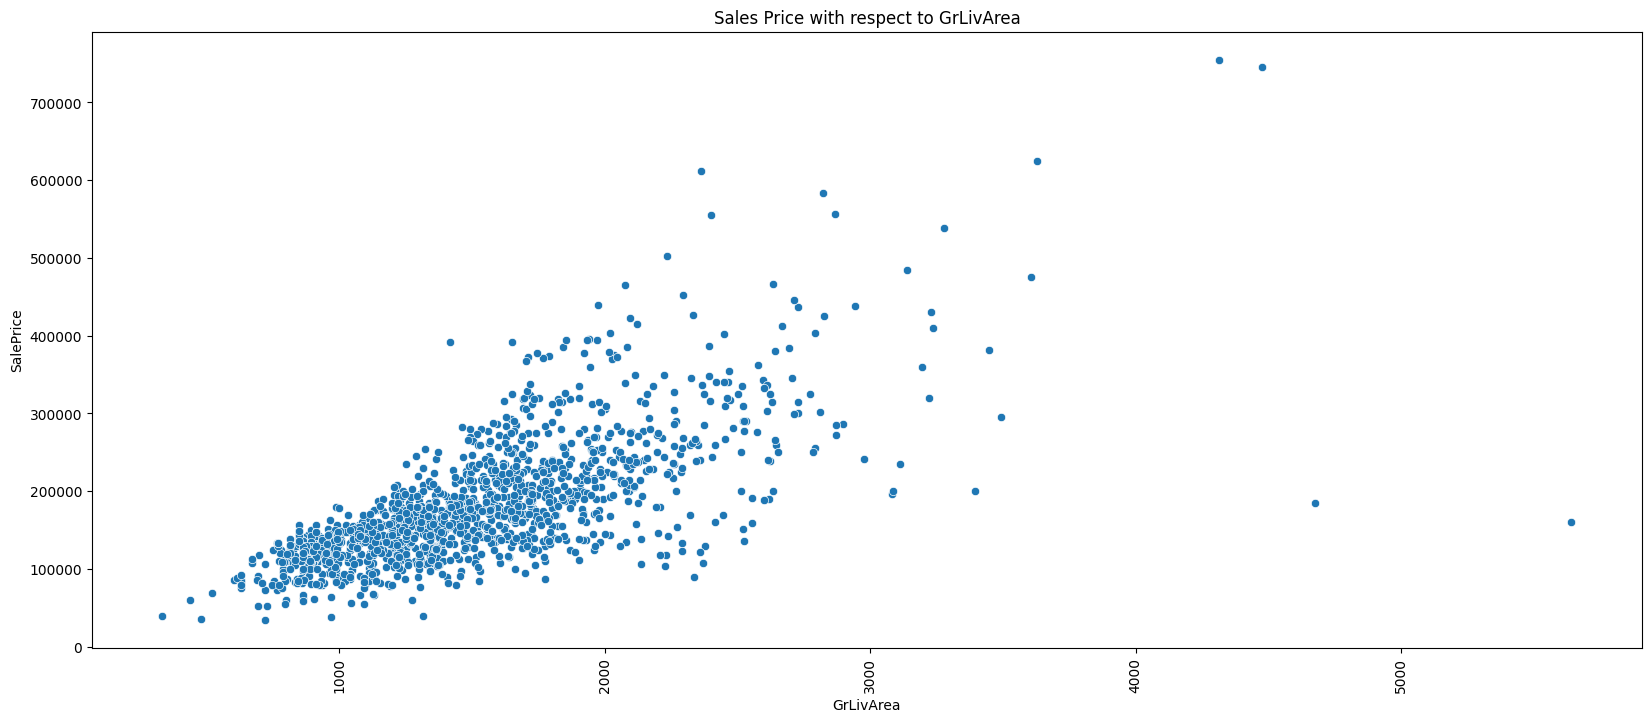

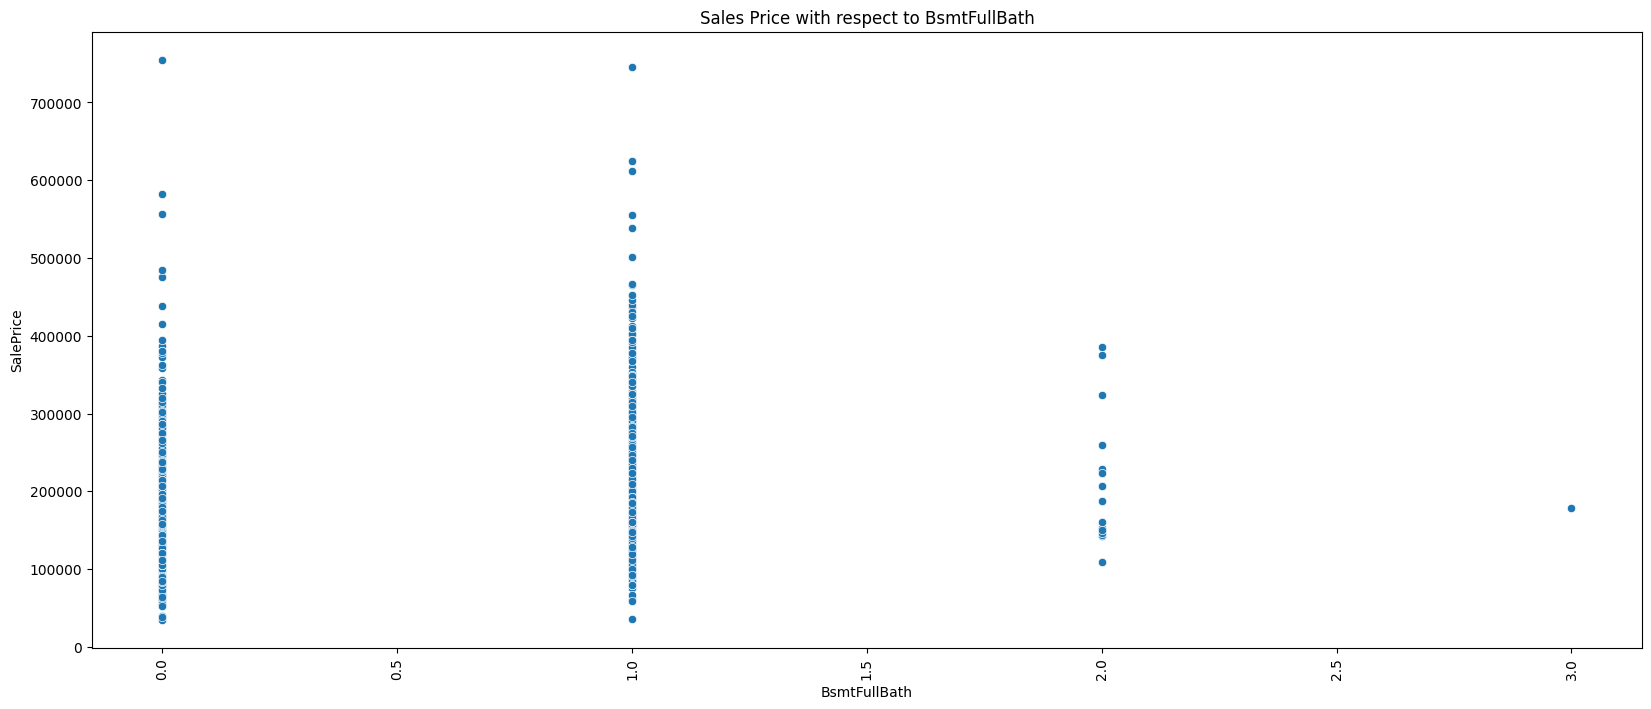

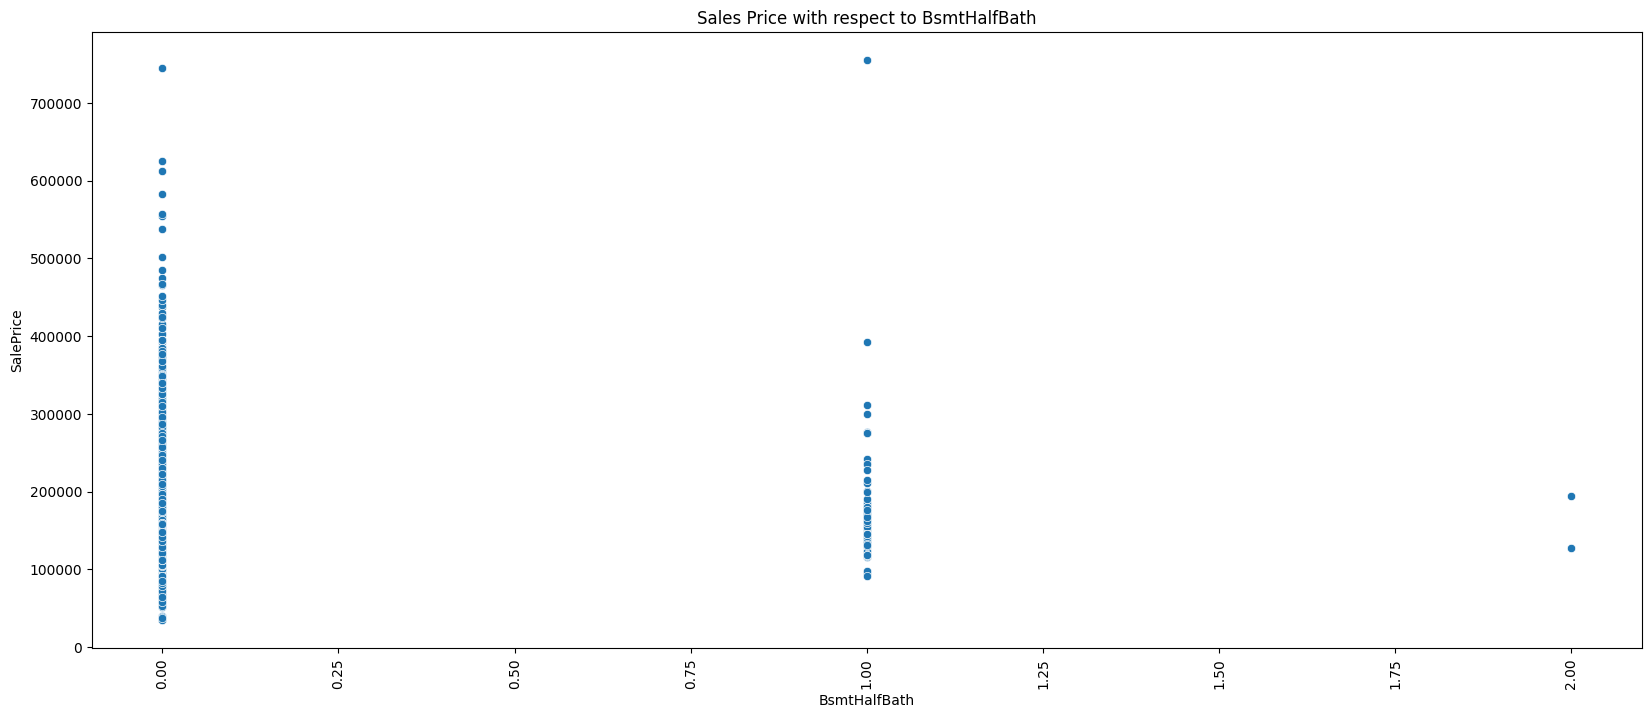

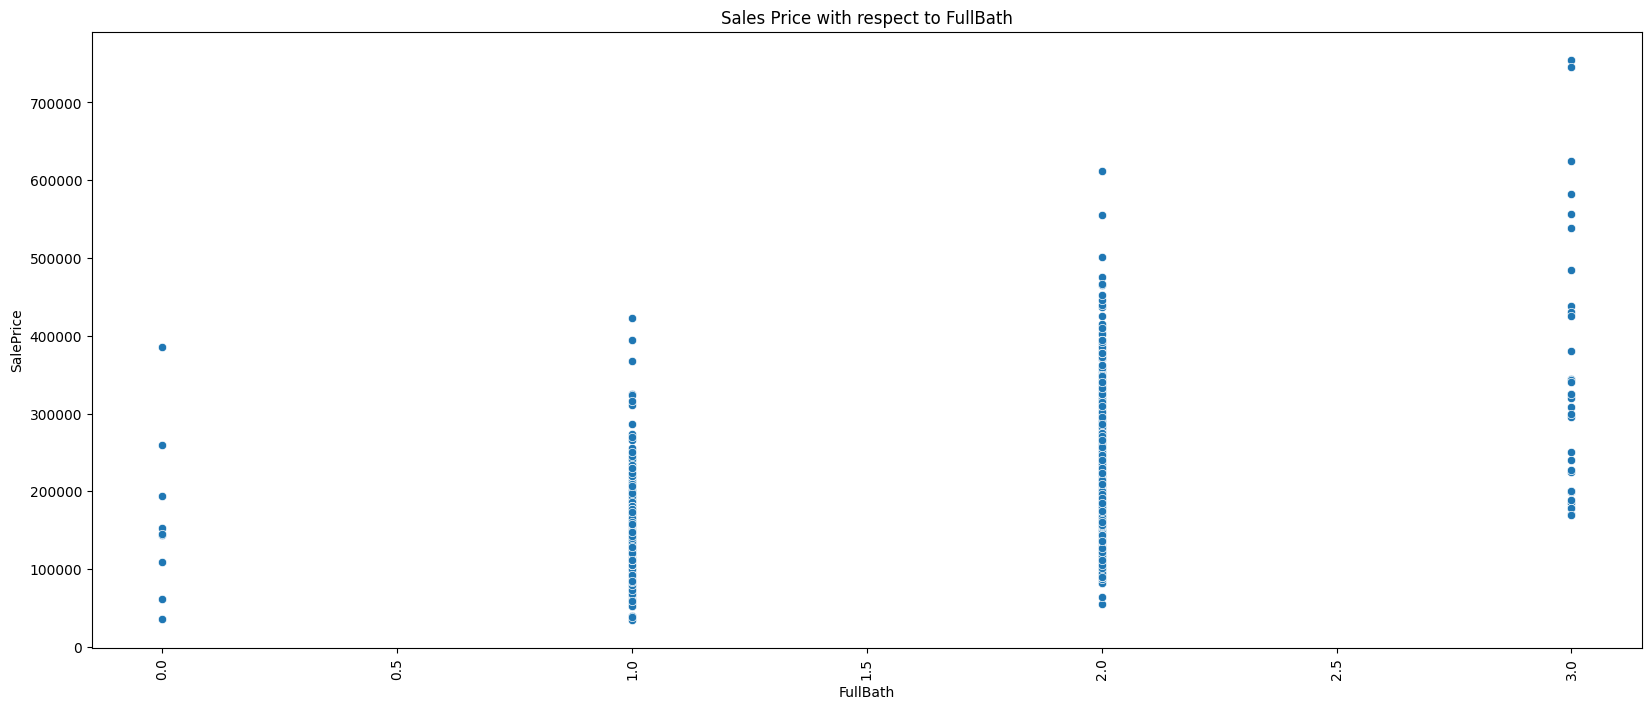

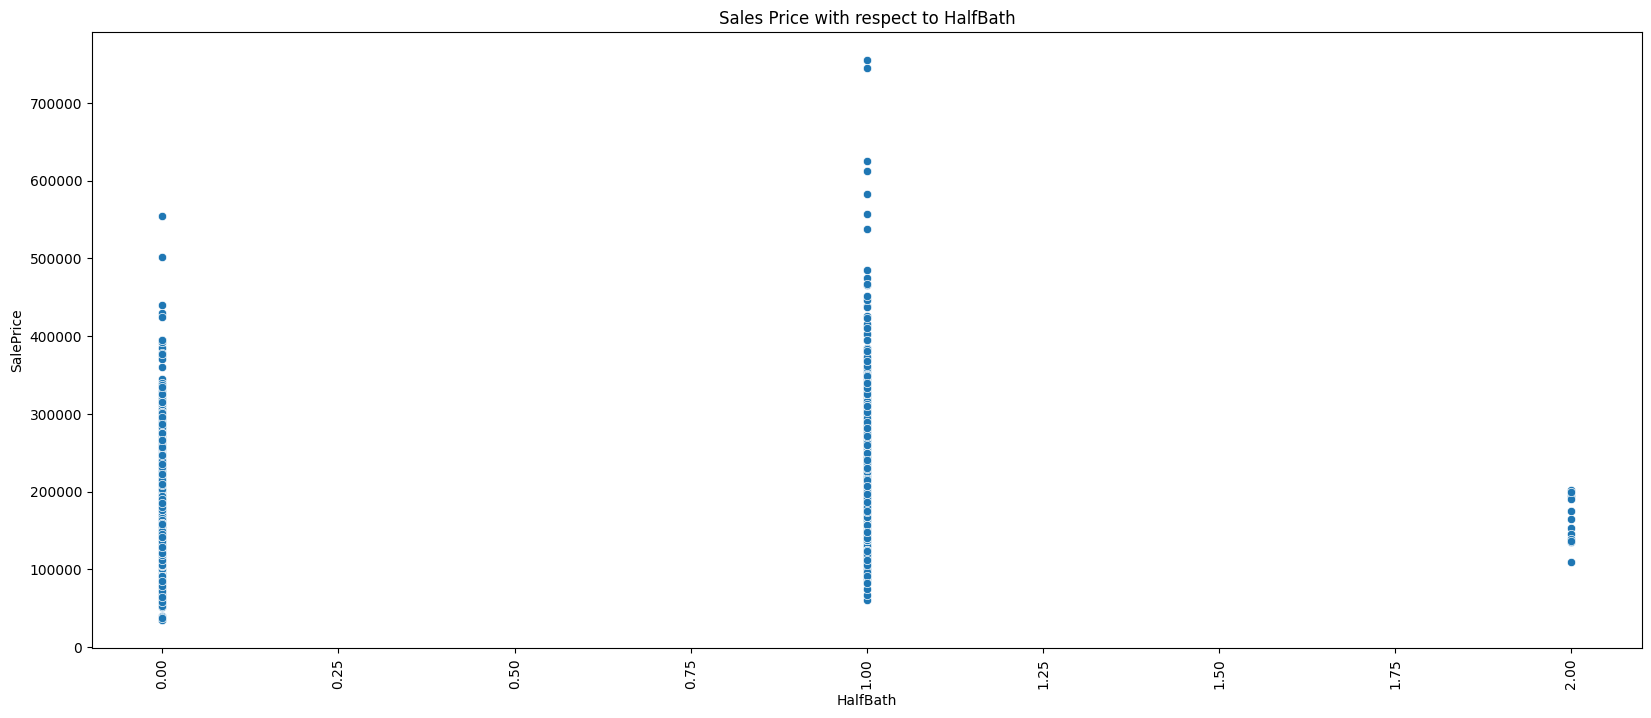

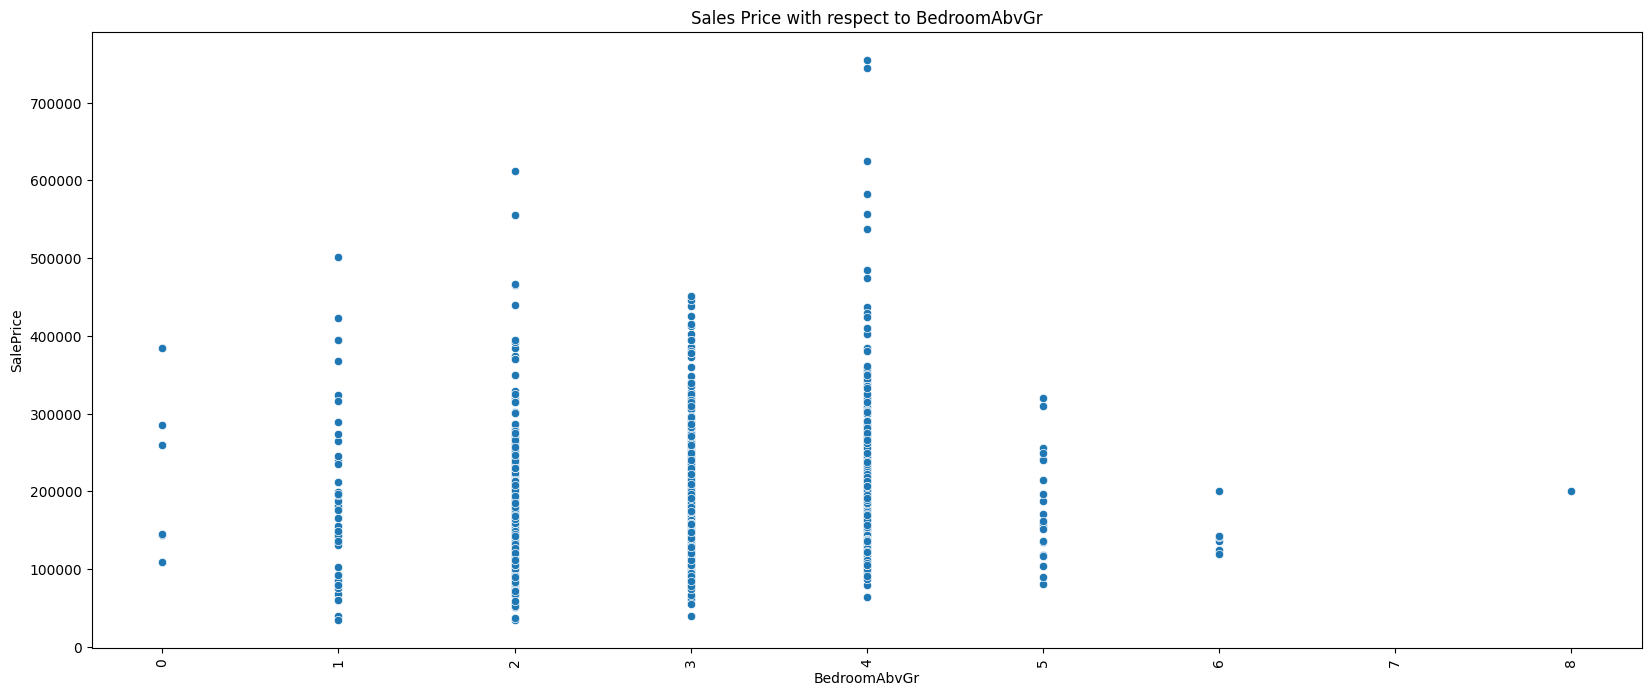

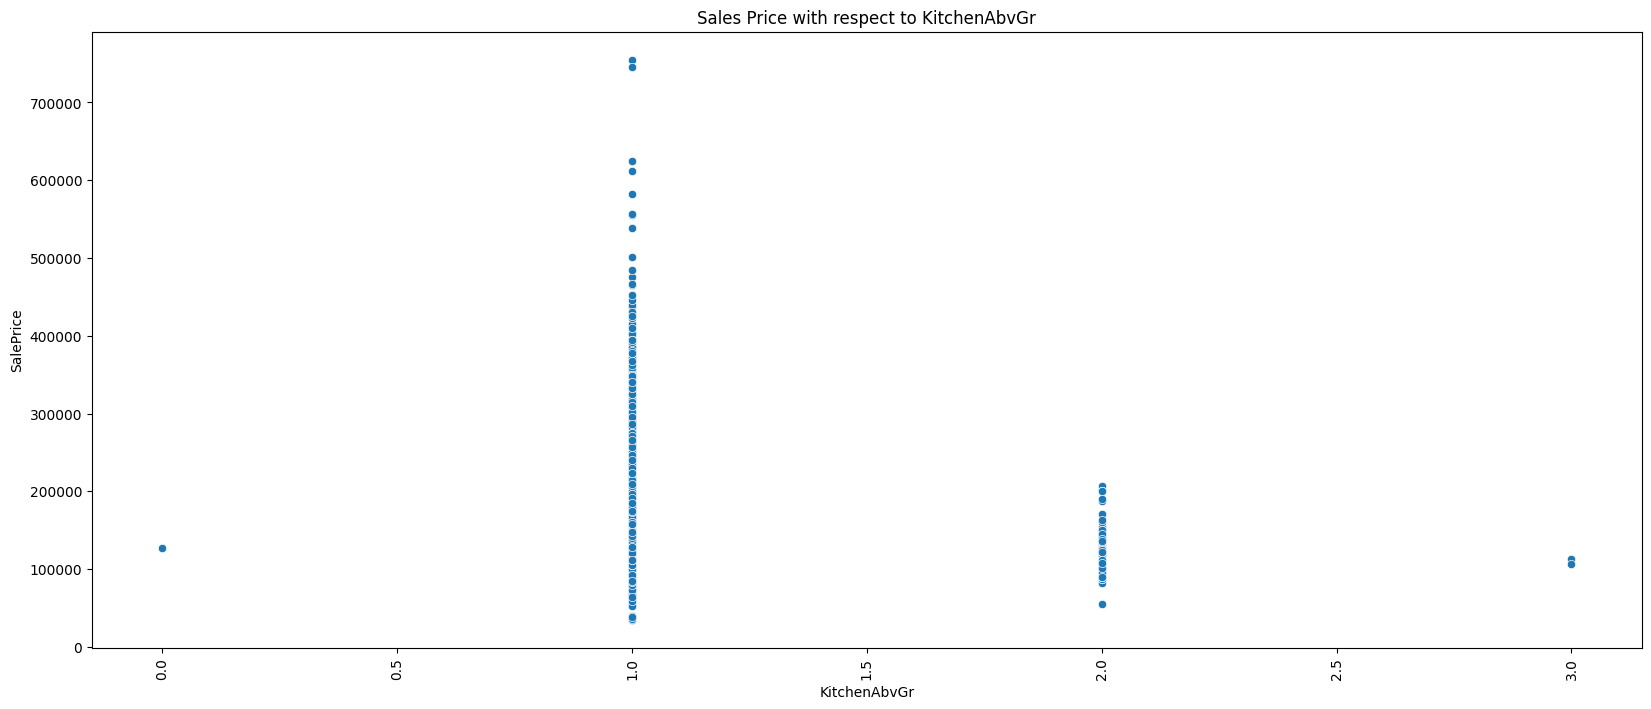

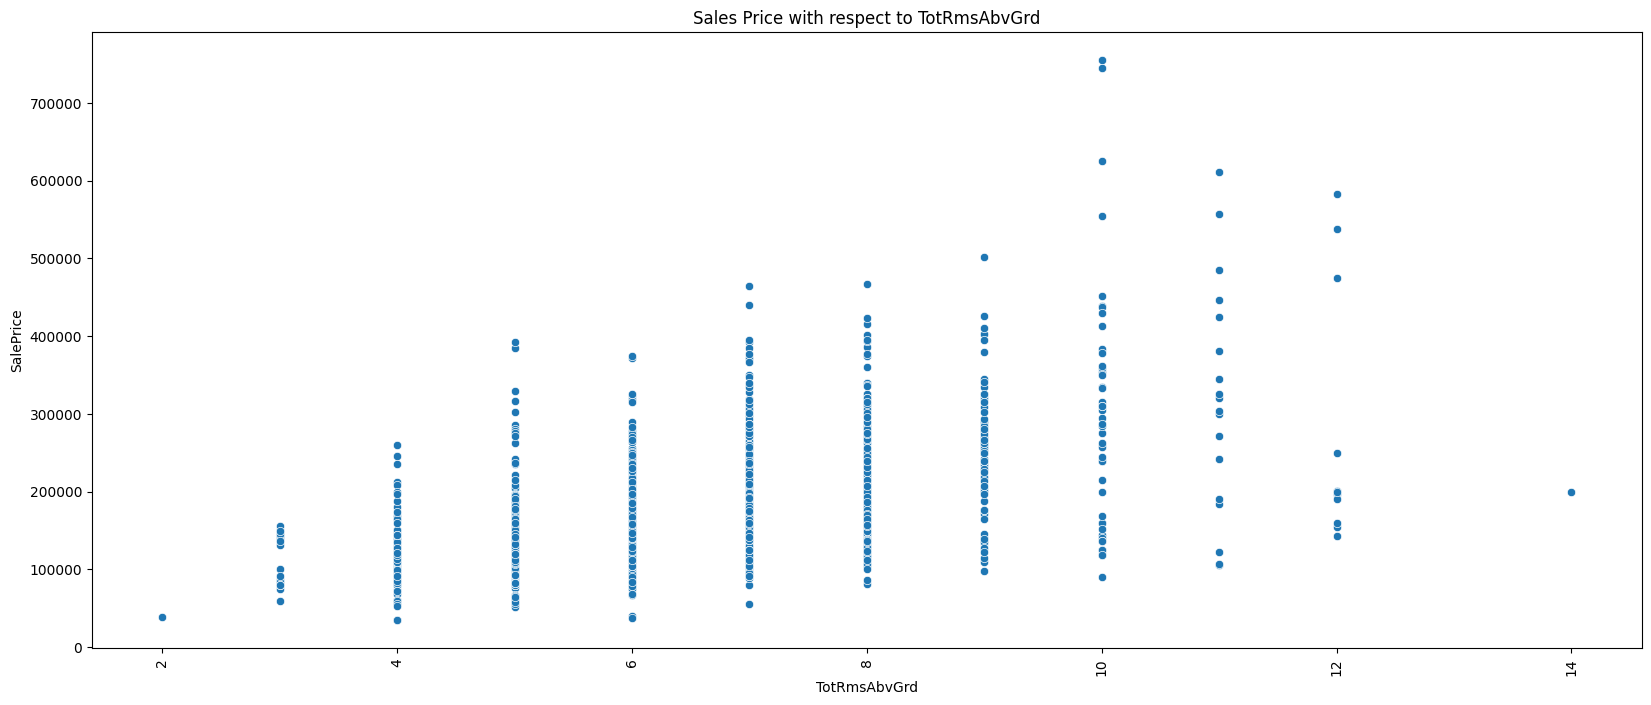

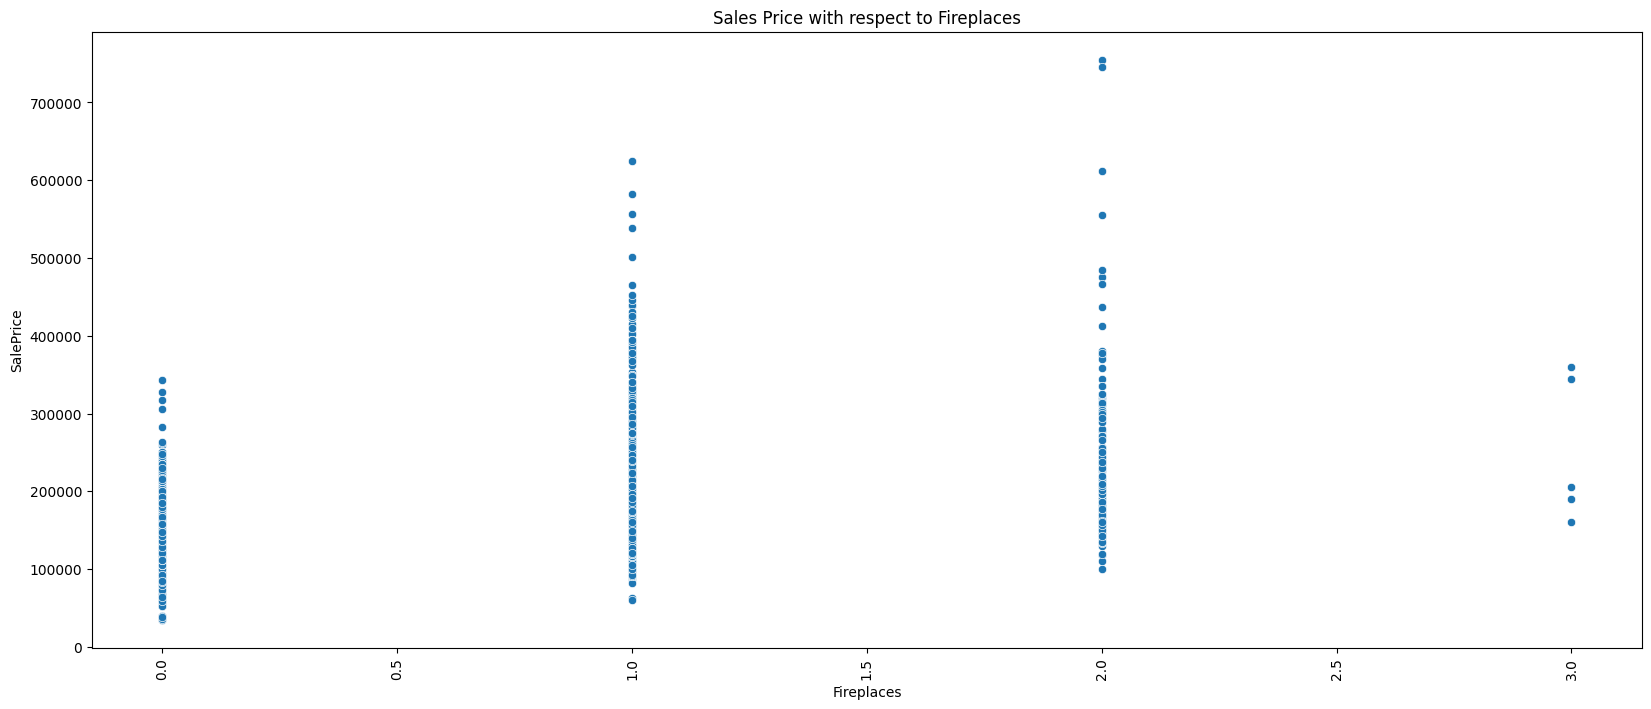

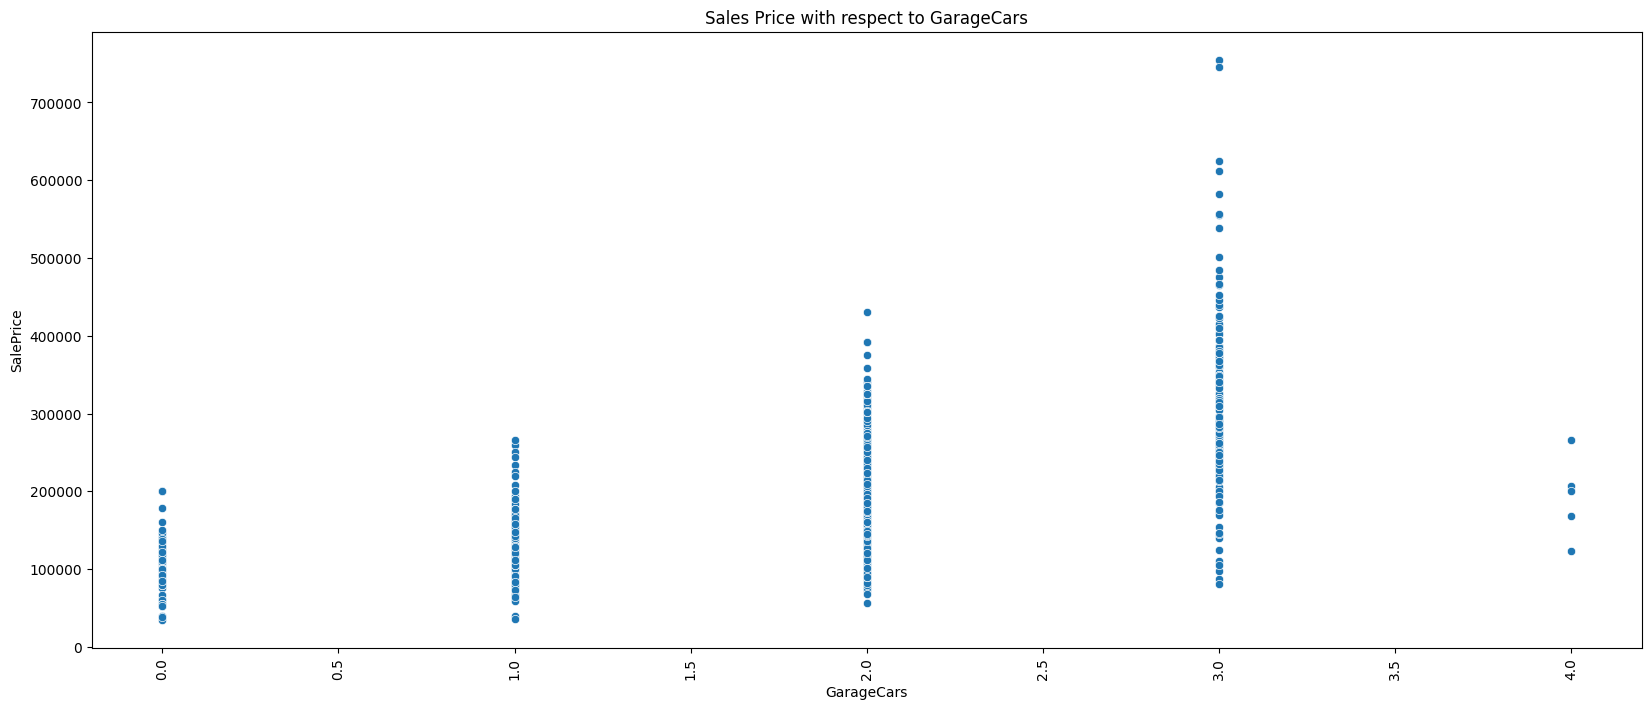

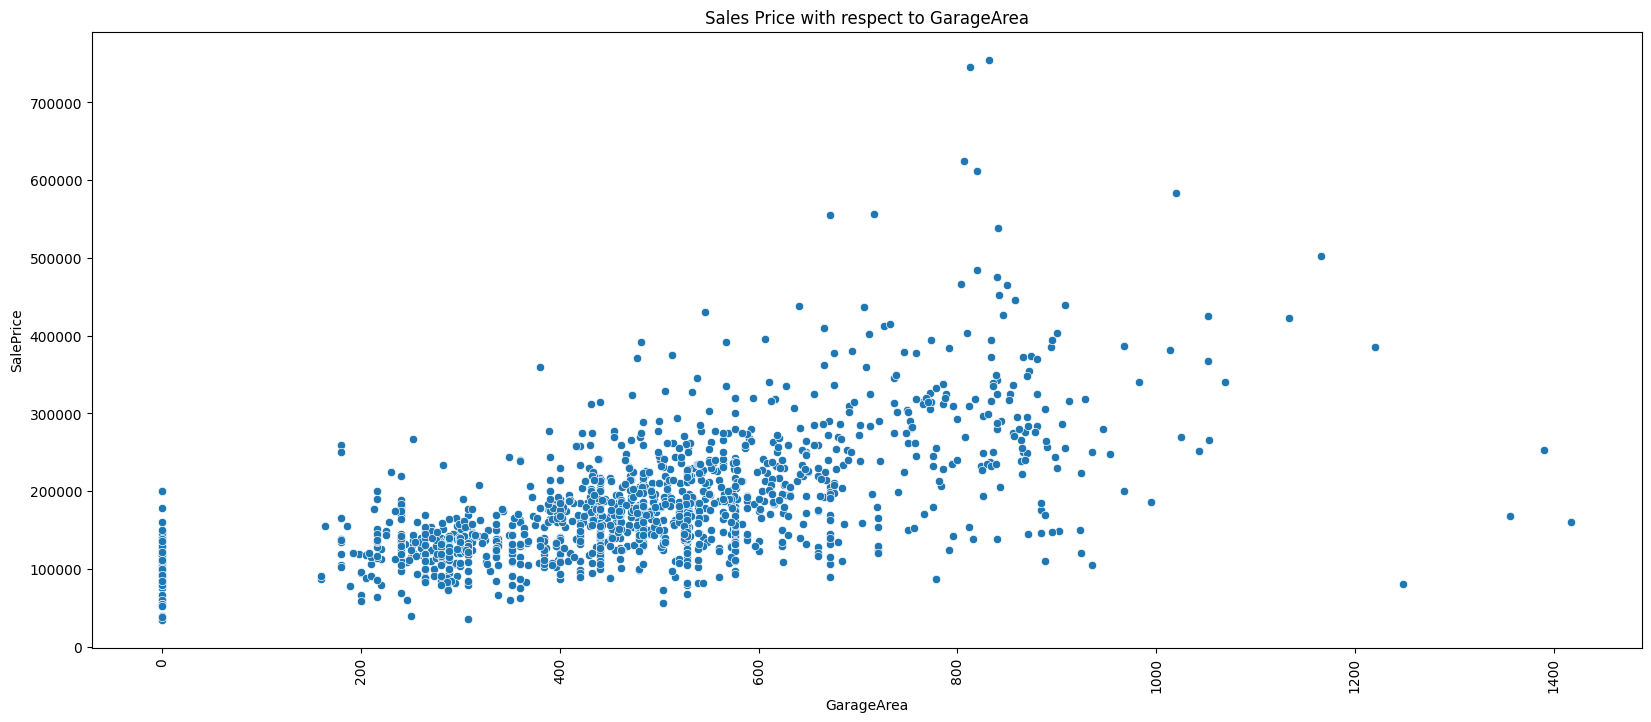

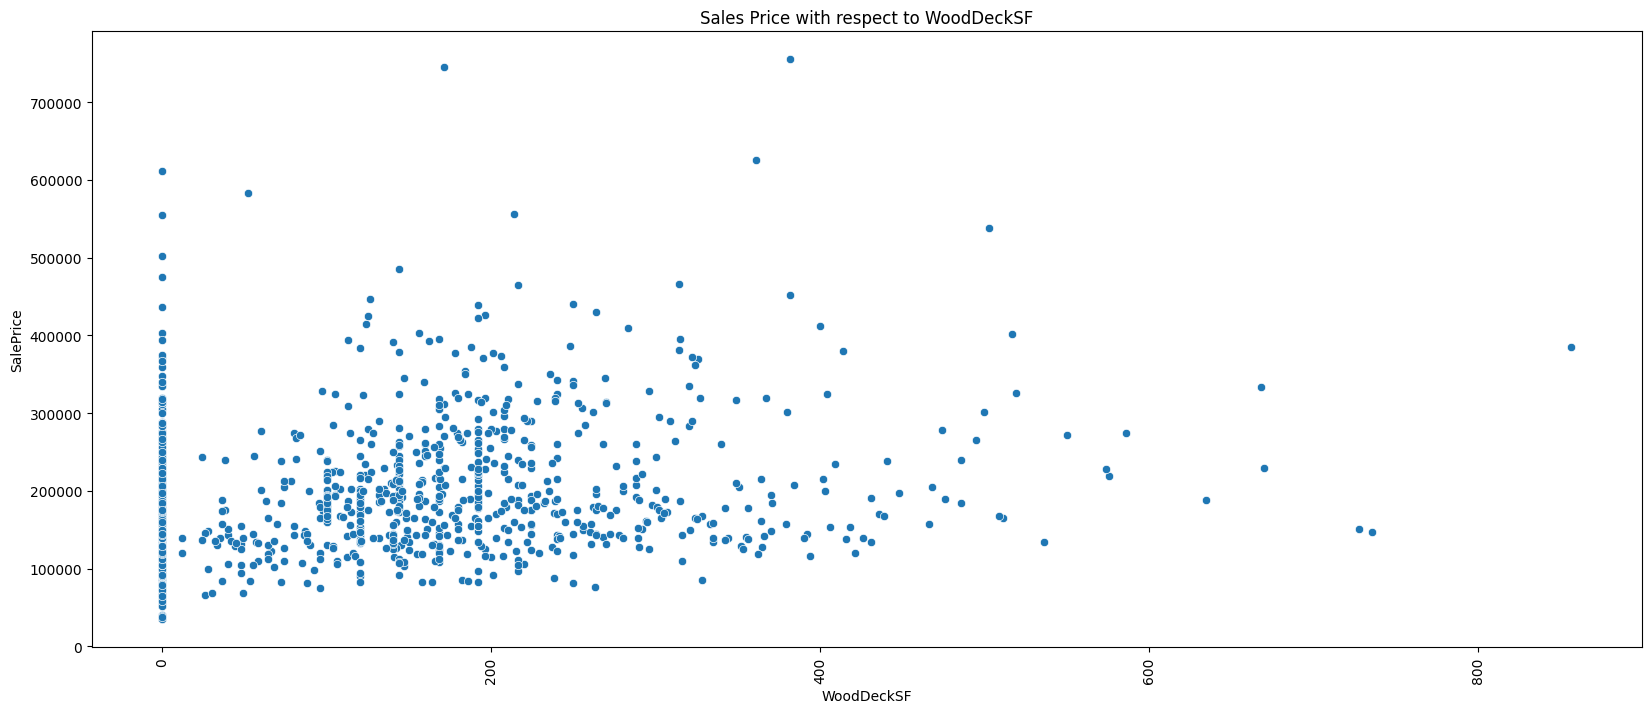

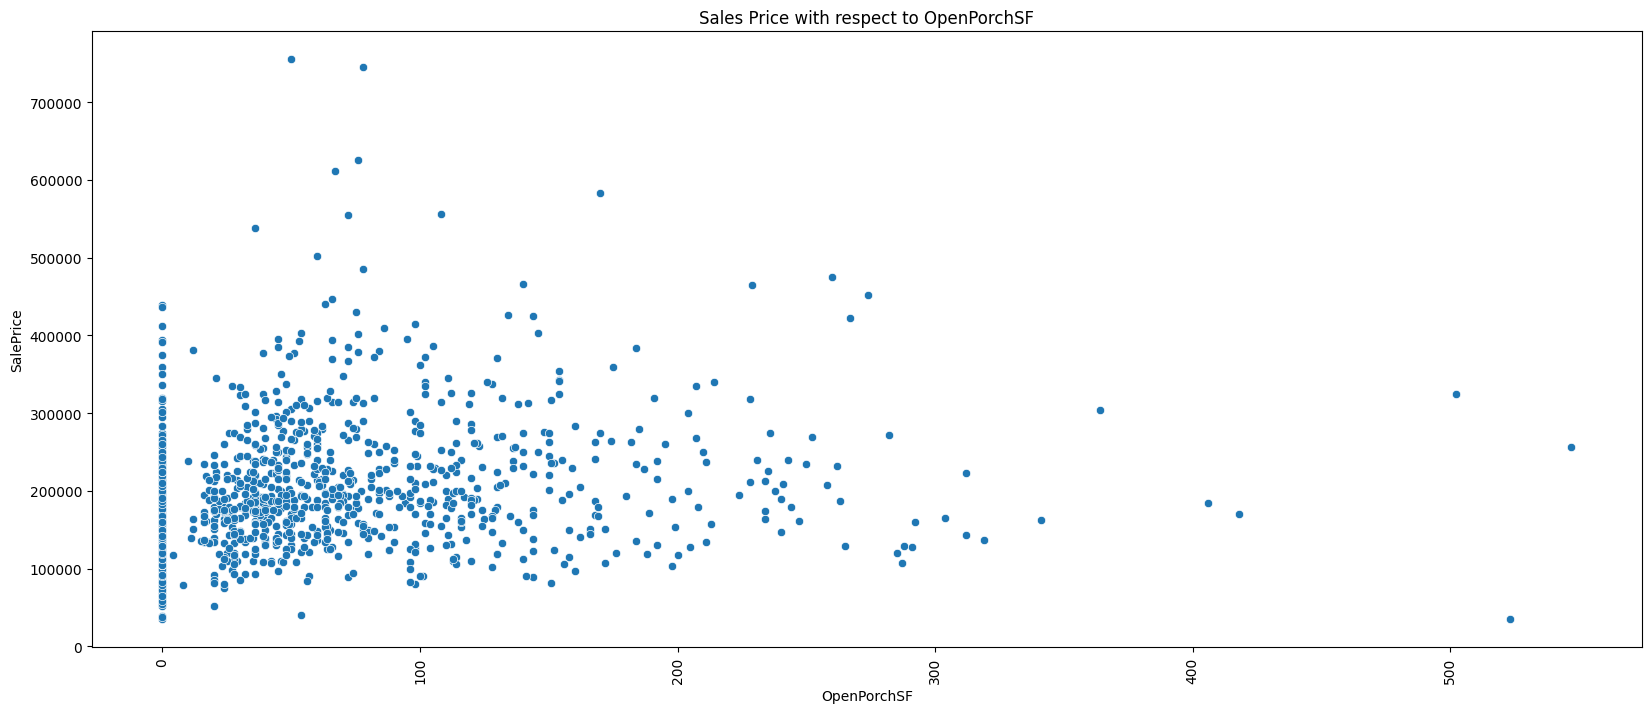

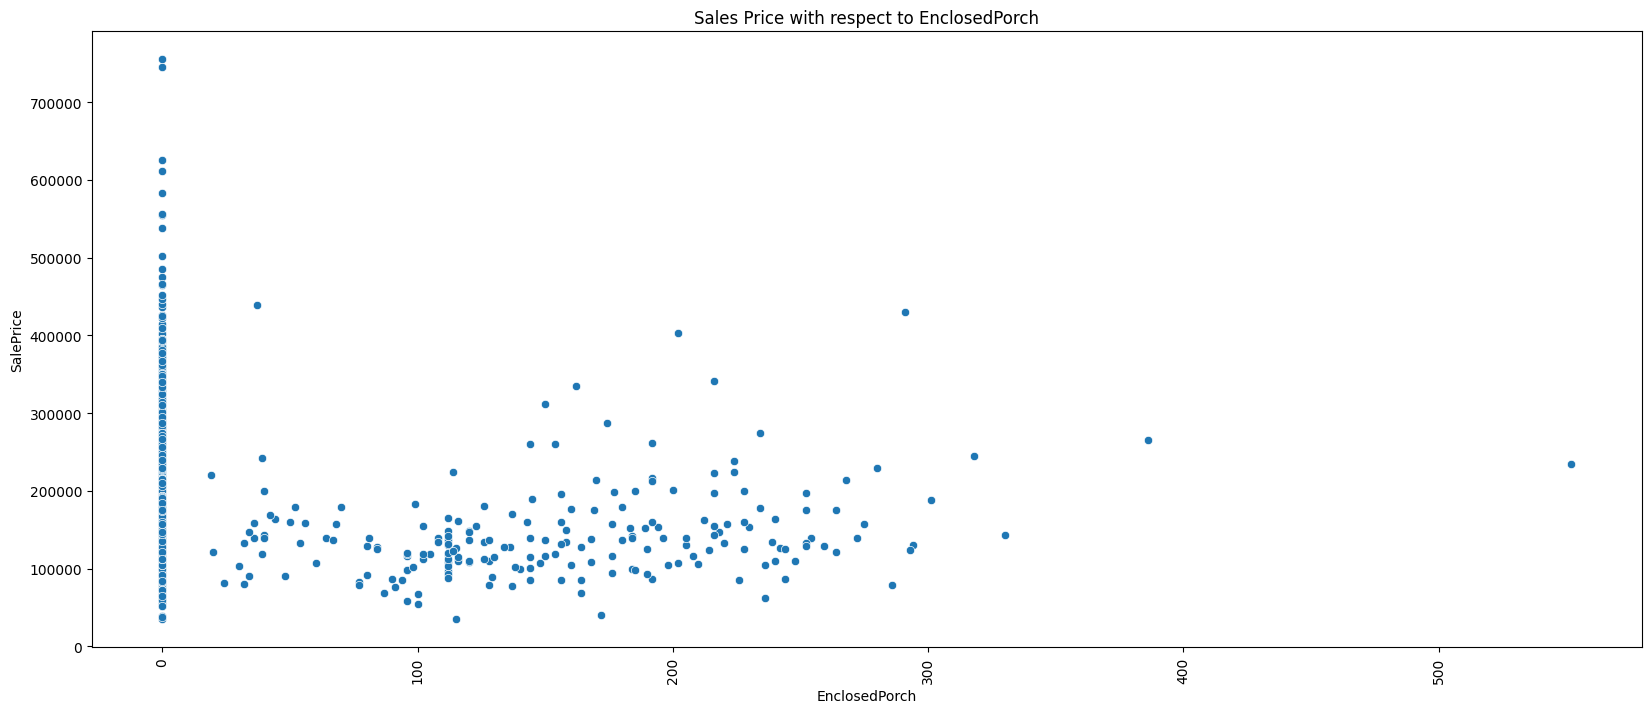

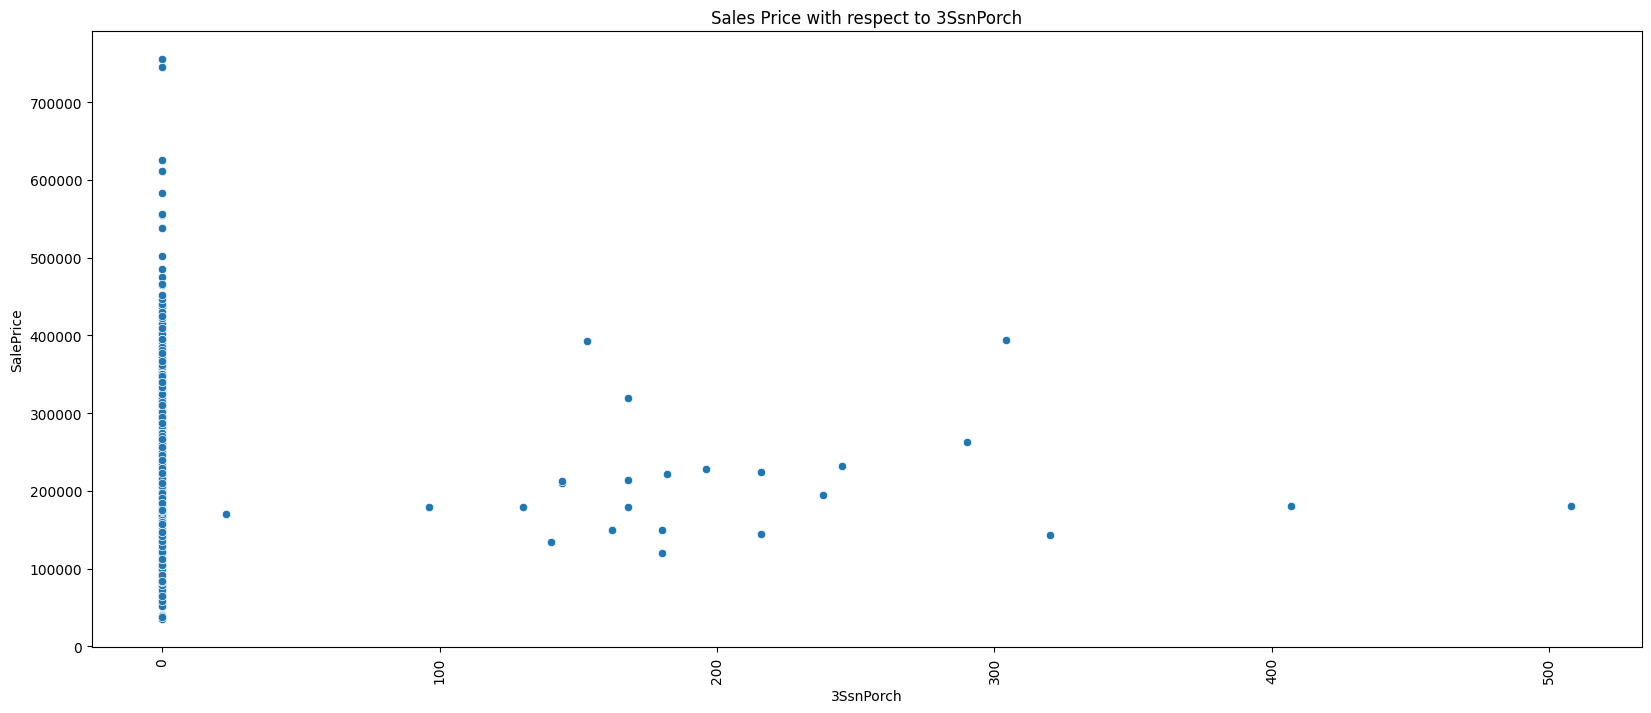

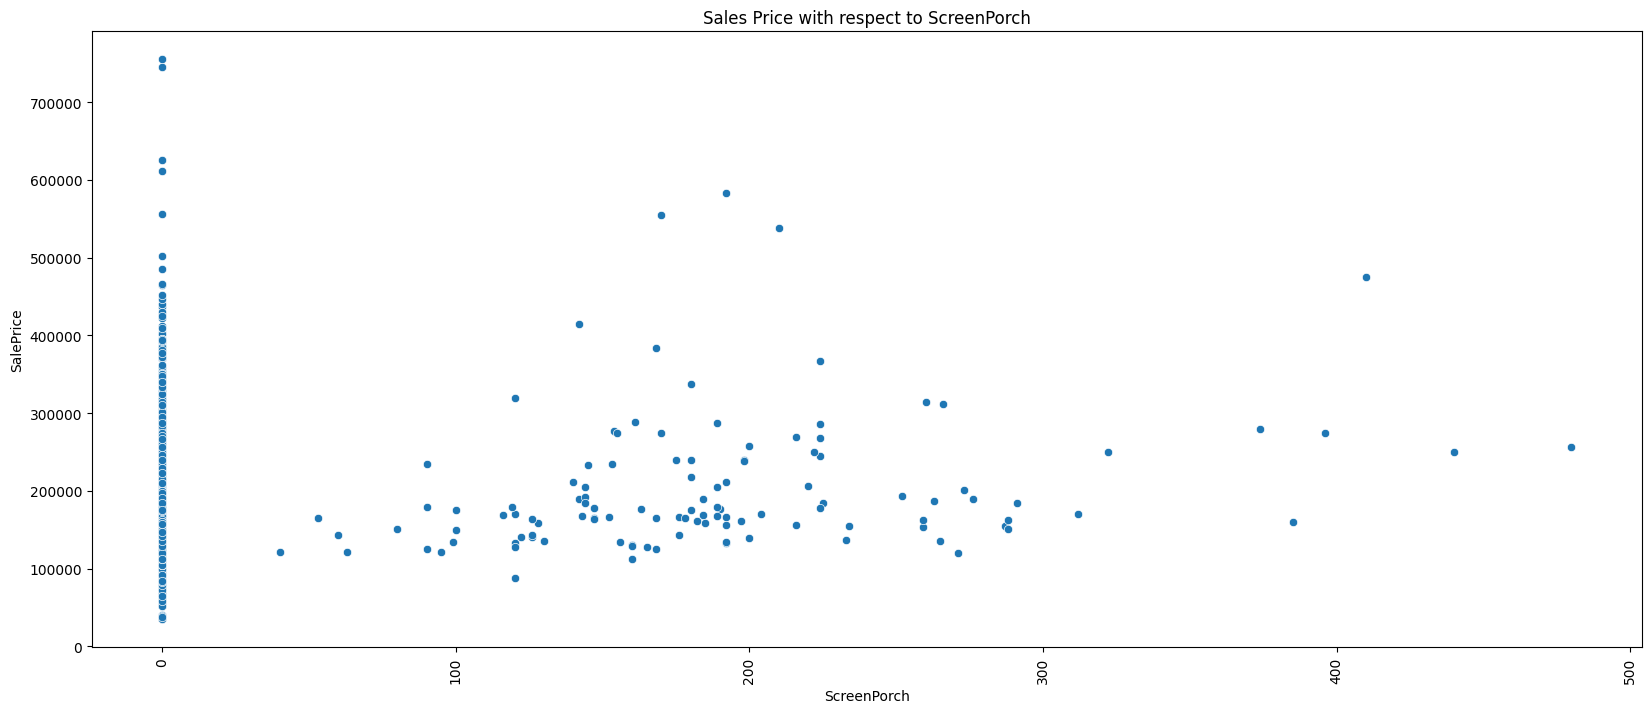

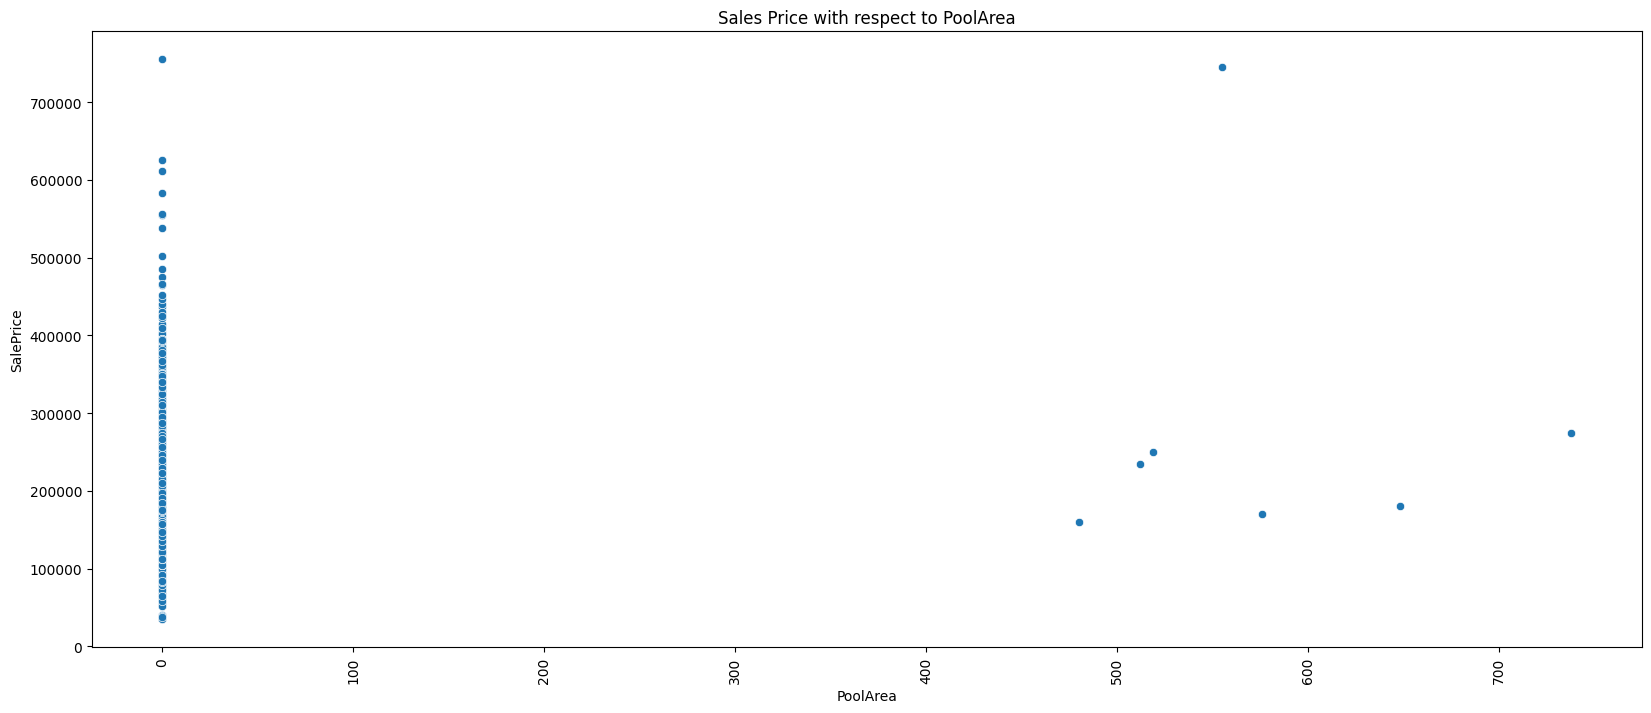

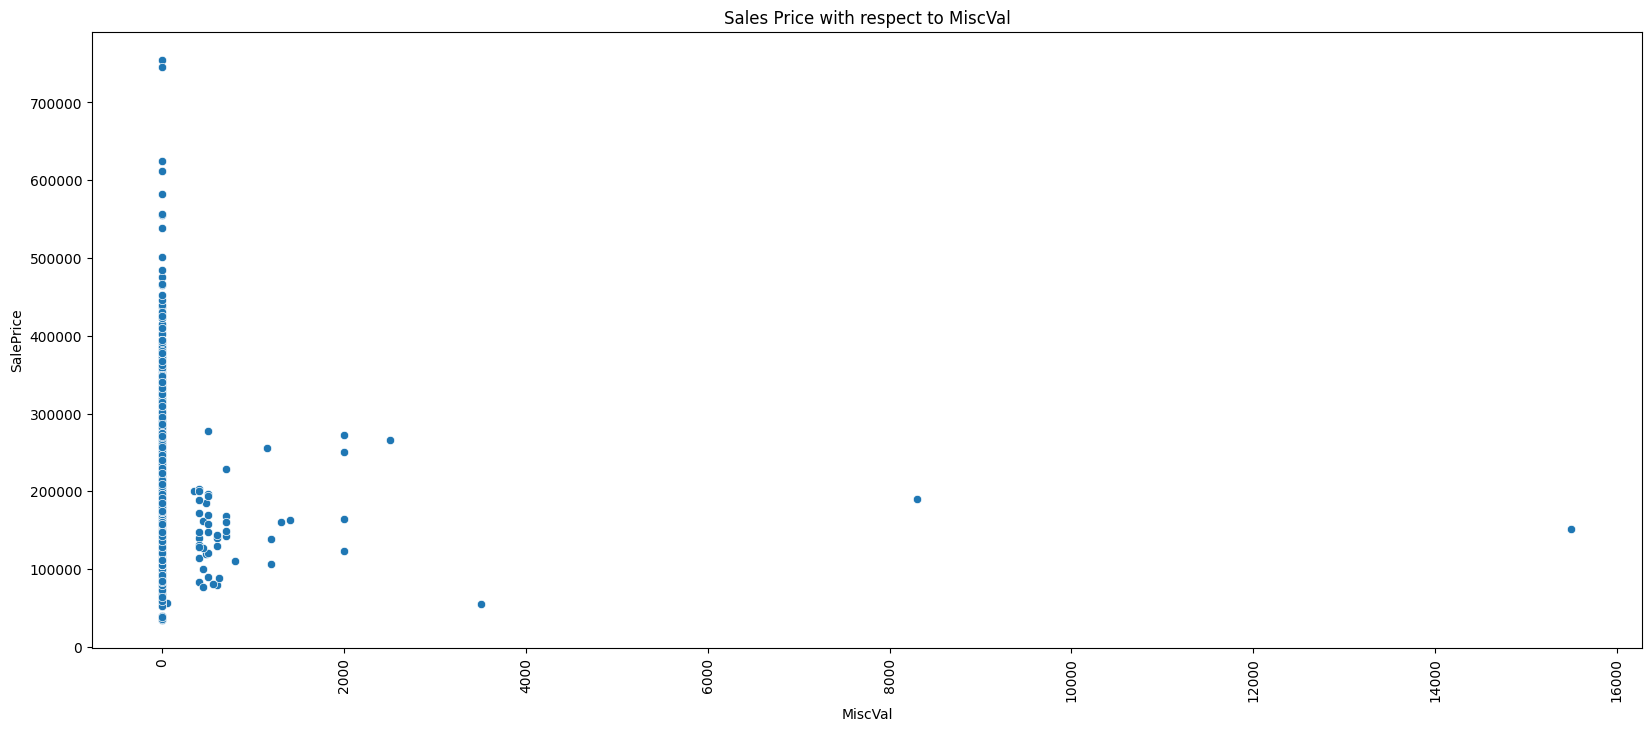

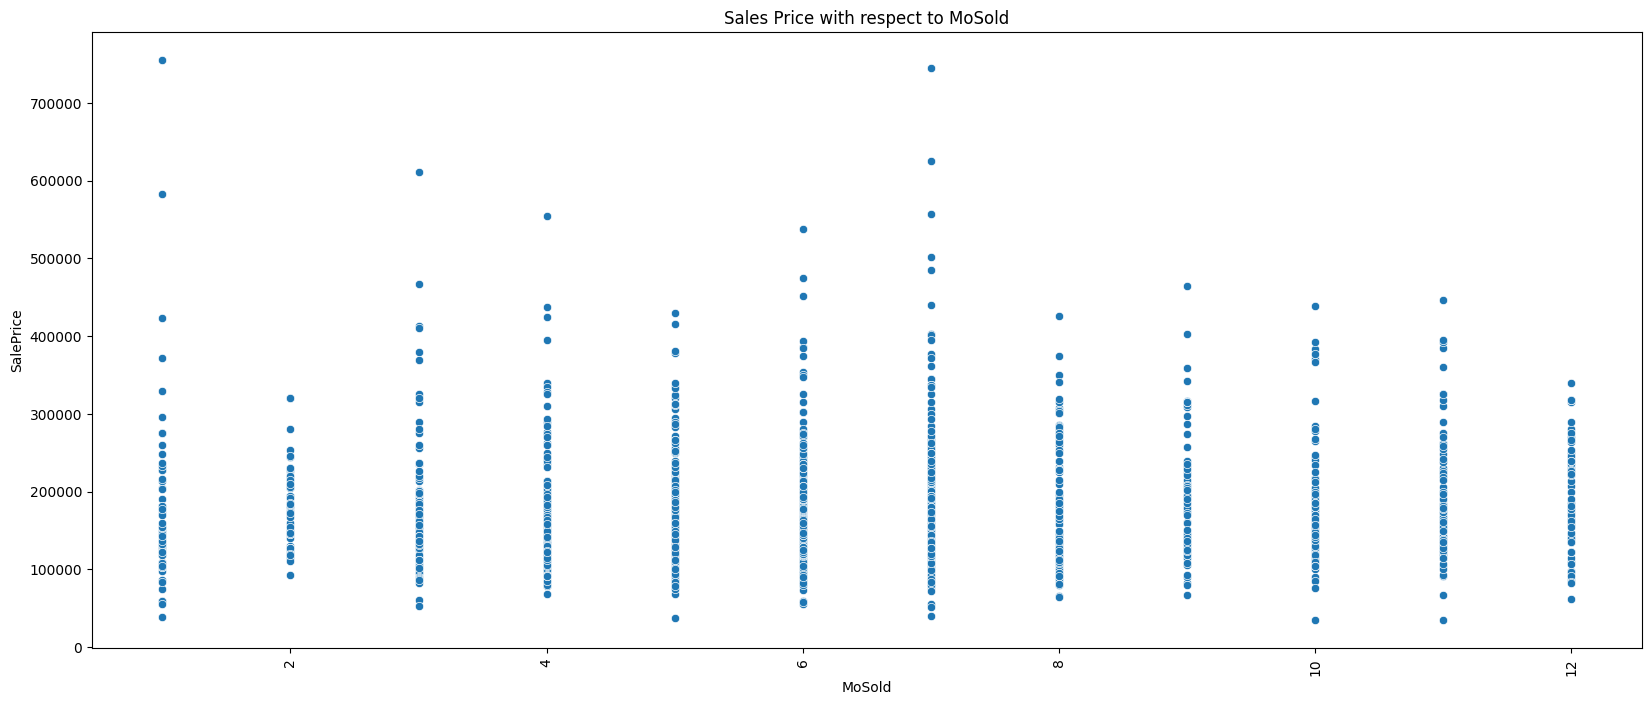

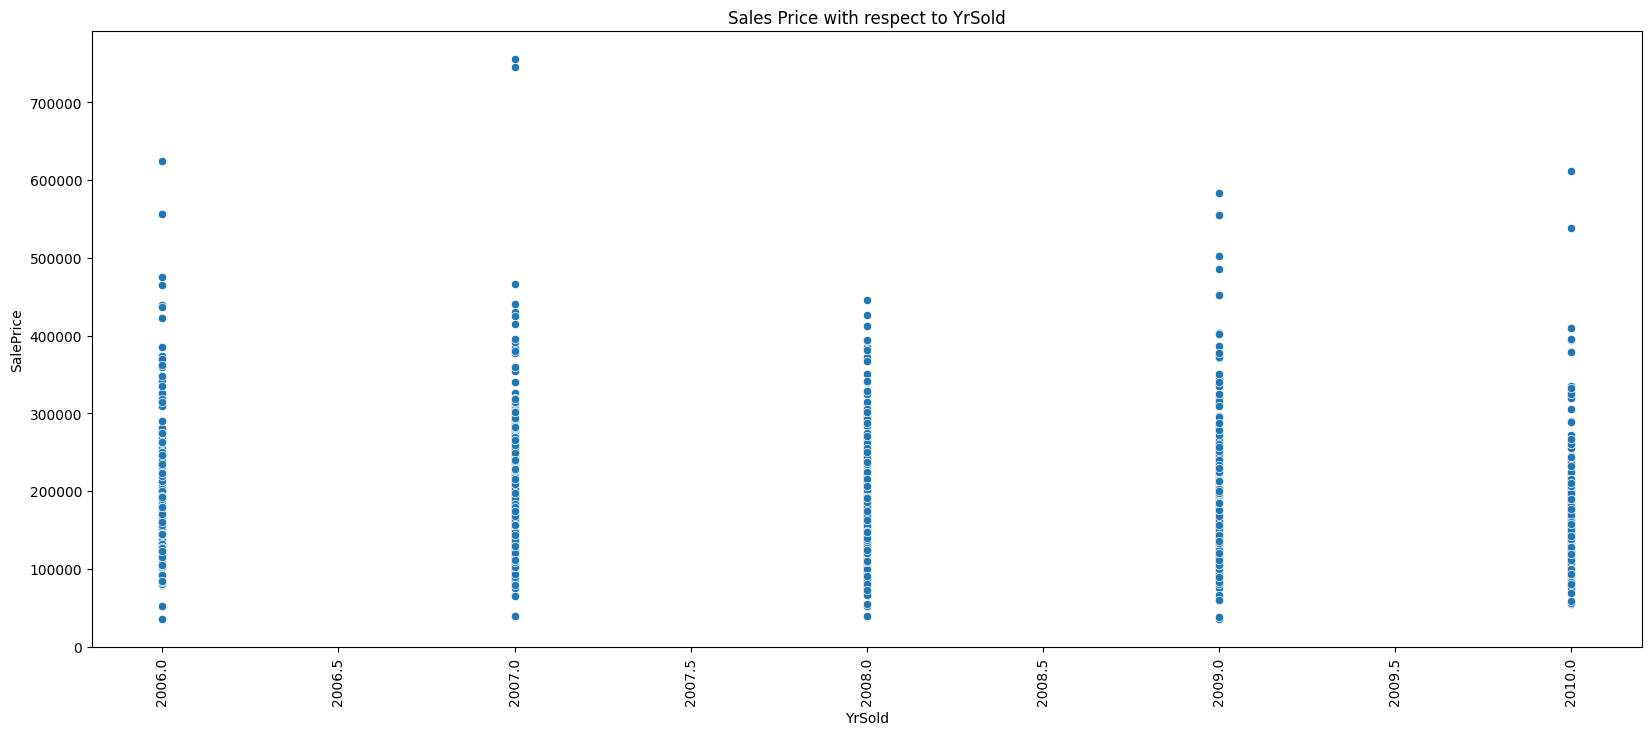

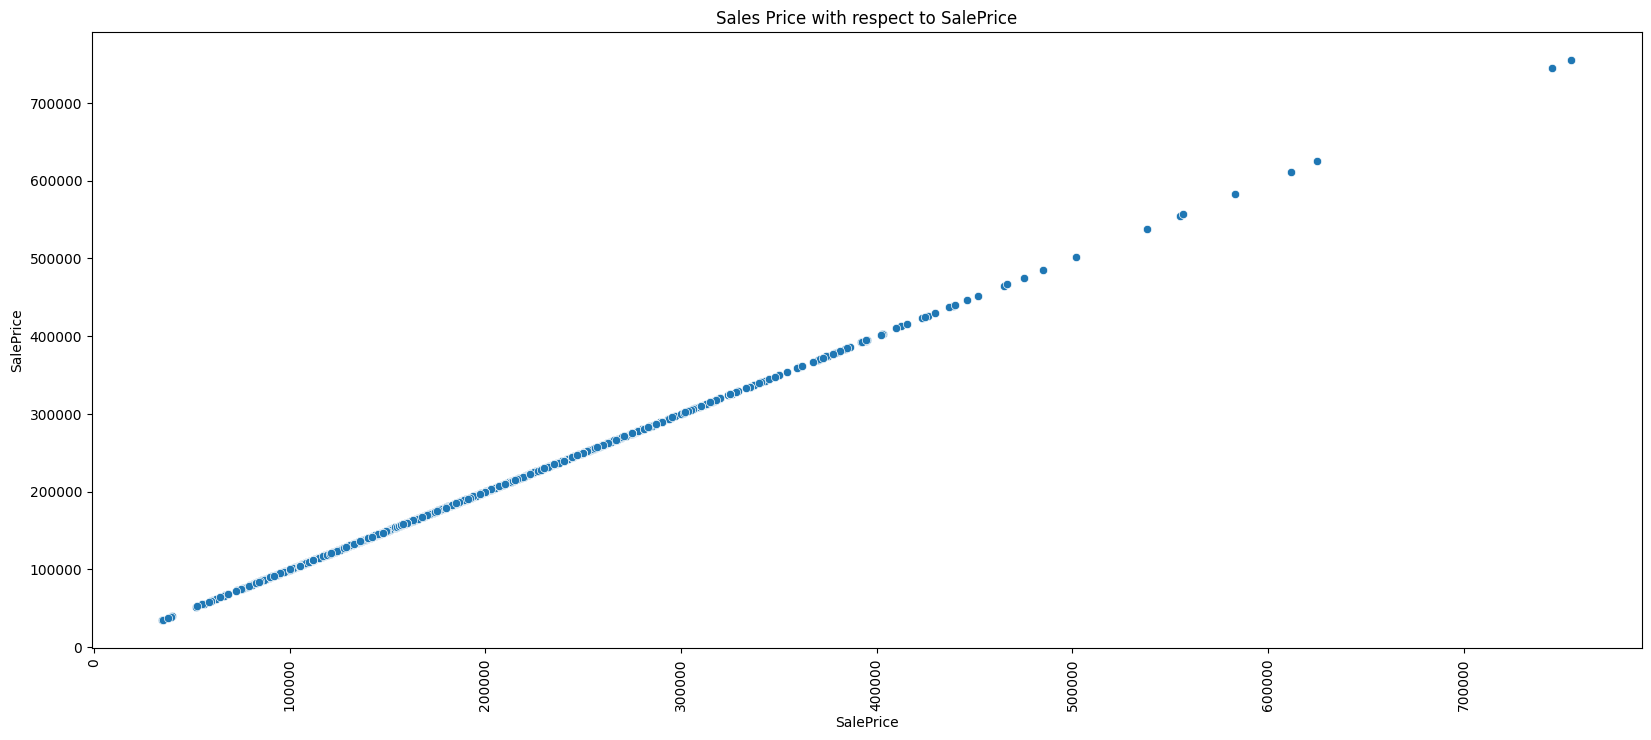

In [22]:
for col in numerical_columns.columns:
   numerical_columns_graph(col)


#### Conclusion
##### - SalePrice has a linear relation with GrLivingArea,1stFlrSF,2ndFlrSF,TotalBSMTSF,YearBuilt,LotArea

### Checking Skewness of the Target Variable

<Axes: xlabel='SalePrice', ylabel='Density'>

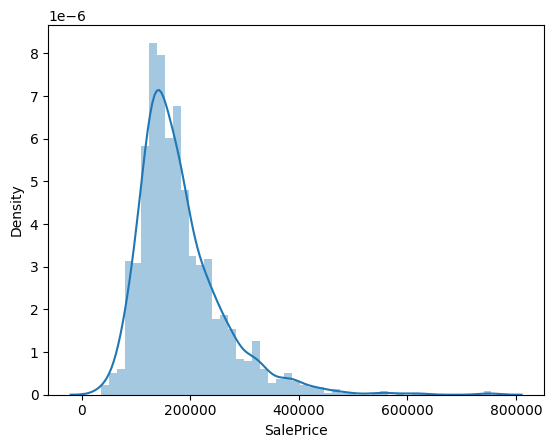

In [23]:
seaborn.distplot(housing_raw_df['SalePrice'])

### Target Variable is right Skewed so we apply log transformation to it to make it normal

In [24]:
housing_raw_df['SalePrice']=numpy.log1p(housing_raw_df['SalePrice'])

### After Log Transformation the Graph is normally distributed

<Axes: xlabel='SalePrice', ylabel='Density'>

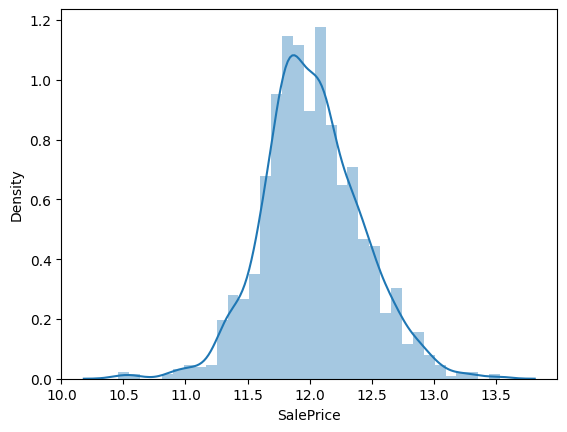

In [25]:
seaborn.distplot(housing_raw_df['SalePrice'])

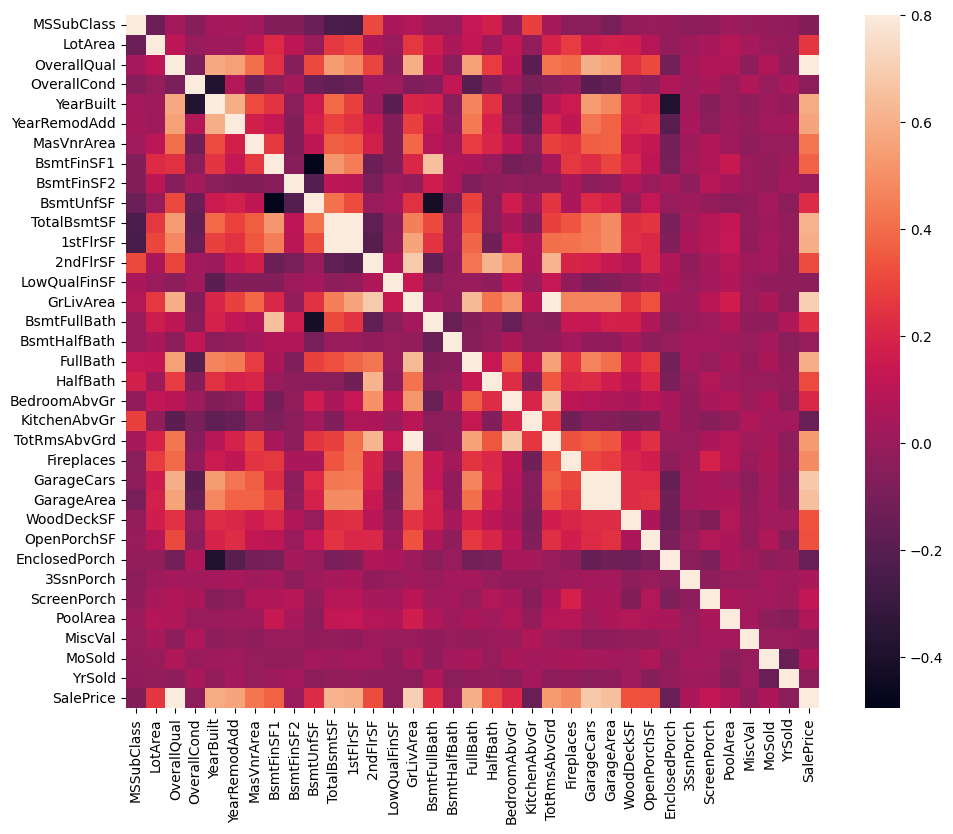

In [26]:
corrmat = housing_raw_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
seaborn.heatmap(corrmat, vmax=.8, square=True);

### Getting top 10 most Correlated Features with Sale Price

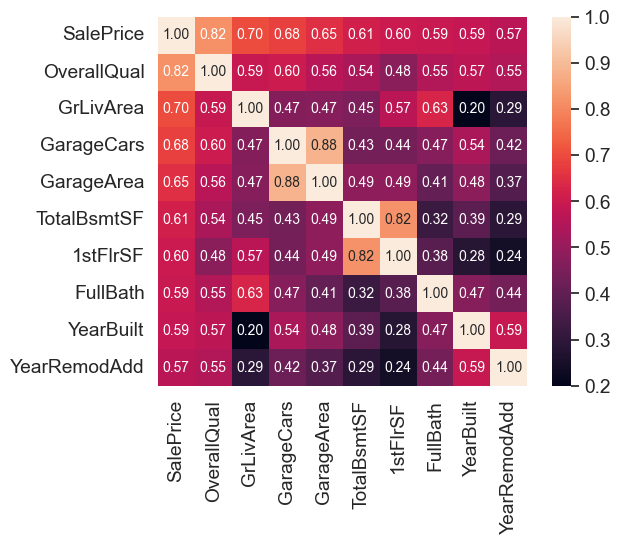

In [27]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = numpy.corrcoef(housing_raw_df[cols].values.T)
seaborn.set(font_scale=1.25)
hm = seaborn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Since there is high correlation between some of the variables.We will drop them

In [28]:
corr_columns=['GarageCars','1stFlrSF','TotRmsAbvGrd']
housing_raw_df.drop(columns=corr_columns,axis=1,inplace=True)

# Preparing Data for Model

In [29]:
housing_raw_df['Age'] = (housing_raw_df['YrSold'] - housing_raw_df['YearBuilt'])


In [30]:
housing_raw_df.drop(['MoSold'], axis = 1,inplace=True)
housing_raw_df.drop(['YrSold'], axis = 1,inplace=True)
housing_raw_df.drop(['YearBuilt'], axis = 1,inplace=True)
housing_raw_df.drop(['YearRemodAdd'], axis = 1,inplace=True)

In [31]:
housing_raw_df.dtypes.value_counts()

object     34
int64      27
float64     2
dtype: int64

In [32]:
num_col=housing_raw_df.select_dtypes(exclude='object')
cat_col=housing_raw_df.select_dtypes(include='object')

In [33]:
num_col_list = list(num_col.columns)
print("Numerical Columns")
print(num_col_list)
cat_col_list = list(cat_col.columns)
print("Categorical Columns")
print(cat_col_list)

Numerical Columns
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age']
Categorical Columns
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


## Creating Dummy Variables

In [34]:
housing_raw_df = pandas.get_dummies(housing_raw_df, drop_first=True )
housing_raw_df.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0          60     8450            7            5       196.0         706   
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  ...  SaleType_ConLI  \
0           0        150          856       854  ...               0   
1           0        284         1262         0  ...               0   
2           0        434          920       866  ...               0   
3           0        540          756       756  ...               0   
4           0        490         1145      1053  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 216 columns]

## Getting the Target Variables

In [35]:
X = housing_raw_df.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0          60     8450            7            5       196.0         706   
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  2ndFlrSF  ...  SaleType_ConLI  \
0           0        150          856       854  ...               0   
1           0        284         1262         0  ...               0   
2           0        434          920       866  ...               0   
3           0        540          756       756  ...               0   
4           0        490         1145      1053  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 215 columns]

In [36]:
y = housing_raw_df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## Splitting the Test and Train Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

## Scaling the Data

In [38]:
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_test[X_train.columns] = scaler.fit_transform(X_test[X_train.columns])


In [39]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1168, 215)
y_train (1168,)


# Model Creation

# Linear Regression

In [40]:
LR=LinearRegression()
LR.fit(X_train,y_train)
LR.coef_

array([-3.00243285e-02,  2.45858441e-02,  5.82777074e-02,  4.64712478e-02,
        3.40386087e-03, -2.56198804e+10, -8.82981849e+09, -2.49107588e+10,
        2.45933100e+10, -1.24733188e-02,  3.90529235e-03,  1.29668229e-01,
        1.43016092e-02,  7.36551587e-04,  1.13625998e-02,  1.53643634e-02,
        1.17387914e-02, -8.97683749e-03,  1.75000281e-02,  4.14383147e-02,
        1.07305057e-02,  2.27059559e-03,  5.07733199e-03,  6.69974776e-03,
        1.12849467e-02,  1.34457380e-03,  2.13114600e-03, -6.25117974e-02,
        7.47177855e-02,  3.85394208e-02,  1.30775566e-01,  1.03982414e-01,
        2.94880594e-03,  7.51632452e-03,  2.56752968e-03,  1.86991692e-03,
        8.43858719e-03, -2.47597694e-04,  1.02753639e-02, -6.53791428e-03,
        7.70521164e-03, -7.39812851e-03, -7.35092163e-03, -5.40447235e-03,
       -6.43253326e-04, -1.34761035e-02, -3.52644920e-03, -1.18728876e-02,
       -4.33516502e-03,  1.03831291e-03, -1.35858059e-02,  1.46534443e-02,
       -2.62804031e-02, -

In [41]:
rfe = RFE(LR,n_features_to_select=100)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 37),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 49),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 106),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 79),
 ('EnclosedPorch', False, 29),
 ('3SsnPorch', False, 17),
 ('ScreenPorch', True, 1),
 ('PoolArea', False, 98),
 ('MiscVal', False, 81),
 ('Age', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 53),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', False, 72),
 ('LotShape_Reg', False, 91),
 ('LandContour_HLS', True, 1),
 ('La

In [42]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe=X_test[col]
X_train_rfe.head()

MSSubClass   LotArea  OverallQual  OverallCond  BsmtFinSF1  BsmtFinSF2  \
254    -0.866764 -0.212896    -0.820445     0.372217    1.037269   -0.285504   
1066    0.074110 -0.265245    -0.088934     1.268609   -0.971996   -0.285504   
638    -0.631546 -0.177841    -0.820445     1.268609   -0.971996   -0.285504   
799    -0.161109 -0.324474    -0.820445     1.268609    0.267995   -0.285504   
380    -0.161109 -0.529035    -0.820445     0.372217   -0.496920   -0.285504   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  ...  KitchenQual_TA  \
254   -0.400282     0.572612 -0.801923  -0.407093  ...        0.991475   
1066   0.511920    -0.596547  0.955088   0.083170  ...        0.991475   
638    0.505196    -0.603357 -0.801923  -1.395250  ...        0.991475   
799   -0.915776    -0.750921  0.989227   0.458975  ...       -1.008599   
380    0.532091    -0.081209  0.711564   0.312087  ...       -1.008599   

      Functional_Maj2  Functional_Mod  Functional_Sev  Functional_Typ  \
254         -0.058621       -0.106092       -0.029273        0.278372   
1066        -0.058621       -0.106092       -0.029273        0.278372   
638         -0.058621       -0.106092       -0.029273        0.278372   
799         -0.058621       -0.106092       -0.029273        0.278372   
380         -0.058621       -0.106092       -0.029273        0.278372   

      SaleType_ConLD  SaleType_New  SaleType_Oth  SaleCondition_Alloca  \
254        -0.077648     -0.300948     -0.041416             -0.077648   
1066       -0.077648     -0.300948     -0.041416             -0.077648   
638        -0.077648     -0.300948     -0.041416             -0.077648   
799        -0.077648     -0.300948     -0.041416             -0.077648   
380        -0.077648     -0.300948     -0.041416             -0.077648   

      SaleCondition_Normal  
254                0.46002  
1066               0.46002  
638                0.46002  
799                0.46002  
380                0.46002  

[5 rows x 100 columns]

In [43]:
X_train_rfe.shape

(1168, 100)

### Retraining the model on the RFE Train Dataset

In [44]:
LR.fit(X_train_rfe,y_train)

LinearRegression()

### Performing Prediction on the Test Dataset with the columns supporting RFE

In [45]:
y_pred=LR.predict(X_test_rfe)
print("R2 Score for the LR {}".format(r2_score(y_test,y_pred)))
print("MSE for the LR {}".format(mean_squared_error(y_test,y_pred)))
print("RMSE Score for the LR {}".format(numpy.sqrt(mean_squared_error(y_test,y_pred))))
df_lr=pandas.DataFrame(data=[[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),numpy.sqrt(mean_squared_error(y_test,y_pred))]],columns=['R2 Score','MSE','RMSE'])


R2 Score for the LR -2.4078182176572294e+21
MSE for the LR 4.4932533793969465e+20
RMSE Score for the LR 21197295533.62161


## Lasso Regression

### We have made use of HyperParameter tuning to get the best result for alpha based on which we will create the model.For Hyperparameter tuning we have made use GridSearchCV

In [46]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

list_var=['OverallQual','GrLivArea','GarageArea','OverallCond','BsmtFullBath']
X_test.drop(columns=list_var,inplace=True)
X_train.drop(columns=list_var,inplace=True)
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True)            

model_cv.fit(X_train, y_train) 


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2')

### Getting the results for different values for alpha

In [47]:
cv_results = pandas.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.176825      0.038668         0.007344        0.002424      0.0001   
1       0.072115      0.058419         0.006807        0.001135       0.001   
2       0.014078      0.001535         0.005929        0.000957        0.01   
3       0.011271      0.000576         0.005822        0.000631        0.05   
4       0.009864      0.001271         0.006560        0.000377         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.851855           0.526374           0.719935   
1   {'alpha': 0.001}           0.860481           0.641182           0.710464   
2    {'alpha': 0.01}           0.843988           0.797180           0.677407   
3    {'alpha': 0.05}           0.730511           0.680624           0.587868   
4     {'alpha': 0.1}           0.562056           0.522426           0.468361   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.791018  ...         0.695519        0.121851                3   
1           0.811794  ...         0.747784        0.078268                2   
2           0.805564  ...         0.786296        0.056776                1   
3           0.699720  ...         0.680473        0.048963                4   
4           0.544145  ...         0.528495        0.032598                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.916513            0.929269            0.916301   
1            0.908179            0.922112            0.911343   
2            0.841530            0.852204            0.867934   
3            0.686821            0.696387            0.724751   
4            0.525644            0.540692            0.544076   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.924406            0.920903          0.921479         0.004920  
1            0.916755            0.913919          0.914462         0.004760  
2            0.846608            0.850300          0.851715         0.008890  
3            0.692524            0.699312          0.699959         0.013082  
4            0.536713            0.546090          0.538643         0.007237  

[5 rows x 21 columns]

In [48]:
estimator=model_cv.best_estimator_
print("The best value for alpha for Lasso Regression is {}".format(estimator))

The best value for alpha for Lasso Regression is Lasso(alpha=0.01)


### As it can be seen that we are getting better results with alpha .01 

In [49]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00457713,  0.01340231,  0.00628023,  0.00181155,  0.        ,
       -0.        ,  0.09876522,  0.06695656,  0.        , -0.        ,
        0.04826563,  0.02337321,  0.00769097, -0.00931789,  0.04631898,
        0.01659052,  0.        ,  0.        ,  0.00131629,  0.008856  ,
       -0.        , -0.        , -0.03188293,  0.        , -0.        ,
        0.        , -0.00910799,  0.        ,  0.00206902, -0.00818136,
       -0.        ,  0.0060383 , -0.        ,  0.        , -0.        ,
        0.01150222, -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.00265056, -0.        ,  0.        ,
        0.        ,  0.0225657 , -0.02045853, -0.        , -0.00438856,
       -0.01215167, -0.        , -0.        , -0.        ,  0.        ,
        0.0092138 ,  0.03461057, -0.        , -0.        , -0.        ,
       -0.        ,  0.00977362,  0.0201722 ,  0.        ,  0.00386879,
       -0.0078088 ,  0.        ,  0.        ,  0.        , -0.  

### Printing the coffecient values for the Lasso Regression.As it can be seen some of the coffecients have been set to 0

In [50]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters)),key=(lambda x:-(x[1])))



[('constant', 12.031),
 ('BsmtFinSF2', 0.099),
 ('BsmtUnfSF', 0.067),
 ('LowQualFinSF', 0.048),
 ('FullBath', 0.046),
 ('Neighborhood_Mitchel', 0.035),
 ('Heating_Wall', 0.031),
 ('GrLivArea', 0.023),
 ('Neighborhood_Blueste', 0.023),
 ('BsmtExposure_Gd', 0.022),
 ('Neighborhood_OldTown', 0.02),
 ('HalfBath', 0.017),
 ('LotArea', 0.013),
 ('LotShape_Reg', 0.012),
 ('ExterCond_Fa', 0.012),
 ('Neighborhood_NridgHt', 0.01),
 ('RoofMatl_Tar&Grv', 0.01),
 ('BsmtQual_none', 0.01),
 ('GarageArea', 0.009),
 ('Neighborhood_MeadowV', 0.009),
 ('BsmtFullBath', 0.008),
 ('SaleType_WD', 0.008),
 ('OverallQual', 0.006),
 ('MSZoning_RM', 0.006),
 ('RoofMatl_Membran', 0.006),
 ('Functional_Maj2', 0.005),
 ('Neighborhood_Sawyer', 0.004),
 ('BldgType_Duplex', 0.004),
 ('HeatingQC_TA', 0.004),
 ('Functional_Min2', 0.004),
 ('Exterior2nd_VinylSd', 0.003),
 ('SaleType_ConLw', 0.003),
 ('OverallCond', 0.002),
 ('MSZoning_FV', 0.002),
 ('Condition1_RRAn', 0.002),
 ('Fireplaces', 0.001),
 ('HouseStyle_1Story'

### Getting the R2 score

In [51]:
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)
y_test_pred = lm.predict(X_test)
print("R2 SCore on Test data {}".format(r2_score(y_true=y_test, y_pred=y_test_pred)))
print('MSE :', (mean_squared_error(y_test, y_test_pred)))
print('RMSE :', numpy.sqrt(mean_squared_error(y_test, y_test_pred)))
df_lasso=pandas.DataFrame(data=[[r2_score(y_true=y_test, y_pred=y_test_pred),mean_squared_error(y_test, y_test_pred),numpy.sqrt(mean_squared_error(y_test, y_test_pred))]],columns=['R2 Score','MSE','RMSE'])


R2 SCore on Test data 0.8437857617091579
MSE : 0.02915129343913655
RMSE : 0.1707374986320713


In [52]:
mod = list(zip(cols, model_parameters))
para = pandas.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0               constant  12.031
7             BsmtFinSF2   0.099
8              BsmtUnfSF   0.067
11          LowQualFinSF   0.048
15              FullBath   0.046
..                   ...     ...
83       Condition2_RRAe  -0.019
48   Neighborhood_BrDale  -0.020
139      MasVnrType_None  -0.027
23         EnclosedPorch  -0.032
189     Electrical_FuseP  -0.034

[211 rows x 2 columns]

# Ridge Regression

### We have made use of HyperParameter tuning to get the best result for alpha based on which we will create the model.For Hyperparameter tuning we have made use GridSearchCV

In [53]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True)            
model_cv.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

### Printing out the results for different value of alpha

In [54]:
cv_results = pandas.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.014926      0.007467         0.006542        0.000938      0.0001   
1        0.012791      0.001400         0.008250        0.001646       0.001   
2        0.012710      0.000547         0.007322        0.000334        0.01   
3        0.012111      0.001058         0.005348        0.000680        0.05   
4        0.011773      0.000978         0.006303        0.000389         0.1   
5        0.011377      0.000903         0.005605        0.000420         0.2   
6        0.011395      0.000712         0.006209        0.000589         0.3   
7        0.013198      0.002162         0.006413        0.001164         0.4   
8        0.061505      0.075963         0.009092        0.003402         0.5   
9        0.011335      0.001177         0.006463        0.000253         0.6   
10       0.012188      0.001183         0.006032        0.000670         0.7   
11       0.011807      0.000563         0.006345        0.000397         0.8   
12       0.011253      0.000809         0.006324        0.000889         0.9   
13       0.011514      0.000802         0.006266        0.000537         1.0   
14       0.011282      0.000775         0.006029        0.000421         2.0   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.109754          -0.129125   
1    {'alpha': 0.001}          -0.109754          -0.129124   
2     {'alpha': 0.01}          -0.109753          -0.129112   
3     {'alpha': 0.05}          -0.109747          -0.129061   
4      {'alpha': 0.1}          -0.109741          -0.128996   
5      {'alpha': 0.2}          -0.109730          -0.128867   
6      {'alpha': 0.3}          -0.109720          -0.128738   
7      {'alpha': 0.4}          -0.109711          -0.128610   
8      {'alpha': 0.5}          -0.109704          -0.128482   
9      {'alpha': 0.6}          -0.109701          -0.128356   
10     {'alpha': 0.7}          -0.109699          -0.128230   
11     {'alpha': 0.8}          -0.109698          -0.128105   
12     {'alpha': 0.9}          -0.109699          -0.127982   
13     {'alpha': 1.0}          -0.109705          -0.127859   
14     {'alpha': 2.0}          -0.109778          -0.126916   

    split2_test_score  split3_test_score  ...  mean_test_score  \
0           -0.124308          -0.110567  ...        -0.118284   
1           -0.124303          -0.110565  ...        -0.118282   
2           -0.124251          -0.110550  ...        -0.118262   
3           -0.124030          -0.110484  ...        -0.118174   
4           -0.123772          -0.110405  ...        -0.118070   
5           -0.123311          -0.110258  ...        -0.117875   
6           -0.122912          -0.110125  ...        -0.117696   
7           -0.122562          -0.110002  ...        -0.117530   
8           -0.122251          -0.109889  ...        -0.117375   
9           -0.121972          -0.109783  ...        -0.117230   
10          -0.121720          -0.109686  ...        -0.117094   
11          -0.121491          -0.109601  ...        -0.116966   
12          -0.121289          -0.109525  ...        -0.116848   
13          -0.121125          -0.109453  ...        -0.116739   
14          -0.119959          -0.109569  ...        -0.116050   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.007570               15           -0.080628           -0.074704   
1         0.007569               14           -0.080628           -0.074704   
2         0.007561               13           -0.080631           -0.074704   
3         0.007528               12           -0.080645           -0.074706   
4         0.007489               11           -0.080662           -0.074709   
5         0.007419               10           -0.080697           -0.074717   
6         0.007356                9           -0.080731           -0.074729   
7         0.007300       

In [55]:
estimator=model_cv.best_estimator_
print("The best value for alpha for Ridge Regression is {}".format(estimator))

The best value for alpha for Ridge Regression is Ridge(alpha=2.0)


### We will take the value of alpha as 2

In [56]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.37181846e-02,  2.79788670e-02,  2.64541520e-03,  5.44984268e-02,
        1.10881148e-02,  2.68925154e-02,  8.79939373e-02,  9.58889147e-02,
        1.68822193e-02, -3.38994716e-03,  3.15178663e-02,  2.42207750e-02,
        1.75055314e-02, -1.17328710e-02,  2.77484320e-02,  1.62299493e-02,
        1.65679662e-03,  2.73639683e-03,  9.95108310e-03,  1.16367742e-02,
       -1.74059810e-03,  2.55804898e-03, -3.11594913e-02,  6.31785678e-02,
        3.94889004e-02,  1.25491042e-01,  1.09159079e-01,  3.93582992e-03,
        8.76159176e-03, -1.15111842e-03, -5.16614751e-06,  9.82140186e-03,
       -3.73041013e-03,  5.89293429e-03, -4.51233030e-03,  8.57155929e-03,
       -1.41199703e-02, -8.83114527e-03, -9.30862807e-03, -8.82567549e-04,
       -1.27364884e-02, -2.94492591e-03, -1.84831384e-02, -1.47446859e-02,
       -7.78951204e-03, -1.91485561e-02,  1.46544534e-02, -4.49585368e-02,
       -1.82136186e-02, -2.26360501e-02, -3.37104583e-02, -1.87964716e-02,
       -3.09860881e-02,  

### Printing the coffecients for the ridge regression

In [57]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters)),key=(lambda x:-(x[1])))


[('constant', 12.031),
 ('RoofStyle_Gable', 0.289),
 ('RoofStyle_Shed', 0.199),
 ('RoofMatl_Membran', 0.141),
 ('PoolArea', 0.125),
 ('RoofMatl_CompShg', 0.119),
 ('MiscVal', 0.109),
 ('BsmtUnfSF', 0.096),
 ('BsmtFinSF2', 0.088),
 ('RoofStyle_Hip', 0.069),
 ('RoofStyle_Mansard', 0.068),
 ('3SsnPorch', 0.063),
 ('OverallCond', 0.054),
 ('ScreenPorch', 0.039),
 ('BsmtFinType2_GLQ', 0.037),
 ('SaleType_WD', 0.035),
 ('BsmtFinType2_LwQ', 0.034),
 ('Heating_Wall', 0.033),
 ('LowQualFinSF', 0.032),
 ('SaleType_Oth', 0.031),
 ('RoofMatl_Tar&Grv', 0.03),
 ('LotArea', 0.028),
 ('FullBath', 0.028),
 ('BsmtFinSF1', 0.027),
 ('Exterior1st_BrkFace', 0.027),
 ('GrLivArea', 0.024),
 ('Condition1_PosN', 0.023),
 ('Exterior1st_WdShing', 0.023),
 ('Exterior2nd_MetalSd', 0.023),
 ('SaleType_ConLw', 0.023),
 ('BsmtFinType2_none', 0.021),
 ('Neighborhood_OldTown', 0.019),
 ('BsmtFullBath', 0.018),
 ('Condition1_RRAe', 0.018),
 ('BsmtQual_Gd', 0.018),
 ('TotalBsmtSF', 0.017),
 ('Condition2_PosA', 0.017),
 (

In [58]:
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

y_test_pred = lm.predict(X_test)
print("R2 Score {}".format(r2_score(y_true=y_test, y_pred=y_test_pred)))
print('MSE :{}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE :', numpy.sqrt(mean_squared_error(y_test, y_test_pred)))
df_ridge=pandas.DataFrame(data=[[r2_score(y_true=y_test, y_pred=y_test_pred),mean_squared_error(y_test, y_test_pred),numpy.sqrt(mean_squared_error(y_test, y_test_pred))]],columns=['R2 Score','MSE','RMSE'])


R2 Score 0.756894901165279
MSE :0.04536608282458142
RMSE : 0.21299315206029845


In [59]:
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pandas.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0               constant  12.031
97       RoofStyle_Gable   0.289
101       RoofStyle_Shed   0.199
103     RoofMatl_Membran   0.141
26              PoolArea   0.125
..                   ...     ...
188     Electrical_FuseF  -0.044
48   Neighborhood_BrDale  -0.045
151      Foundation_Slab  -0.046
92     HouseStyle_2.5Fin  -0.054
189     Electrical_FuseP  -0.072

[211 rows x 2 columns]

In [60]:
fin_df=pandas.concat([df_lr,df_lasso,df_ridge])
fin_df['R2 Score']=fin_df['R2 Score'].apply(lambda x:Decimal(x))
fin_df['MSE']=fin_df['MSE'].apply(lambda x:Decimal(x))
fin_df['RMSE']=fin_df['RMSE'].apply(lambda x:Decimal(x))
fin_df.insert(0,'Model',['Linear Regression','Lasso','Ridge'])
fin_df


Model                                           R2 Score  \
0  Linear Regression                            -2407818217657229377536   
0              Lasso  0.84378576170915786658355273175402544438838958...   
0              Ridge  0.75689490116527902152654405654175207018852233...   

                                                 MSE  \
0                              449325337939694649344   
0  0.02915129343913654830222625946589687373489141...   
0  0.04536608282458141905291171269709593616425991...   

                                                RMSE  
0                     21197295533.621608734130859375  
0  0.17073749863207129950914975324849365279078483...  
0  0.21299315206029845182200688213924877345561981...

# Conclusion
### It can be seen from the results above that Lasso Regression has the best Score among all the values for the different models that we have considered